In [2]:
import pandas
import numpy
import math
import warnings
import time
import matplotlib.pyplot as plt

from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import roc_curve, auc, accuracy_score,roc_auc_score,mean_absolute_error,r2_score

from scipy import stats
import pickle

warnings.filterwarnings('ignore')

In [3]:
df = pandas.read_csv("2017.csv")
print(df.shape)
df = df.dropna()
print(df.shape)
df.describe()

(1000000, 30)
(991346, 30)


,id,sex,age,sido,height,weight,waist,vision_left,vision_right,listen_left,...,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_RSPS_CD,DRINK_OR_NOT,MOUTH_CHECK,BMI,GFR,stage
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,500081.640008,1.468990,10.522898,33.690509,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,...,0.860467,25.989308,25.755051,37.136347,1.608122,0.499813,0.400911,23.917129,92.455385,1.565058
std,288665.798434,0.499038,2.836268,12.675030,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,...,0.480530,23.493386,26.308599,50.424153,0.818507,0.500000,0.490083,3.515028,31.371353,0.577385
min,1.000000,1.000000,5.000000,11.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,...,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.486993,0.317448,1.000000
25%,250132.250000,1.000000,8.000000,27.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,...,0.700000,19.000000,15.000000,16.000000,1.000000,0.000000,0.000000,21.484375,77.123612,1.000000
50%,500141.500000,1.000000,10.000000,41.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,...,0.800000,23.000000,20.000000,23.000000,1.000000,0.000000,0.000000,23.875115,89.324053,2.000000
75%,750072.750000,2.000000,13.000000,43.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,...,1.000000,28.000000,29.000000,39.000000,2.000000,1.000000,1.000000,25.951557,103.940178,2.000000
max,1000000.000000,2.000000,18.000000,50.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,...,98.000000,9999.000000,7210.000000,999.000000,3.000000,1.000000,1.000000,45.714286,1353.095368,5.000000


In [4]:
#One Hot Coding:
df = pandas.get_dummies(df, columns=['sex','SMK_STAT_TYPE_RSPS_CD'])

In [5]:
#查看原始数据分布
df_y = df["stage"].values
df_y = df_y.reshape(df_y.shape[0], 1)
print(list(df_y).count(1))
print(list(df_y).count(2))
print(list(df_y).count(3))
print(list(df_y).count(4))
print(list(df_y).count(5))
print(list(df_y).count(6))

print(df.shape)
df = df.loc[(df["CREATININE "]<=2.5)&(df["CREATININE "]>=0.0)]
print(df.shape)

c_data = df["CREATININE "]
c_data.hist(bins=25)
print(max(c_data))
print(min(c_data))

471316
482414
35858
994
764
0
(991346, 33)
(990112, 33)


ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

In [6]:
print(df.shape)

df_train   = df[0:900000] 
print(df_train.shape)
df_holdout = df[900000:990112] 
print(df_holdout.shape)

(990112, 33)
(900000, 33)
(90112, 33)


In [7]:
y_train = df_train["CREATININE "].values
y_train = y_train.reshape(y_train.shape[0], 1)

cols = df_train.columns.values.tolist()
cols.remove("id")
cols.remove("sido")
cols.remove("CREATININE ")
cols.remove("GFR")
cols.remove("stage")
cols.remove("height")
cols.remove("weight")

x_train = df_train[cols].values

print(x_train.shape)
print(y_train.shape)

(900000, 26)
(900000, 1)


In [48]:
y_holdout = df_holdout["CREATININE "].values
y_holdout_stage = df_holdout["stage"]
print("y_holdout_stage: ", y_holdout_stage.shape)
y_holdout = y_holdout.reshape(y_holdout.shape[0], 1)

cols = df_holdout.columns.values.tolist()
cols.remove("id")
cols.remove("sido")
cols.remove("CREATININE ")
cols.remove("GFR")
cols.remove("stage")
cols.remove("height")
cols.remove("weight")

x_holdout = df_holdout[cols].values

print(x_holdout.shape)
print(y_holdout.shape)

y_holdout_stage:  (90112,)
(90112, 26)
(90112, 1)


In [49]:
import xgboost

In [50]:
#各区间的权重
weight01 = 1
weight02 = 1
weight03 = 1
weight04 = 1
weight05 = 1
weight06 = 1
weight07 = 1
weight08 = 1
weight09 = 1
weight10 = 1

temp_T = df['CREATININE '].values
max_value = max(temp_T)
min_value = min(temp_T)
interval = max_value - min_value
print(interval)
mean_sales = df['CREATININE '].mean()
print(mean_sales)

2.4
0.8524442689311896


In [51]:
def changeError(err,tru):
    
    global weight01
    global weight02
    global weight03
    global weight04
    global weight05 
    global weight06 
    global weight07 
    global weight08 
    global weight09
    global weight10 
    
    a_weight = (weight01+weight02+weight03+weight04+weight05+weight06+weight07+weight08+weight09+weight10)/10
    
    print("weight10: ",weight10)
    print("weight_a: ",a_weight)
    
    for i in range(len(tru)):
        
        if tru[i] > interval * 0.9 + min_value:     
            
            err[i] = err[i]  * (weight10/a_weight)  
            
        elif tru[i] > interval * 0.8 + min_value:  
                 
            err[i] = err[i]  * (weight09/a_weight) 
            
        elif tru[i] > interval * 0.7 + min_value:
                
            err[i] = err[i]  * (weight08/a_weight) 
                
        elif tru[i] > interval * 0.6:   
            
            err[i] = err[i]  * (weight07/a_weight)
                
        elif tru[i] > interval * 0.5 + min_value:      
            
            err[i] = err[i]  * (weight06/a_weight) 
                
        elif tru[i] > interval * 0.4 + min_value: 
            
            err[i] = err[i]  * (weight05/a_weight) 
                
        elif tru[i] > interval * 0.3 + min_value:      
            
            err[i] = err[i]  * (weight04/a_weight) 
        
        elif tru[i] > interval * 0.2 + min_value:      
            
            err[i] = err[i]  * (weight03/a_weight) 

        elif tru[i] > interval * 0.1 + min_value:      
            
            err[i] = err[i]  * (weight02/a_weight) 
                
        else:   
            
            err[i] =  err[i]  * (weight01/a_weight)  
            
    return err    

In [52]:
def func(pre, tru):
    
    tru = tru.get_label()
    score = myloss(tru,pre)
    
    return 'myFeval',score

def myloss(A,B):
   
    temp01 = 0
    temp02 = 0
    temp03 = 0
    temp04 = 0
    temp05 = 0
    temp06 = 0
    temp07 = 0
    temp08 = 0
    temp09 = 0
    temp10 = 0
    temp = 0
    
    global weight01
    global weight02 
    global weight03 
    global weight04
    global weight05 
    global weight06
    global weight07
    global weight08 
    global weight09
    global weight10
    global run
    
    for i in range(len(A)):
        
        if A[i] > interval * 0.9 + min_value:     
            temp10 = temp10 + abs(A[i] - B[i]) 
        elif A[i] > interval * 0.8 + min_value:    
            temp09 = temp09 + abs(A[i] - B[i]) 
        elif A[i] > interval * 0.7 + min_value:      
            temp08 = temp08 + abs(A[i] - B[i]) 
        elif A[i] > interval * 0.6 + min_value:       
            temp07 = temp07 + abs(A[i] - B[i]) 
        elif A[i] > interval * 0.5 + min_value:      
            temp06 = temp06 + abs(A[i] - B[i]) 
        elif A[i] > interval * 0.4 + min_value:     
            temp05 = temp05 + abs(A[i] - B[i]) 
        elif A[i] > interval * 0.3 + min_value:      
            temp04 = temp04 + abs(A[i] - B[i]) 
        elif A[i] > interval * 0.2 + min_value:      
            temp03 = temp03 + abs(A[i] - B[i])   
        elif A[i] > interval * 0.1 + min_value:      
            temp02 = temp02 + abs(A[i] - B[i])      
        else: 
            temp01 = temp01 + abs(A[i] - B[i]) 
    
    c = [0,0,0,0,0,0,0,0,0,0]
    
    for i in range(len(A)):
        
        if A[i] > interval * 0.9 + min_value:   
            c[9]+=1
        elif A[i] > interval * 0.8 + min_value:
            c[8]+=1
        elif A[i] > interval * 0.7 + min_value:
            c[7]+=1
        elif A[i] > interval * 0.6 + min_value:
            c[6]+=1
        elif A[i] > interval * 0.5 + min_value:
            c[5]+=1
        elif A[i] > interval * 0.4 + min_value:
            c[4]+=1
        elif A[i] > interval * 0.3 + min_value:
            c[3]+=1
        elif A[i] > interval * 0.2 + min_value:
            c[2]+=1
        elif A[i] > interval * 0.1 + min_value:
            c[1]+=1
        else:
            c[0]+=1
            
    temp = temp10+temp09+temp08+temp07+temp06+temp05+temp04+temp03+temp02+temp01
    temp = temp/len(A)
    
    if c[0] == 0:
        temp01 = 0
    else:
        temp01 = temp01/c[0]
        
    if c[1] == 0:
        temp02 = 0
    else:
        temp02 = temp02/c[1]
        
    if c[2] == 0:
        temp03 = 0
    else:
        temp03 = temp03/c[2]
        
    if c[3] == 0:
        temp04 = 0
    else:
        temp04 = temp04/c[3]
        
    if c[4] == 0:
        temp05 = 0
    else:
        temp05 = temp05/c[4]
        
    if c[5] == 0:
        temp06 = 0
    else:
        temp06 = temp06/c[5]
    
    if c[6] == 0:
        temp07 = 0
    else:
        temp07 = temp07/c[6]
        
    if c[7] == 0:
        temp08 = 0
    else:
        temp08 = temp08/c[7]
        
    if c[8] == 0:
        temp09 = 0
    else:
        temp09 = temp09/c[8]
        
    if c[9] == 0:
        temp10 = 0
    else:
        temp10 = temp10/c[9]
 
    print("###########")
    print('%.4g - %.4g : %.4g (%.4g)' % (interval*0.0,interval*0.1 + min_value,temp01,c[0]))
    print('%.4g - %.4g : %.4g (%.4g)' % (interval*0.1 + min_value,interval*0.2 + min_value,temp02,c[1]))
    print('%.4g - %.4g : %.4g (%.4g)' % (interval*0.2 + min_value,interval*0.3 + min_value,temp03,c[2]))
    print('%.4g - %.4g : %.4g (%.4g)' % (interval*0.3 + min_value,interval*0.4 + min_value,temp04,c[3]))
    print('%.4g - %.4g : %.4g (%.4g)' % (interval*0.4 + min_value,interval*0.5 + min_value,temp05,c[4]))
    print('%.4g - %.4g : %.4g (%.4g)' % (interval*0.5 + min_value,interval*0.6 + min_value,temp06,c[5]))
    print('%.4g - %.4g : %.4g (%.4g)' % (interval*0.6 + min_value,interval*0.7 + min_value,temp07,c[6]))
    print('%.4g - %.4g : %.4g (%.4g)' % (interval*0.7 + min_value,interval*0.8 + min_value,temp08,c[7]))
    print('%.4g - %.4g : %.4g (%.4g)' % (interval*0.8 + min_value,interval*0.9 + min_value,temp09,c[8]))
    print('%.4g - %.4g : %.4g (%.4g)' % (interval*0.9 + min_value,interval*1.0 + min_value,temp10,c[9]))
    print("###########")
    
    if len(A)>18000:
        
        weight01 = temp01
        weight02 = temp02
        weight03 = temp03
        weight04 = temp04
        weight05 = temp05
        weight06 = temp06
        weight07 = temp07
        weight08 = temp08    
        weight09 = temp09   
        weight10 = temp10 
        
    return temp

In [53]:
def hessian_se(y_pred, y_true):
    
        return 0*y_true + 1
    
def mse(tru,pre):
    
    error = pre - tru
    error = changeError(error,tru)
    grad = error
    hess = hessian_se(pre, tru)
    
    return grad, hess

# 实验1

In [ ]:
model = xgboost.XGBRegressor(max_depth=10,
                           n_estimators=500, #55
                           learning_rate=0.05,
                           min_child_weight=100,
                           nthread=4,
                           subsample=1, #95
                           colsample_bytree=1, # 95
                           reg_alpha=0,
                           reg_lambda=0,
                           gamma=0,
                           objective=mse,  
                           base_score = mean_sales,
                           seed=10)

#开始训练 x_holdout,y_holdout
model.fit(x_train, y_train, verbose=1, eval_set=[(x_train, y_train),(x_holdout_sum, y_holdout_sum)],  eval_metric=func, early_stopping_rounds=10, )

In [58]:
pickle.dump(model, open("models\model_original.pickle.dat", "wb"))

In [35]:
model = pickle.load(open("models\model_original.pickle.dat", "rb"))

In [36]:
print("R2指数：",model.score(x_holdout_1, y_holdout_1))
print("R2指数：",model.score(x_holdout_2, y_holdout_2))
print("R2指数：",model.score(x_holdout_3, y_holdout_3))
print("R2指数：",model.score(x_holdout_4, y_holdout_4))
print("R2指数：",model.score(x_holdout_5, y_holdout_5))
print("R2指数：",model.score(x_holdout_6, y_holdout_6))
print("R2指数：",model.score(x_holdout_7, y_holdout_7))
print("R2指数：",model.score(x_holdout_8, y_holdout_8))
print("R2指数：",model.score(x_holdout_9, y_holdout_9))
print("R2指数：",model.score(x_holdout_10, y_holdout_10))

R2指数： 0.24775500214156387
R2指数： 0.24963521452179405
R2指数： 0.24825777955851158
R2指数： 0.23596980512918664
R2指数： 0.24843884473020206
R2指数： 0.2441053666319336
R2指数： 0.24270663096218026
R2指数： 0.24646562022173546
R2指数： 0.2439860731247474
R2指数： 0.241326847640858


R2指数： 0.24486471846627134
'age'  with:   0.004261794
'waist'  with:   0.0008808651
'vision_left'  with:   0.0006509728
'vision_right'  with:   0.0007192294
'listen_left'  with:   0.00072153256
'listen_right'  with:   0.000781417
'BP_HIGH '  with:   0.00081837
'BP_LWST '  with:   0.0006324579
'BLDS'  with:   0.00094732165
'TOT_CHOLE '  with:   0.0007429124
'TRIGLYCERIDE'  with:   0.0009779267
'HDL_CHOLE '  with:   0.00091761444
'LDL_CHOLE '  with:   0.0009471917
'HMG '  with:   0.0023573504
'OLIG_PROTE_CD'  with:   0.0052578505
'SGOT_AST '  with:   0.00097504875
'SGPT_ALT '  with:   0.00087856245
'GAMMA_GTP '  with:   0.001134989
'DRINK_OR_NOT'  with:   0.0022195273
'MOUTH_CHECK'  with:   0.0016121904
'BMI'  with:   0.0014911022
'sex_1'  with:   0.9645987
'sex_2'  with:   0.0
'SMK_STAT_TYPE_RSPS_CD_1.0'  with:   0.00067801727
'SMK_STAT_TYPE_RSPS_CD_2.0'  with:   0.0007001048
'SMK_STAT_TYPE_RSPS_CD_3.0'  with:   0.004096913


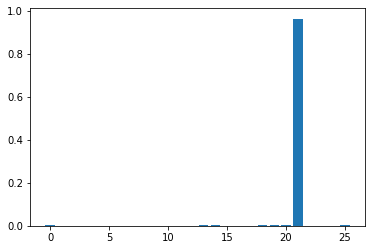

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CB1F6AC4E0>]],
      dtype=object)

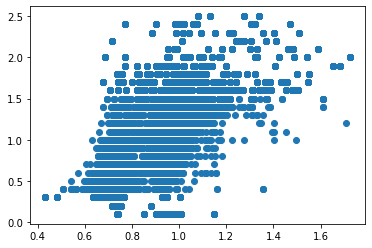

<Figure size 432x288 with 0 Axes>

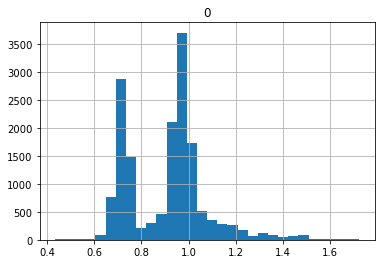

In [37]:
print("R2指数：",model.score(x_holdout_sum, y_holdout_sum))

importances = model.feature_importances_
for col,imp in zip(cols,importances):
    print("%r  with:   %r" % (col,imp))
plt.bar(range(len(cols)), importances)
plt.show()

plt.figure()
holdout_preds = model.predict(x_holdout_sum)
plt.scatter(holdout_preds,y_holdout_sum)

plt.figure()
holdout_preds = model.predict(x_holdout_sum)
temp = pandas.DataFrame(holdout_preds)
temp.hist(bins=30)

R2指数： 0.3839997581461896


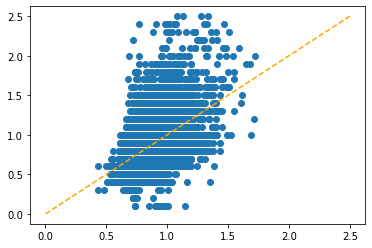

In [38]:
print("R2指数：",model.score(x_holdout, y_holdout))

plt.figure()
holdout_preds = model.predict(x_holdout)
plt.scatter(holdout_preds,y_holdout)
plt.plot(numpy.linspace(0,2.5,26), numpy.linspace(0,2.5,26), c = 'orange', linestyle='--')

# 实验二

In [30]:
def m4e(real, predict):
    grad = 4.0 * predict * predict * predict - 12.0 * predict * predict * real + 12.0 * predict * real * real - 4.0 * real * real
    hess = 12.0 * predict * predict - 24.0 * predict * real + 12.0 * real * real
    return grad, hess

In [31]:
# 原始m4e

model = xgboost.XGBRegressor(max_depth=10,
                           n_estimators=500, #55
                           learning_rate=0.05,
                           min_child_weight=100,
                           nthread=8,
                           subsample=1, #95
                           colsample_bytree=1, # 95
                           reg_alpha=0,
                           reg_lambda=0,
                           gamma=0,
                           objective=m4e,  
                           base_score = mean_sales,
                           seed=10)

#开始训练 x_holdout,y_holdout
model.fit(x_train, y_train, verbose=1, eval_set=[(x_train, y_train),(x_holdout, y_holdout)],  eval_metric=func, early_stopping_rounds=10, )

###########
0 - 0.24 : 0.7443 (476)
0.24 - 0.48 : 0.5055 (6055)
0.48 - 0.72 : 0.2547 (2.839e+05)
0.72 - 0.96 : 0.05879 (3.413e+05)
0.96 - 1.2 : 0.1811 (2.065e+05)
1.2 - 1.44 : 0.3928 (5.608e+04)
1.44 - 1.68 : 0.6915 (3392)
1.68 - 1.92 : 0.9379 (1495)
1.92 - 2.16 : 1.204 (367)
2.16 - 2.4 : 1.498 (399)
###########
###########
0 - 0.24 : 0.7335 (48)
0.24 - 0.48 : 0.5054 (592)
0.48 - 0.72 : 0.2548 (2.854e+04)
0.72 - 0.96 : 0.05886 (3.418e+04)
0.96 - 1.2 : 0.1813 (2.063e+04)
1.2 - 1.44 : 0.3918 (5524)
1.44 - 1.68 : 0.6945 (348)
1.68 - 1.92 : 0.9324 (161)
1.92 - 2.16 : 1.205 (46)
2.16 - 2.4 : 1.487 (39)
###########
[0]	validation_0-rmse:0.22132	validation_1-rmse:0.22159	validation_0-myFeval:0.17778	validation_1-myFeval:0.17788
Multiple eval metrics have been passed: 'validation_1-myFeval' will be used for early stopping.

Will train until validation_1-myFeval hasn't improved in 10 rounds.
###########
0 - 0.24 : 0.751 (476)
0.24 - 0.48 : 0.535 (6055)
0.48 - 0.72 : 0.2827 (2.839e+05)
0.72 - 0.

XGBRegressor(base_score=0.8524442689311914, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=10, min_child_weight=100, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8, nthread=8,
             num_parallel_tree=1,
             objective=<function m4e at 0x000002818DC77158>, random_state=10,
             reg_alpha=0, reg_lambda=0, scale_pos_weight=1, seed=10,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

R2指数： -0.1820663730308616
'age'  with:   0.0046466603
'waist'  with:   0.00037780125
'vision_left'  with:   0.00019348225
'vision_right'  with:   0.00019806261
'BP_HIGH '  with:   0.00026551084
'BP_LWST '  with:   0.00016542299
'BLDS'  with:   0.00033030726
'TOT_CHOLE '  with:   0.00030143122
'TRIGLYCERIDE'  with:   0.00037678427
'HDL_CHOLE '  with:   0.00037320037
'LDL_CHOLE '  with:   0.00072699797
'HMG '  with:   0.0017625297
'OLIG_PROTE_CD'  with:   0.0027051077
'SGOT_AST '  with:   0.00036061587
'SGPT_ALT '  with:   0.0002040905
'GAMMA_GTP '  with:   0.00032198074
'BMI'  with:   0.0016760309
'sex_1'  with:   0.9785015
'sex_2'  with:   0.0
'listen_left_1.0'  with:   8.273161e-05
'listen_left_2.0'  with:   0.0
'listen_right_1.0'  with:   0.00017209654
'listen_right_2.0'  with:   0.0
'DRINK_OR_NOT_0.0'  with:   0.00086923316
'DRINK_OR_NOT_1.0'  with:   0.0
'SMK_STAT_TYPE_RSPS_CD_1.0'  with:   8.1302875e-05
'SMK_STAT_TYPE_RSPS_CD_2.0'  with:   0.00013682058
'SMK_STAT_TYPE_RSPS_CD_3.0'

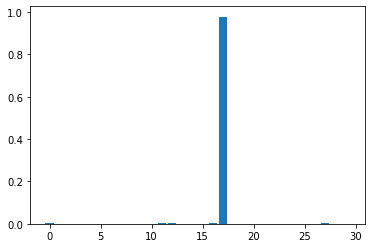

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002818B35FD30>]],
      dtype=object)

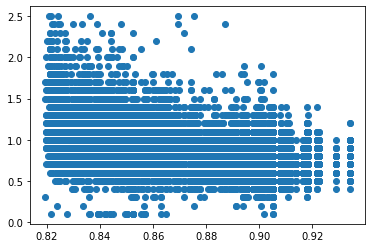

<Figure size 432x288 with 0 Axes>

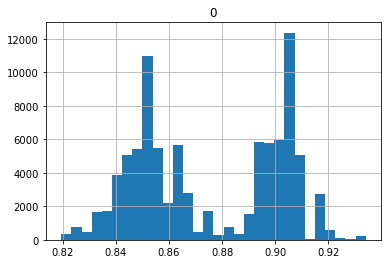

In [32]:
print("R2指数：",model.score(x_holdout, y_holdout))

importances = model.feature_importances_
for col,imp in zip(cols,importances):
    print("%r  with:   %r" % (col,imp))
plt.bar(range(len(cols)), importances)
plt.show()

plt.figure()
holdout_preds = model.predict(x_holdout)
plt.scatter(holdout_preds,y_holdout)

plt.figure()
holdout_preds = model.predict(x_holdout)
temp = pandas.DataFrame(holdout_preds)
temp.hist(bins=30)

# 实验三

In [36]:
# mse - cost_sensitive

model = xgboost.XGBRegressor(max_depth=10,
                           n_estimators=500, #55
                           learning_rate=0.05,
                           min_child_weight=100,
                           nthread=8,
                           subsample=1, #95
                           colsample_bytree=1, # 95
                           reg_alpha=0,
                           reg_lambda=0,
                           gamma=0,
                           objective=mse,  
                           base_score = mean_sales,
                           seed=10)

#开始训练 x_holdout,y_holdout
model.fit(x_train, y_train, verbose=1, eval_set=[(x_train, y_train),(x_holdout, y_holdout)],  eval_metric=func, early_stopping_rounds=10, )

weight10:  1
weight_a:  1.0
###########
0 - 0.24 : 0.7367 (476)
0.24 - 0.48 : 0.4553 (6055)
0.48 - 0.72 : 0.2075 (2.839e+05)
0.72 - 0.96 : 0.0486 (3.413e+05)
0.96 - 1.2 : 0.1812 (2.065e+05)
1.2 - 1.44 : 0.3851 (5.608e+04)
1.44 - 1.68 : 0.6736 (3392)
1.68 - 1.92 : 0.9126 (1495)
1.92 - 2.16 : 1.174 (367)
2.16 - 2.4 : 1.462 (399)
###########
###########
0 - 0.24 : 0.7307 (48)
0.24 - 0.48 : 0.4551 (592)
0.48 - 0.72 : 0.2078 (2.854e+04)
0.72 - 0.96 : 0.04866 (3.418e+04)
0.96 - 1.2 : 0.1815 (2.063e+04)
1.2 - 1.44 : 0.3844 (5524)
1.44 - 1.68 : 0.6782 (348)
1.68 - 1.92 : 0.909 (161)
1.92 - 2.16 : 1.175 (46)
2.16 - 2.4 : 1.458 (39)
###########
[0]	validation_0-rmse:0.19974	validation_1-rmse:0.20016	validation_0-myFeval:0.15809	validation_1-myFeval:0.15826
Multiple eval metrics have been passed: 'validation_1-myFeval' will be used for early stopping.

Will train until validation_1-myFeval hasn't improved in 10 rounds.
weight10:  1.462219740812641
weight_a:  0.6236548973548321
###########
0 - 0.2

###########
0 - 0.24 : 0.7524 (48)
0.24 - 0.48 : 0.4377 (592)
0.48 - 0.72 : 0.1947 (2.854e+04)
0.72 - 0.96 : 0.04466 (3.418e+04)
0.96 - 1.2 : 0.1623 (2.063e+04)
1.2 - 1.44 : 0.3571 (5524)
1.44 - 1.68 : 0.6215 (348)
1.68 - 1.92 : 0.8162 (161)
1.92 - 2.16 : 1.06 (46)
2.16 - 2.4 : 1.336 (39)
###########
[10]	validation_0-rmse:0.18635	validation_1-rmse:0.18709	validation_0-myFeval:0.14561	validation_1-myFeval:0.14592
weight10:  1.2925031457030982
weight_a:  0.5722183654920454
###########
0 - 0.24 : 0.7521 (476)
0.24 - 0.48 : 0.4352 (6055)
0.48 - 0.72 : 0.193 (2.839e+05)
0.72 - 0.96 : 0.04415 (3.413e+05)
0.96 - 1.2 : 0.1604 (2.065e+05)
1.2 - 1.44 : 0.355 (5.608e+04)
1.44 - 1.68 : 0.6113 (3392)
1.68 - 1.92 : 0.8111 (1495)
1.92 - 2.16 : 1.038 (367)
2.16 - 2.4 : 1.279 (399)
###########
###########
0 - 0.24 : 0.7542 (48)
0.24 - 0.48 : 0.436 (592)
0.48 - 0.72 : 0.1935 (2.854e+04)
0.72 - 0.96 : 0.04439 (3.418e+04)
0.96 - 1.2 : 0.1606 (2.063e+04)
1.2 - 1.44 : 0.3547 (5524)
1.44 - 1.68 : 0.6167 (34

weight10:  1.170945183675092
weight_a:  0.5337910734422654
###########
0 - 0.24 : 0.7627 (476)
0.24 - 0.48 : 0.4185 (6055)
0.48 - 0.72 : 0.181 (2.839e+05)
0.72 - 0.96 : 0.04357 (3.413e+05)
0.96 - 1.2 : 0.1452 (2.065e+05)
1.2 - 1.44 : 0.3329 (5.608e+04)
1.44 - 1.68 : 0.5675 (3392)
1.68 - 1.92 : 0.7432 (1495)
1.92 - 2.16 : 0.9496 (367)
2.16 - 2.4 : 1.16 (399)
###########
###########
0 - 0.24 : 0.7706 (48)
0.24 - 0.48 : 0.4205 (592)
0.48 - 0.72 : 0.1816 (2.854e+04)
0.72 - 0.96 : 0.04404 (3.418e+04)
0.96 - 1.2 : 0.1455 (2.063e+04)
1.2 - 1.44 : 0.3327 (5524)
1.44 - 1.68 : 0.5745 (348)
1.68 - 1.92 : 0.7448 (161)
1.92 - 2.16 : 0.9685 (46)
2.16 - 2.4 : 1.243 (39)
###########
[21]	validation_0-rmse:0.17630	validation_1-rmse:0.17745	validation_0-myFeval:0.13516	validation_1-myFeval:0.13568
weight10:  1.16031791602161
weight_a:  0.5304500281832517
###########
0 - 0.24 : 0.7636 (476)
0.24 - 0.48 : 0.417 (6055)
0.48 - 0.72 : 0.1798 (2.839e+05)
0.72 - 0.96 : 0.044 (3.413e+05)
0.96 - 1.2 : 0.1438 (2.

###########
0 - 0.24 : 0.7838 (48)
0.24 - 0.48 : 0.4068 (592)
0.48 - 0.72 : 0.171 (2.854e+04)
0.72 - 0.96 : 0.05336 (3.418e+04)
0.96 - 1.2 : 0.1333 (2.063e+04)
1.2 - 1.44 : 0.315 (5524)
1.44 - 1.68 : 0.5441 (348)
1.68 - 1.92 : 0.6983 (161)
1.92 - 2.16 : 0.9133 (46)
2.16 - 2.4 : 1.182 (39)
###########
[31]	validation_0-rmse:0.17027	validation_1-rmse:0.17180	validation_0-myFeval:0.13095	validation_1-myFeval:0.13165
weight10:  1.0730054614537938
weight_a:  0.5027273470832446
###########
0 - 0.24 : 0.7711 (476)
0.24 - 0.48 : 0.4023 (6055)
0.48 - 0.72 : 0.1693 (2.839e+05)
0.72 - 0.96 : 0.05403 (3.413e+05)
0.96 - 1.2 : 0.1317 (2.065e+05)
1.2 - 1.44 : 0.3134 (5.608e+04)
1.44 - 1.68 : 0.5314 (3392)
1.68 - 1.92 : 0.6872 (1495)
1.92 - 2.16 : 0.8778 (367)
2.16 - 2.4 : 1.065 (399)
###########
###########
0 - 0.24 : 0.7852 (48)
0.24 - 0.48 : 0.4055 (592)
0.48 - 0.72 : 0.17 (2.854e+04)
0.72 - 0.96 : 0.05461 (3.418e+04)
0.96 - 1.2 : 0.1322 (2.063e+04)
1.2 - 1.44 : 0.3135 (5524)
1.44 - 1.68 : 0.5415 (

weight10:  1.0073958450092708
weight_a:  0.48196523408969905
###########
0 - 0.24 : 0.7766 (476)
0.24 - 0.48 : 0.3896 (6055)
0.48 - 0.72 : 0.1601 (2.839e+05)
0.72 - 0.96 : 0.0661 (3.413e+05)
0.96 - 1.2 : 0.1221 (2.065e+05)
1.2 - 1.44 : 0.2992 (5.608e+04)
1.44 - 1.68 : 0.5067 (3392)
1.68 - 1.92 : 0.6498 (1495)
1.92 - 2.16 : 0.8299 (367)
2.16 - 2.4 : 1.002 (399)
###########
###########
0 - 0.24 : 0.7958 (48)
0.24 - 0.48 : 0.3937 (592)
0.48 - 0.72 : 0.161 (2.854e+04)
0.72 - 0.96 : 0.06673 (3.418e+04)
0.96 - 1.2 : 0.1227 (2.063e+04)
1.2 - 1.44 : 0.2993 (5524)
1.44 - 1.68 : 0.5199 (348)
1.68 - 1.92 : 0.663 (161)
1.92 - 2.16 : 0.8666 (46)
2.16 - 2.4 : 1.137 (39)
###########
[42]	validation_0-rmse:0.16608	validation_1-rmse:0.16797	validation_0-myFeval:0.12903	validation_1-myFeval:0.12988
weight10:  1.0015039790543099
weight_a:  0.48015284178029416
###########
0 - 0.24 : 0.7771 (476)
0.24 - 0.48 : 0.3884 (6055)
0.48 - 0.72 : 0.1592 (2.839e+05)
0.72 - 0.96 : 0.06723 (3.413e+05)
0.96 - 1.2 : 0.1

###########
0 - 0.24 : 0.8042 (48)
0.24 - 0.48 : 0.3837 (592)
0.48 - 0.72 : 0.1533 (2.854e+04)
0.72 - 0.96 : 0.07724 (3.418e+04)
0.96 - 1.2 : 0.1153 (2.063e+04)
1.2 - 1.44 : 0.288 (5524)
1.44 - 1.68 : 0.5038 (348)
1.68 - 1.92 : 0.6397 (161)
1.92 - 2.16 : 0.8366 (46)
2.16 - 2.4 : 1.109 (39)
###########
[52]	validation_0-rmse:0.16378	validation_1-rmse:0.16598	validation_0-myFeval:0.12785	validation_1-myFeval:0.12883
weight10:  0.952564531400389
weight_a:  0.4645394468212741
###########
0 - 0.24 : 0.781 (476)
0.24 - 0.48 : 0.3778 (6055)
0.48 - 0.72 : 0.1516 (2.839e+05)
0.72 - 0.96 : 0.07752 (3.413e+05)
0.96 - 1.2 : 0.1138 (2.065e+05)
1.2 - 1.44 : 0.2868 (5.608e+04)
1.44 - 1.68 : 0.486 (3392)
1.68 - 1.92 : 0.6195 (1495)
1.92 - 2.16 : 0.7893 (367)
2.16 - 2.4 : 0.9481 (399)
###########
###########
0 - 0.24 : 0.8049 (48)
0.24 - 0.48 : 0.3828 (592)
0.48 - 0.72 : 0.1526 (2.854e+04)
0.72 - 0.96 : 0.0782 (3.418e+04)
0.96 - 1.2 : 0.1146 (2.063e+04)
1.2 - 1.44 : 0.287 (5524)
1.44 - 1.68 : 0.5025 (3

weight10:  0.9136390330498678
weight_a:  0.45203088884185527
###########
0 - 0.24 : 0.7832 (476)
0.24 - 0.48 : 0.3687 (6055)
0.48 - 0.72 : 0.1451 (2.839e+05)
0.72 - 0.96 : 0.08602 (3.413e+05)
0.96 - 1.2 : 0.1079 (2.065e+05)
1.2 - 1.44 : 0.2777 (5.608e+04)
1.44 - 1.68 : 0.4715 (3392)
1.68 - 1.92 : 0.5982 (1495)
1.92 - 2.16 : 0.7607 (367)
2.16 - 2.4 : 0.9102 (399)
###########
###########
0 - 0.24 : 0.8111 (48)
0.24 - 0.48 : 0.3745 (592)
0.48 - 0.72 : 0.1462 (2.854e+04)
0.72 - 0.96 : 0.08672 (3.418e+04)
0.96 - 1.2 : 0.1089 (2.063e+04)
1.2 - 1.44 : 0.278 (5524)
1.44 - 1.68 : 0.49 (348)
1.68 - 1.92 : 0.6214 (161)
1.92 - 2.16 : 0.8129 (46)
2.16 - 2.4 : 1.087 (39)
###########
[63]	validation_0-rmse:0.16231	validation_1-rmse:0.16481	validation_0-myFeval:0.12685	validation_1-myFeval:0.12797
weight10:  0.9101803398371341
weight_a:  0.4509354292025726
###########
0 - 0.24 : 0.7834 (476)
0.24 - 0.48 : 0.3678 (6055)
0.48 - 0.72 : 0.1445 (2.839e+05)
0.72 - 0.96 : 0.08678 (3.413e+05)
0.96 - 1.2 : 0.1

###########
0 - 0.24 : 0.8162 (48)
0.24 - 0.48 : 0.3675 (592)
0.48 - 0.72 : 0.141 (2.854e+04)
0.72 - 0.96 : 0.09369 (3.418e+04)
0.96 - 1.2 : 0.1045 (2.063e+04)
1.2 - 1.44 : 0.2709 (5524)
1.44 - 1.68 : 0.481 (348)
1.68 - 1.92 : 0.6093 (161)
1.92 - 2.16 : 0.7949 (46)
2.16 - 2.4 : 1.074 (39)
###########
[73]	validation_0-rmse:0.16156	validation_1-rmse:0.16431	validation_0-myFeval:0.12613	validation_1-myFeval:0.12737
weight10:  0.8809262191442618
weight_a:  0.44133203777806373
###########
0 - 0.24 : 0.7847 (476)
0.24 - 0.48 : 0.3602 (6055)
0.48 - 0.72 : 0.1393 (2.839e+05)
0.72 - 0.96 : 0.09356 (3.413e+05)
0.96 - 1.2 : 0.1029 (2.065e+05)
1.2 - 1.44 : 0.2697 (5.608e+04)
1.44 - 1.68 : 0.4592 (3392)
1.68 - 1.92 : 0.5802 (1495)
1.92 - 2.16 : 0.7366 (367)
2.16 - 2.4 : 0.8783 (399)
###########
###########
0 - 0.24 : 0.8167 (48)
0.24 - 0.48 : 0.3668 (592)
0.48 - 0.72 : 0.1405 (2.854e+04)
0.72 - 0.96 : 0.09431 (3.418e+04)
0.96 - 1.2 : 0.1041 (2.063e+04)
1.2 - 1.44 : 0.2702 (5524)
1.44 - 1.68 : 0.48

weight10:  0.8565336053532765
weight_a:  0.43345793100997926
###########
0 - 0.24 : 0.785 (476)
0.24 - 0.48 : 0.3539 (6055)
0.48 - 0.72 : 0.135 (2.839e+05)
0.72 - 0.96 : 0.09903 (3.413e+05)
0.96 - 1.2 : 0.09943 (2.065e+05)
1.2 - 1.44 : 0.2639 (5.608e+04)
1.44 - 1.68 : 0.4505 (3392)
1.68 - 1.92 : 0.5675 (1495)
1.92 - 2.16 : 0.7188 (367)
2.16 - 2.4 : 0.8543 (399)
###########
###########
0 - 0.24 : 0.8211 (48)
0.24 - 0.48 : 0.3612 (592)
0.48 - 0.72 : 0.1362 (2.854e+04)
0.72 - 0.96 : 0.09983 (3.418e+04)
0.96 - 1.2 : 0.1007 (2.063e+04)
1.2 - 1.44 : 0.2647 (5524)
1.44 - 1.68 : 0.4737 (348)
1.68 - 1.92 : 0.5991 (161)
1.92 - 2.16 : 0.7847 (46)
2.16 - 2.4 : 1.065 (39)
###########
[84]	validation_0-rmse:0.16112	validation_1-rmse:0.16414	validation_0-myFeval:0.12551	validation_1-myFeval:0.12687
weight10:  0.8542732328998116
weight_a:  0.43273994239164554
###########
0 - 0.24 : 0.785 (476)
0.24 - 0.48 : 0.3534 (6055)
0.48 - 0.72 : 0.1346 (2.839e+05)
0.72 - 0.96 : 0.09951 (3.413e+05)
0.96 - 1.2 : 0

###########
0 - 0.24 : 0.8233 (48)
0.24 - 0.48 : 0.3565 (592)
0.48 - 0.72 : 0.1328 (2.854e+04)
0.72 - 0.96 : 0.1043 (3.418e+04)
0.96 - 1.2 : 0.09809 (2.063e+04)
1.2 - 1.44 : 0.2603 (5524)
1.44 - 1.68 : 0.4684 (348)
1.68 - 1.92 : 0.5927 (161)
1.92 - 2.16 : 0.7758 (46)
2.16 - 2.4 : 1.057 (39)
###########
[94]	validation_0-rmse:0.16093	validation_1-rmse:0.16413	validation_0-myFeval:0.12507	validation_1-myFeval:0.12652
weight10:  0.8355980576727922
weight_a:  0.4265908655402166
###########
0 - 0.24 : 0.7842 (476)
0.24 - 0.48 : 0.3482 (6055)
0.48 - 0.72 : 0.1311 (2.839e+05)
0.72 - 0.96 : 0.1038 (3.413e+05)
0.96 - 1.2 : 0.09653 (2.065e+05)
1.2 - 1.44 : 0.2589 (5.608e+04)
1.44 - 1.68 : 0.4429 (3392)
1.68 - 1.92 : 0.5568 (1495)
1.92 - 2.16 : 0.7043 (367)
2.16 - 2.4 : 0.834 (399)
###########
###########
0 - 0.24 : 0.8235 (48)
0.24 - 0.48 : 0.3561 (592)
0.48 - 0.72 : 0.1325 (2.854e+04)
0.72 - 0.96 : 0.1046 (3.418e+04)
0.96 - 1.2 : 0.09786 (2.063e+04)
1.2 - 1.44 : 0.2599 (5524)
1.44 - 1.68 : 0.46

weight10:  0.8209615984656159
weight_a:  0.4217481513928446
###########
0 - 0.24 : 0.7832 (476)
0.24 - 0.48 : 0.3439 (6055)
0.48 - 0.72 : 0.1284 (2.839e+05)
0.72 - 0.96 : 0.1072 (3.413e+05)
0.96 - 1.2 : 0.09456 (2.065e+05)
1.2 - 1.44 : 0.2552 (5.608e+04)
1.44 - 1.68 : 0.4376 (3392)
1.68 - 1.92 : 0.5492 (1495)
1.92 - 2.16 : 0.6942 (367)
2.16 - 2.4 : 0.8197 (399)
###########
###########
0 - 0.24 : 0.8252 (48)
0.24 - 0.48 : 0.3523 (592)
0.48 - 0.72 : 0.1298 (2.854e+04)
0.72 - 0.96 : 0.1081 (3.418e+04)
0.96 - 1.2 : 0.09593 (2.063e+04)
1.2 - 1.44 : 0.2564 (5524)
1.44 - 1.68 : 0.4641 (348)
1.68 - 1.92 : 0.5872 (161)
1.92 - 2.16 : 0.7693 (46)
2.16 - 2.4 : 1.05 (39)
###########
[105]	validation_0-rmse:0.16082	validation_1-rmse:0.16420	validation_0-myFeval:0.12470	validation_1-myFeval:0.12624
weight10:  0.8196898420950524
weight_a:  0.42131367369695916
###########
0 - 0.24 : 0.7832 (476)
0.24 - 0.48 : 0.3435 (6055)
0.48 - 0.72 : 0.1282 (2.839e+05)
0.72 - 0.96 : 0.1075 (3.413e+05)
0.96 - 1.2 : 0

###########
0 - 0.24 : 0.8266 (48)
0.24 - 0.48 : 0.3492 (592)
0.48 - 0.72 : 0.1277 (2.854e+04)
0.72 - 0.96 : 0.1108 (3.418e+04)
0.96 - 1.2 : 0.09448 (2.063e+04)
1.2 - 1.44 : 0.2536 (5524)
1.44 - 1.68 : 0.4614 (348)
1.68 - 1.92 : 0.5839 (161)
1.92 - 2.16 : 0.7659 (46)
2.16 - 2.4 : 1.046 (39)
###########
[115]	validation_0-rmse:0.16078	validation_1-rmse:0.16429	validation_0-myFeval:0.12446	validation_1-myFeval:0.12607
weight10:  0.8085116539383891
weight_a:  0.4176280763551281
###########
0 - 0.24 : 0.782 (476)
0.24 - 0.48 : 0.34 (6055)
0.48 - 0.72 : 0.126 (2.839e+05)
0.72 - 0.96 : 0.1102 (3.413e+05)
0.96 - 1.2 : 0.09295 (2.065e+05)
1.2 - 1.44 : 0.252 (5.608e+04)
1.44 - 1.68 : 0.433 (3392)
1.68 - 1.92 : 0.5431 (1495)
1.92 - 2.16 : 0.6863 (367)
2.16 - 2.4 : 0.8075 (399)
###########
###########
0 - 0.24 : 0.8268 (48)
0.24 - 0.48 : 0.349 (592)
0.48 - 0.72 : 0.1275 (2.854e+04)
0.72 - 0.96 : 0.1111 (3.418e+04)
0.96 - 1.2 : 0.09436 (2.063e+04)
1.2 - 1.44 : 0.2534 (5524)
1.44 - 1.68 : 0.4612 (3

weight10:  0.7977135046980435
weight_a:  0.4142367049487977
###########
0 - 0.24 : 0.7802 (476)
0.24 - 0.48 : 0.337 (6055)
0.48 - 0.72 : 0.1244 (2.839e+05)
0.72 - 0.96 : 0.1122 (3.413e+05)
0.96 - 1.2 : 0.09192 (2.065e+05)
1.2 - 1.44 : 0.2496 (5.608e+04)
1.44 - 1.68 : 0.4295 (3392)
1.68 - 1.92 : 0.5383 (1495)
1.92 - 2.16 : 0.6794 (367)
2.16 - 2.4 : 0.7966 (399)
###########
###########
0 - 0.24 : 0.8278 (48)
0.24 - 0.48 : 0.3465 (592)
0.48 - 0.72 : 0.1259 (2.854e+04)
0.72 - 0.96 : 0.1132 (3.418e+04)
0.96 - 1.2 : 0.09336 (2.063e+04)
1.2 - 1.44 : 0.2512 (5524)
1.44 - 1.68 : 0.4592 (348)
1.68 - 1.92 : 0.5806 (161)
1.92 - 2.16 : 0.7614 (46)
2.16 - 2.4 : 1.042 (39)
###########
[126]	validation_0-rmse:0.16075	validation_1-rmse:0.16441	validation_0-myFeval:0.12427	validation_1-myFeval:0.12595
weight10:  0.796596272248672
weight_a:  0.4139236479953155
###########
0 - 0.24 : 0.78 (476)
0.24 - 0.48 : 0.3368 (6055)
0.48 - 0.72 : 0.1242 (2.839e+05)
0.72 - 0.96 : 0.1124 (3.413e+05)
0.96 - 1.2 : 0.091

###########
0 - 0.24 : 0.8287 (48)
0.24 - 0.48 : 0.3444 (592)
0.48 - 0.72 : 0.1246 (2.854e+04)
0.72 - 0.96 : 0.1148 (3.418e+04)
0.96 - 1.2 : 0.09265 (2.063e+04)
1.2 - 1.44 : 0.2496 (5524)
1.44 - 1.68 : 0.4575 (348)
1.68 - 1.92 : 0.5783 (161)
1.92 - 2.16 : 0.7588 (46)
2.16 - 2.4 : 1.037 (39)
###########
[136]	validation_0-rmse:0.16071	validation_1-rmse:0.16451	validation_0-myFeval:0.12413	validation_1-myFeval:0.12588
weight10:  0.7872400702091685
weight_a:  0.41090286555365124
###########
0 - 0.24 : 0.778 (476)
0.24 - 0.48 : 0.3343 (6055)
0.48 - 0.72 : 0.1229 (2.839e+05)
0.72 - 0.96 : 0.114 (3.413e+05)
0.96 - 1.2 : 0.09113 (2.065e+05)
1.2 - 1.44 : 0.2475 (5.608e+04)
1.44 - 1.68 : 0.4263 (3392)
1.68 - 1.92 : 0.5334 (1495)
1.92 - 2.16 : 0.6724 (367)
2.16 - 2.4 : 0.7864 (399)
###########
###########
0 - 0.24 : 0.8288 (48)
0.24 - 0.48 : 0.3442 (592)
0.48 - 0.72 : 0.1245 (2.854e+04)
0.72 - 0.96 : 0.115 (3.418e+04)
0.96 - 1.2 : 0.09259 (2.063e+04)
1.2 - 1.44 : 0.2495 (5524)
1.44 - 1.68 : 0.45

weight10:  0.7790839660137817
weight_a:  0.4083871291235995
###########
0 - 0.24 : 0.7762 (476)
0.24 - 0.48 : 0.3323 (6055)
0.48 - 0.72 : 0.1219 (2.839e+05)
0.72 - 0.96 : 0.1152 (3.413e+05)
0.96 - 1.2 : 0.09062 (2.065e+05)
1.2 - 1.44 : 0.246 (5.608e+04)
1.44 - 1.68 : 0.4239 (3392)
1.68 - 1.92 : 0.5298 (1495)
1.92 - 2.16 : 0.6671 (367)
2.16 - 2.4 : 0.7784 (399)
###########
###########
0 - 0.24 : 0.8296 (48)
0.24 - 0.48 : 0.3425 (592)
0.48 - 0.72 : 0.1235 (2.854e+04)
0.72 - 0.96 : 0.1163 (3.418e+04)
0.96 - 1.2 : 0.09211 (2.063e+04)
1.2 - 1.44 : 0.2482 (5524)
1.44 - 1.68 : 0.4561 (348)
1.68 - 1.92 : 0.5761 (161)
1.92 - 2.16 : 0.7576 (46)
2.16 - 2.4 : 1.034 (39)
###########
[147]	validation_0-rmse:0.16066	validation_1-rmse:0.16460	validation_0-myFeval:0.12402	validation_1-myFeval:0.12583
weight10:  0.7784092336669004
weight_a:  0.40815505248084305
###########
0 - 0.24 : 0.7761 (476)
0.24 - 0.48 : 0.3321 (6055)
0.48 - 0.72 : 0.1218 (2.839e+05)
0.72 - 0.96 : 0.1153 (3.413e+05)
0.96 - 1.2 : 0

###########
0 - 0.24 : 0.8302 (48)
0.24 - 0.48 : 0.3412 (592)
0.48 - 0.72 : 0.1227 (2.854e+04)
0.72 - 0.96 : 0.1173 (3.418e+04)
0.96 - 1.2 : 0.09176 (2.063e+04)
1.2 - 1.44 : 0.2471 (5524)
1.44 - 1.68 : 0.4553 (348)
1.68 - 1.92 : 0.5748 (161)
1.92 - 2.16 : 0.7567 (46)
2.16 - 2.4 : 1.033 (39)
###########
[157]	validation_0-rmse:0.16062	validation_1-rmse:0.16467	validation_0-myFeval:0.12394	validation_1-myFeval:0.12581
weight10:  0.7722761108164202
weight_a:  0.40617665662026214
###########
0 - 0.24 : 0.7742 (476)
0.24 - 0.48 : 0.3305 (6055)
0.48 - 0.72 : 0.121 (2.839e+05)
0.72 - 0.96 : 0.1163 (3.413e+05)
0.96 - 1.2 : 0.09022 (2.065e+05)
1.2 - 1.44 : 0.2447 (5.608e+04)
1.44 - 1.68 : 0.4219 (3392)
1.68 - 1.92 : 0.5268 (1495)
1.92 - 2.16 : 0.6626 (367)
2.16 - 2.4 : 0.7716 (399)
###########
###########
0 - 0.24 : 0.8302 (48)
0.24 - 0.48 : 0.3411 (592)
0.48 - 0.72 : 0.1227 (2.854e+04)
0.72 - 0.96 : 0.1173 (3.418e+04)
0.96 - 1.2 : 0.09174 (2.063e+04)
1.2 - 1.44 : 0.2471 (5524)
1.44 - 1.68 : 0.

weight10:  0.7656574945402026
weight_a:  0.4041459158513536
###########
0 - 0.24 : 0.7722 (476)
0.24 - 0.48 : 0.329 (6055)
0.48 - 0.72 : 0.1204 (2.839e+05)
0.72 - 0.96 : 0.117 (3.413e+05)
0.96 - 1.2 : 0.08997 (2.065e+05)
1.2 - 1.44 : 0.2437 (5.608e+04)
1.44 - 1.68 : 0.42 (3392)
1.68 - 1.92 : 0.5241 (1495)
1.92 - 2.16 : 0.6584 (367)
2.16 - 2.4 : 0.7648 (399)
###########
###########
0 - 0.24 : 0.8305 (48)
0.24 - 0.48 : 0.34 (592)
0.48 - 0.72 : 0.1221 (2.854e+04)
0.72 - 0.96 : 0.1181 (3.418e+04)
0.96 - 1.2 : 0.09152 (2.063e+04)
1.2 - 1.44 : 0.2463 (5524)
1.44 - 1.68 : 0.4544 (348)
1.68 - 1.92 : 0.5742 (161)
1.92 - 2.16 : 0.7565 (46)
2.16 - 2.4 : 1.032 (39)
###########
[168]	validation_0-rmse:0.16055	validation_1-rmse:0.16474	validation_0-myFeval:0.12386	validation_1-myFeval:0.12580
weight10:  0.7647620445504822
weight_a:  0.40393908443357934
###########
0 - 0.24 : 0.772 (476)
0.24 - 0.48 : 0.3289 (6055)
0.48 - 0.72 : 0.1203 (2.839e+05)
0.72 - 0.96 : 0.1171 (3.413e+05)
0.96 - 1.2 : 0.08995

###########
0 - 0.24 : 0.8306 (48)
0.24 - 0.48 : 0.3391 (592)
0.48 - 0.72 : 0.1216 (2.854e+04)
0.72 - 0.96 : 0.1187 (3.418e+04)
0.96 - 1.2 : 0.09139 (2.063e+04)
1.2 - 1.44 : 0.2456 (5524)
1.44 - 1.68 : 0.4539 (348)
1.68 - 1.92 : 0.5733 (161)
1.92 - 2.16 : 0.7564 (46)
2.16 - 2.4 : 1.031 (39)
###########
[178]	validation_0-rmse:0.16047	validation_1-rmse:0.16477	validation_0-myFeval:0.12379	validation_1-myFeval:0.12579
weight10:  0.7584227783638134
weight_a:  0.4020608118602501
###########
0 - 0.24 : 0.7698 (476)
0.24 - 0.48 : 0.3276 (6055)
0.48 - 0.72 : 0.1198 (2.839e+05)
0.72 - 0.96 : 0.1176 (3.413e+05)
0.96 - 1.2 : 0.0898 (2.065e+05)
1.2 - 1.44 : 0.2428 (5.608e+04)
1.44 - 1.68 : 0.4182 (3392)
1.68 - 1.92 : 0.5213 (1495)
1.92 - 2.16 : 0.6539 (367)
2.16 - 2.4 : 0.7575 (399)
###########
###########
0 - 0.24 : 0.8306 (48)
0.24 - 0.48 : 0.3391 (592)
0.48 - 0.72 : 0.1216 (2.854e+04)
0.72 - 0.96 : 0.1187 (3.418e+04)
0.96 - 1.2 : 0.09139 (2.063e+04)
1.2 - 1.44 : 0.2455 (5524)
1.44 - 1.68 : 0.4

weight10:  0.7528636799121561
weight_a:  0.4003893224579552
###########
0 - 0.24 : 0.7673 (476)
0.24 - 0.48 : 0.3266 (6055)
0.48 - 0.72 : 0.1195 (2.839e+05)
0.72 - 0.96 : 0.1179 (3.413e+05)
0.96 - 1.2 : 0.08973 (2.065e+05)
1.2 - 1.44 : 0.2421 (5.608e+04)
1.44 - 1.68 : 0.4169 (3392)
1.68 - 1.92 : 0.5191 (1495)
1.92 - 2.16 : 0.6507 (367)
2.16 - 2.4 : 0.7521 (399)
###########
###########
0 - 0.24 : 0.8304 (48)
0.24 - 0.48 : 0.3384 (592)
0.48 - 0.72 : 0.1213 (2.854e+04)
0.72 - 0.96 : 0.119 (3.418e+04)
0.96 - 1.2 : 0.09136 (2.063e+04)
1.2 - 1.44 : 0.245 (5524)
1.44 - 1.68 : 0.4533 (348)
1.68 - 1.92 : 0.5731 (161)
1.92 - 2.16 : 0.7556 (46)
2.16 - 2.4 : 1.032 (39)
###########
[189]	validation_0-rmse:0.16034	validation_1-rmse:0.16477	validation_0-myFeval:0.12370	validation_1-myFeval:0.12577
weight10:  0.7521015199503505
weight_a:  0.4001927976319424
###########
0 - 0.24 : 0.7671 (476)
0.24 - 0.48 : 0.3265 (6055)
0.48 - 0.72 : 0.1194 (2.839e+05)
0.72 - 0.96 : 0.1179 (3.413e+05)
0.96 - 1.2 : 0.0

###########
0 - 0.24 : 0.8303 (48)
0.24 - 0.48 : 0.3378 (592)
0.48 - 0.72 : 0.121 (2.854e+04)
0.72 - 0.96 : 0.1193 (3.418e+04)
0.96 - 1.2 : 0.09137 (2.063e+04)
1.2 - 1.44 : 0.2446 (5524)
1.44 - 1.68 : 0.4531 (348)
1.68 - 1.92 : 0.5728 (161)
1.92 - 2.16 : 0.7549 (46)
2.16 - 2.4 : 1.031 (39)
###########
[199]	validation_0-rmse:0.16024	validation_1-rmse:0.16478	validation_0-myFeval:0.12363	validation_1-myFeval:0.12576
weight10:  0.7474454411289149
weight_a:  0.3987271053336827
###########
0 - 0.24 : 0.7646 (476)
0.24 - 0.48 : 0.3257 (6055)
0.48 - 0.72 : 0.1192 (2.839e+05)
0.72 - 0.96 : 0.1181 (3.413e+05)
0.96 - 1.2 : 0.08969 (2.065e+05)
1.2 - 1.44 : 0.2415 (5.608e+04)
1.44 - 1.68 : 0.4158 (3392)
1.68 - 1.92 : 0.517 (1495)
1.92 - 2.16 : 0.6474 (367)
2.16 - 2.4 : 0.7469 (399)
###########
###########
0 - 0.24 : 0.8303 (48)
0.24 - 0.48 : 0.3378 (592)
0.48 - 0.72 : 0.121 (2.854e+04)
0.72 - 0.96 : 0.1193 (3.418e+04)
0.96 - 1.2 : 0.09137 (2.063e+04)
1.2 - 1.44 : 0.2446 (5524)
1.44 - 1.68 : 0.453

weight10:  0.7432867291577179
weight_a:  0.3974127816341596
###########
0 - 0.24 : 0.7622 (476)
0.24 - 0.48 : 0.325 (6055)
0.48 - 0.72 : 0.1189 (2.839e+05)
0.72 - 0.96 : 0.1182 (3.413e+05)
0.96 - 1.2 : 0.08969 (2.065e+05)
1.2 - 1.44 : 0.241 (5.608e+04)
1.44 - 1.68 : 0.4148 (3392)
1.68 - 1.92 : 0.5154 (1495)
1.92 - 2.16 : 0.6449 (367)
2.16 - 2.4 : 0.7429 (399)
###########
###########
0 - 0.24 : 0.8305 (48)
0.24 - 0.48 : 0.3373 (592)
0.48 - 0.72 : 0.1208 (2.854e+04)
0.72 - 0.96 : 0.1195 (3.418e+04)
0.96 - 1.2 : 0.0914 (2.063e+04)
1.2 - 1.44 : 0.2443 (5524)
1.44 - 1.68 : 0.4531 (348)
1.68 - 1.92 : 0.5729 (161)
1.92 - 2.16 : 0.7547 (46)
2.16 - 2.4 : 1.031 (39)
###########
[210]	validation_0-rmse:0.16013	validation_1-rmse:0.16478	validation_0-myFeval:0.12356	validation_1-myFeval:0.12575
weight10:  0.7428976258538421
weight_a:  0.39729878511424466
###########
0 - 0.24 : 0.762 (476)
0.24 - 0.48 : 0.3249 (6055)
0.48 - 0.72 : 0.1189 (2.839e+05)
0.72 - 0.96 : 0.1183 (3.413e+05)
0.96 - 1.2 : 0.08

###########
0 - 0.24 : 0.8304 (48)
0.24 - 0.48 : 0.3369 (592)
0.48 - 0.72 : 0.1206 (2.854e+04)
0.72 - 0.96 : 0.1196 (3.418e+04)
0.96 - 1.2 : 0.09145 (2.063e+04)
1.2 - 1.44 : 0.244 (5524)
1.44 - 1.68 : 0.453 (348)
1.68 - 1.92 : 0.5729 (161)
1.92 - 2.16 : 0.7542 (46)
2.16 - 2.4 : 1.032 (39)
###########
[220]	validation_0-rmse:0.16002	validation_1-rmse:0.16478	validation_0-myFeval:0.12349	validation_1-myFeval:0.12574
weight10:  0.7386691417909206
weight_a:  0.3959718985720173
###########
0 - 0.24 : 0.7595 (476)
0.24 - 0.48 : 0.3242 (6055)
0.48 - 0.72 : 0.1187 (2.839e+05)
0.72 - 0.96 : 0.1183 (3.413e+05)
0.96 - 1.2 : 0.08971 (2.065e+05)
1.2 - 1.44 : 0.2405 (5.608e+04)
1.44 - 1.68 : 0.4137 (3392)
1.68 - 1.92 : 0.5137 (1495)
1.92 - 2.16 : 0.6418 (367)
2.16 - 2.4 : 0.7385 (399)
###########
###########
0 - 0.24 : 0.8304 (48)
0.24 - 0.48 : 0.3368 (592)
0.48 - 0.72 : 0.1206 (2.854e+04)
0.72 - 0.96 : 0.1196 (3.418e+04)
0.96 - 1.2 : 0.09145 (2.063e+04)
1.2 - 1.44 : 0.244 (5524)
1.44 - 1.68 : 0.452

weight10:  0.7344880877879628
weight_a:  0.39468095832411215
###########
0 - 0.24 : 0.7569 (476)
0.24 - 0.48 : 0.3235 (6055)
0.48 - 0.72 : 0.1185 (2.839e+05)
0.72 - 0.96 : 0.1184 (3.413e+05)
0.96 - 1.2 : 0.08973 (2.065e+05)
1.2 - 1.44 : 0.2402 (5.608e+04)
1.44 - 1.68 : 0.4128 (3392)
1.68 - 1.92 : 0.5122 (1495)
1.92 - 2.16 : 0.6392 (367)
2.16 - 2.4 : 0.7341 (399)
###########
###########
0 - 0.24 : 0.8303 (48)
0.24 - 0.48 : 0.3364 (592)
0.48 - 0.72 : 0.1205 (2.854e+04)
0.72 - 0.96 : 0.1197 (3.418e+04)
0.96 - 1.2 : 0.0915 (2.063e+04)
1.2 - 1.44 : 0.2438 (5524)
1.44 - 1.68 : 0.4529 (348)
1.68 - 1.92 : 0.5728 (161)
1.92 - 2.16 : 0.7539 (46)
2.16 - 2.4 : 1.033 (39)
###########
[231]	validation_0-rmse:0.15990	validation_1-rmse:0.16477	validation_0-myFeval:0.12342	validation_1-myFeval:0.12572
weight10:  0.7341208956892926
weight_a:  0.3945614823780931
###########
0 - 0.24 : 0.7567 (476)
0.24 - 0.48 : 0.3235 (6055)
0.48 - 0.72 : 0.1185 (2.839e+05)
0.72 - 0.96 : 0.1184 (3.413e+05)
0.96 - 1.2 : 0

###########
0 - 0.24 : 0.8307 (48)
0.24 - 0.48 : 0.3361 (592)
0.48 - 0.72 : 0.1204 (2.854e+04)
0.72 - 0.96 : 0.1198 (3.418e+04)
0.96 - 1.2 : 0.09156 (2.063e+04)
1.2 - 1.44 : 0.2437 (5524)
1.44 - 1.68 : 0.4528 (348)
1.68 - 1.92 : 0.5728 (161)
1.92 - 2.16 : 0.754 (46)
2.16 - 2.4 : 1.033 (39)
###########
[241]	validation_0-rmse:0.15979	validation_1-rmse:0.16476	validation_0-myFeval:0.12336	validation_1-myFeval:0.12571
weight10:  0.7295217594706026
weight_a:  0.3932319898891125
###########
0 - 0.24 : 0.7546 (476)
0.24 - 0.48 : 0.3229 (6055)
0.48 - 0.72 : 0.1184 (2.839e+05)
0.72 - 0.96 : 0.1184 (3.413e+05)
0.96 - 1.2 : 0.08975 (2.065e+05)
1.2 - 1.44 : 0.2398 (5.608e+04)
1.44 - 1.68 : 0.4119 (3392)
1.68 - 1.92 : 0.5106 (1495)
1.92 - 2.16 : 0.6359 (367)
2.16 - 2.4 : 0.729 (399)
###########
###########
0 - 0.24 : 0.8306 (48)
0.24 - 0.48 : 0.3361 (592)
0.48 - 0.72 : 0.1204 (2.854e+04)
0.72 - 0.96 : 0.1198 (3.418e+04)
0.96 - 1.2 : 0.09155 (2.063e+04)
1.2 - 1.44 : 0.2437 (5524)
1.44 - 1.68 : 0.45

weight10:  0.7253079976055556
weight_a:  0.39205947439251376
###########
0 - 0.24 : 0.7526 (476)
0.24 - 0.48 : 0.3223 (6055)
0.48 - 0.72 : 0.1183 (2.839e+05)
0.72 - 0.96 : 0.1184 (3.413e+05)
0.96 - 1.2 : 0.08978 (2.065e+05)
1.2 - 1.44 : 0.2396 (5.608e+04)
1.44 - 1.68 : 0.4111 (3392)
1.68 - 1.92 : 0.5092 (1495)
1.92 - 2.16 : 0.6333 (367)
2.16 - 2.4 : 0.7249 (399)
###########
###########
0 - 0.24 : 0.8306 (48)
0.24 - 0.48 : 0.3358 (592)
0.48 - 0.72 : 0.1203 (2.854e+04)
0.72 - 0.96 : 0.1198 (3.418e+04)
0.96 - 1.2 : 0.09161 (2.063e+04)
1.2 - 1.44 : 0.2436 (5524)
1.44 - 1.68 : 0.4529 (348)
1.68 - 1.92 : 0.5729 (161)
1.92 - 2.16 : 0.7547 (46)
2.16 - 2.4 : 1.033 (39)
###########
[252]	validation_0-rmse:0.15967	validation_1-rmse:0.16475	validation_0-myFeval:0.12329	validation_1-myFeval:0.12570
weight10:  0.7248612752833163
weight_a:  0.3919436826174107
###########
0 - 0.24 : 0.7524 (476)
0.24 - 0.48 : 0.3222 (6055)
0.48 - 0.72 : 0.1183 (2.839e+05)
0.72 - 0.96 : 0.1184 (3.413e+05)
0.96 - 1.2 : 

###########
0 - 0.24 : 0.8304 (48)
0.24 - 0.48 : 0.3355 (592)
0.48 - 0.72 : 0.1202 (2.854e+04)
0.72 - 0.96 : 0.1198 (3.418e+04)
0.96 - 1.2 : 0.09166 (2.063e+04)
1.2 - 1.44 : 0.2434 (5524)
1.44 - 1.68 : 0.453 (348)
1.68 - 1.92 : 0.5728 (161)
1.92 - 2.16 : 0.7544 (46)
2.16 - 2.4 : 1.033 (39)
###########
[262]	validation_0-rmse:0.15958	validation_1-rmse:0.16474	validation_0-myFeval:0.12324	validation_1-myFeval:0.12569
weight10:  0.7210977412106698
weight_a:  0.39087773782835045
###########
0 - 0.24 : 0.7505 (476)
0.24 - 0.48 : 0.3217 (6055)
0.48 - 0.72 : 0.1182 (2.839e+05)
0.72 - 0.96 : 0.1184 (3.413e+05)
0.96 - 1.2 : 0.08981 (2.065e+05)
1.2 - 1.44 : 0.2393 (5.608e+04)
1.44 - 1.68 : 0.4104 (3392)
1.68 - 1.92 : 0.508 (1495)
1.92 - 2.16 : 0.6308 (367)
2.16 - 2.4 : 0.7209 (399)
###########
###########
0 - 0.24 : 0.8304 (48)
0.24 - 0.48 : 0.3355 (592)
0.48 - 0.72 : 0.1202 (2.854e+04)
0.72 - 0.96 : 0.1198 (3.418e+04)
0.96 - 1.2 : 0.09166 (2.063e+04)
1.2 - 1.44 : 0.2434 (5524)
1.44 - 1.68 : 0.4

weight10:  0.7178953180934552
weight_a:  0.38991639999654537
###########
0 - 0.24 : 0.7487 (476)
0.24 - 0.48 : 0.3212 (6055)
0.48 - 0.72 : 0.1181 (2.839e+05)
0.72 - 0.96 : 0.1184 (3.413e+05)
0.96 - 1.2 : 0.08985 (2.065e+05)
1.2 - 1.44 : 0.2391 (5.608e+04)
1.44 - 1.68 : 0.4098 (3392)
1.68 - 1.92 : 0.5068 (1495)
1.92 - 2.16 : 0.6288 (367)
2.16 - 2.4 : 0.7176 (399)
###########
###########
0 - 0.24 : 0.8305 (48)
0.24 - 0.48 : 0.3353 (592)
0.48 - 0.72 : 0.1202 (2.854e+04)
0.72 - 0.96 : 0.1198 (3.418e+04)
0.96 - 1.2 : 0.09171 (2.063e+04)
1.2 - 1.44 : 0.2433 (5524)
1.44 - 1.68 : 0.4529 (348)
1.68 - 1.92 : 0.5729 (161)
1.92 - 2.16 : 0.7546 (46)
2.16 - 2.4 : 1.033 (39)
###########
[273]	validation_0-rmse:0.15948	validation_1-rmse:0.16473	validation_0-myFeval:0.12318	validation_1-myFeval:0.12568
weight10:  0.7175696454848861
weight_a:  0.38982829706815814
###########
0 - 0.24 : 0.7485 (476)
0.24 - 0.48 : 0.3211 (6055)
0.48 - 0.72 : 0.1181 (2.839e+05)
0.72 - 0.96 : 0.1184 (3.413e+05)
0.96 - 1.2 :

###########
0 - 0.24 : 0.8303 (48)
0.24 - 0.48 : 0.3351 (592)
0.48 - 0.72 : 0.1201 (2.854e+04)
0.72 - 0.96 : 0.1198 (3.418e+04)
0.96 - 1.2 : 0.09176 (2.063e+04)
1.2 - 1.44 : 0.2432 (5524)
1.44 - 1.68 : 0.4529 (348)
1.68 - 1.92 : 0.5729 (161)
1.92 - 2.16 : 0.7545 (46)
2.16 - 2.4 : 1.033 (39)
###########
[283]	validation_0-rmse:0.15940	validation_1-rmse:0.16472	validation_0-myFeval:0.12314	validation_1-myFeval:0.12567
weight10:  0.7148563126872357
weight_a:  0.3890086383058081
###########
0 - 0.24 : 0.747 (476)
0.24 - 0.48 : 0.3206 (6055)
0.48 - 0.72 : 0.118 (2.839e+05)
0.72 - 0.96 : 0.1184 (3.413e+05)
0.96 - 1.2 : 0.08988 (2.065e+05)
1.2 - 1.44 : 0.2389 (5.608e+04)
1.44 - 1.68 : 0.4092 (3392)
1.68 - 1.92 : 0.5058 (1495)
1.92 - 2.16 : 0.627 (367)
2.16 - 2.4 : 0.7146 (399)
###########
###########
0 - 0.24 : 0.8303 (48)
0.24 - 0.48 : 0.3351 (592)
0.48 - 0.72 : 0.1201 (2.854e+04)
0.72 - 0.96 : 0.1198 (3.418e+04)
0.96 - 1.2 : 0.09176 (2.063e+04)
1.2 - 1.44 : 0.2432 (5524)
1.44 - 1.68 : 0.452

weight10:  0.7119719271074262
weight_a:  0.3882260444511353
###########
0 - 0.24 : 0.7456 (476)
0.24 - 0.48 : 0.3202 (6055)
0.48 - 0.72 : 0.1179 (2.839e+05)
0.72 - 0.96 : 0.1183 (3.413e+05)
0.96 - 1.2 : 0.08992 (2.065e+05)
1.2 - 1.44 : 0.2387 (5.608e+04)
1.44 - 1.68 : 0.4088 (3392)
1.68 - 1.92 : 0.5049 (1495)
1.92 - 2.16 : 0.6254 (367)
2.16 - 2.4 : 0.7117 (399)
###########
###########
0 - 0.24 : 0.8304 (48)
0.24 - 0.48 : 0.3349 (592)
0.48 - 0.72 : 0.1201 (2.854e+04)
0.72 - 0.96 : 0.1198 (3.418e+04)
0.96 - 1.2 : 0.09181 (2.063e+04)
1.2 - 1.44 : 0.2432 (5524)
1.44 - 1.68 : 0.4528 (348)
1.68 - 1.92 : 0.5731 (161)
1.92 - 2.16 : 0.7547 (46)
2.16 - 2.4 : 1.033 (39)
###########
[294]	validation_0-rmse:0.15932	validation_1-rmse:0.16471	validation_0-myFeval:0.12309	validation_1-myFeval:0.12566
weight10:  0.7117027946582115
weight_a:  0.38815111287309856
###########
0 - 0.24 : 0.7454 (476)
0.24 - 0.48 : 0.3202 (6055)
0.48 - 0.72 : 0.1179 (2.839e+05)
0.72 - 0.96 : 0.1183 (3.413e+05)
0.96 - 1.2 : 

###########
0 - 0.24 : 0.8302 (48)
0.24 - 0.48 : 0.3347 (592)
0.48 - 0.72 : 0.1201 (2.854e+04)
0.72 - 0.96 : 0.1198 (3.418e+04)
0.96 - 1.2 : 0.09185 (2.063e+04)
1.2 - 1.44 : 0.2431 (5524)
1.44 - 1.68 : 0.4528 (348)
1.68 - 1.92 : 0.5729 (161)
1.92 - 2.16 : 0.7548 (46)
2.16 - 2.4 : 1.034 (39)
###########
[304]	validation_0-rmse:0.15925	validation_1-rmse:0.16470	validation_0-myFeval:0.12305	validation_1-myFeval:0.12566
weight10:  0.7093068008733573
weight_a:  0.38743398680377916
###########
0 - 0.24 : 0.7441 (476)
0.24 - 0.48 : 0.3198 (6055)
0.48 - 0.72 : 0.1179 (2.839e+05)
0.72 - 0.96 : 0.1183 (3.413e+05)
0.96 - 1.2 : 0.08995 (2.065e+05)
1.2 - 1.44 : 0.2386 (5.608e+04)
1.44 - 1.68 : 0.4082 (3392)
1.68 - 1.92 : 0.504 (1495)
1.92 - 2.16 : 0.6237 (367)
2.16 - 2.4 : 0.7089 (399)
###########
###########
0 - 0.24 : 0.8302 (48)
0.24 - 0.48 : 0.3347 (592)
0.48 - 0.72 : 0.1201 (2.854e+04)
0.72 - 0.96 : 0.1198 (3.418e+04)
0.96 - 1.2 : 0.09186 (2.063e+04)
1.2 - 1.44 : 0.2431 (5524)
1.44 - 1.68 : 0.

weight10:  0.7064589318774995
weight_a:  0.38654230718094085
###########
0 - 0.24 : 0.7425 (476)
0.24 - 0.48 : 0.3194 (6055)
0.48 - 0.72 : 0.1178 (2.839e+05)
0.72 - 0.96 : 0.1183 (3.413e+05)
0.96 - 1.2 : 0.08999 (2.065e+05)
1.2 - 1.44 : 0.2384 (5.608e+04)
1.44 - 1.68 : 0.4076 (3392)
1.68 - 1.92 : 0.5028 (1495)
1.92 - 2.16 : 0.6218 (367)
2.16 - 2.4 : 0.7062 (399)
###########
###########
0 - 0.24 : 0.8301 (48)
0.24 - 0.48 : 0.3345 (592)
0.48 - 0.72 : 0.12 (2.854e+04)
0.72 - 0.96 : 0.1198 (3.418e+04)
0.96 - 1.2 : 0.09191 (2.063e+04)
1.2 - 1.44 : 0.2431 (5524)
1.44 - 1.68 : 0.4527 (348)
1.68 - 1.92 : 0.573 (161)
1.92 - 2.16 : 0.7558 (46)
2.16 - 2.4 : 1.034 (39)
###########
[315]	validation_0-rmse:0.15916	validation_1-rmse:0.16469	validation_0-myFeval:0.12300	validation_1-myFeval:0.12565
weight10:  0.7062466025053707
weight_a:  0.386481713289959
###########
0 - 0.24 : 0.7424 (476)
0.24 - 0.48 : 0.3194 (6055)
0.48 - 0.72 : 0.1178 (2.839e+05)
0.72 - 0.96 : 0.1183 (3.413e+05)
0.96 - 1.2 : 0.08

###########
0 - 0.24 : 0.8299 (48)
0.24 - 0.48 : 0.3343 (592)
0.48 - 0.72 : 0.12 (2.854e+04)
0.72 - 0.96 : 0.1198 (3.418e+04)
0.96 - 1.2 : 0.09195 (2.063e+04)
1.2 - 1.44 : 0.243 (5524)
1.44 - 1.68 : 0.4526 (348)
1.68 - 1.92 : 0.5728 (161)
1.92 - 2.16 : 0.7559 (46)
2.16 - 2.4 : 1.035 (39)
###########
[325]	validation_0-rmse:0.15908	validation_1-rmse:0.16468	validation_0-myFeval:0.12296	validation_1-myFeval:0.12564
weight10:  0.7035352451759472
weight_a:  0.3856934671558066
###########
0 - 0.24 : 0.7411 (476)
0.24 - 0.48 : 0.3189 (6055)
0.48 - 0.72 : 0.1177 (2.839e+05)
0.72 - 0.96 : 0.1183 (3.413e+05)
0.96 - 1.2 : 0.09001 (2.065e+05)
1.2 - 1.44 : 0.2382 (5.608e+04)
1.44 - 1.68 : 0.407 (3392)
1.68 - 1.92 : 0.5017 (1495)
1.92 - 2.16 : 0.6198 (367)
2.16 - 2.4 : 0.7031 (399)
###########
###########
0 - 0.24 : 0.8298 (48)
0.24 - 0.48 : 0.3343 (592)
0.48 - 0.72 : 0.12 (2.854e+04)
0.72 - 0.96 : 0.1198 (3.418e+04)
0.96 - 1.2 : 0.09195 (2.063e+04)
1.2 - 1.44 : 0.243 (5524)
1.44 - 1.68 : 0.4526 (3

weight10:  0.7010723026772788
weight_a:  0.38492298944255426
###########
0 - 0.24 : 0.7396 (476)
0.24 - 0.48 : 0.3185 (6055)
0.48 - 0.72 : 0.1177 (2.839e+05)
0.72 - 0.96 : 0.1182 (3.413e+05)
0.96 - 1.2 : 0.09003 (2.065e+05)
1.2 - 1.44 : 0.238 (5.608e+04)
1.44 - 1.68 : 0.4065 (3392)
1.68 - 1.92 : 0.5008 (1495)
1.92 - 2.16 : 0.6181 (367)
2.16 - 2.4 : 0.7006 (399)
###########
###########
0 - 0.24 : 0.8296 (48)
0.24 - 0.48 : 0.3341 (592)
0.48 - 0.72 : 0.12 (2.854e+04)
0.72 - 0.96 : 0.1198 (3.418e+04)
0.96 - 1.2 : 0.09198 (2.063e+04)
1.2 - 1.44 : 0.243 (5524)
1.44 - 1.68 : 0.4525 (348)
1.68 - 1.92 : 0.5732 (161)
1.92 - 2.16 : 0.7564 (46)
2.16 - 2.4 : 1.035 (39)
###########
[336]	validation_0-rmse:0.15898	validation_1-rmse:0.16467	validation_0-myFeval:0.12291	validation_1-myFeval:0.12563
weight10:  0.7006380277169976
weight_a:  0.38481225830356214
###########
0 - 0.24 : 0.7395 (476)
0.24 - 0.48 : 0.3185 (6055)
0.48 - 0.72 : 0.1177 (2.839e+05)
0.72 - 0.96 : 0.1182 (3.413e+05)
0.96 - 1.2 : 0.0

###########
0 - 0.24 : 0.8294 (48)
0.24 - 0.48 : 0.334 (592)
0.48 - 0.72 : 0.1199 (2.854e+04)
0.72 - 0.96 : 0.1198 (3.418e+04)
0.96 - 1.2 : 0.09203 (2.063e+04)
1.2 - 1.44 : 0.2429 (5524)
1.44 - 1.68 : 0.4525 (348)
1.68 - 1.92 : 0.5733 (161)
1.92 - 2.16 : 0.7566 (46)
2.16 - 2.4 : 1.035 (39)
###########
[346]	validation_0-rmse:0.15891	validation_1-rmse:0.16466	validation_0-myFeval:0.12287	validation_1-myFeval:0.12562
weight10:  0.6977426712973076
weight_a:  0.3840145367035454
###########
0 - 0.24 : 0.7383 (476)
0.24 - 0.48 : 0.3181 (6055)
0.48 - 0.72 : 0.1176 (2.839e+05)
0.72 - 0.96 : 0.1182 (3.413e+05)
0.96 - 1.2 : 0.09007 (2.065e+05)
1.2 - 1.44 : 0.2378 (5.608e+04)
1.44 - 1.68 : 0.4059 (3392)
1.68 - 1.92 : 0.4997 (1495)
1.92 - 2.16 : 0.6162 (367)
2.16 - 2.4 : 0.6975 (399)
###########
###########
0 - 0.24 : 0.8295 (48)
0.24 - 0.48 : 0.3339 (592)
0.48 - 0.72 : 0.1199 (2.854e+04)
0.72 - 0.96 : 0.1198 (3.418e+04)
0.96 - 1.2 : 0.09204 (2.063e+04)
1.2 - 1.44 : 0.2429 (5524)
1.44 - 1.68 : 0.4

weight10:  0.6953766106961664
weight_a:  0.3833816501843822
###########
0 - 0.24 : 0.7373 (476)
0.24 - 0.48 : 0.3178 (6055)
0.48 - 0.72 : 0.1176 (2.839e+05)
0.72 - 0.96 : 0.1181 (3.413e+05)
0.96 - 1.2 : 0.0901 (2.065e+05)
1.2 - 1.44 : 0.2377 (5.608e+04)
1.44 - 1.68 : 0.4055 (3392)
1.68 - 1.92 : 0.499 (1495)
1.92 - 2.16 : 0.6151 (367)
2.16 - 2.4 : 0.6953 (399)
###########
###########
0 - 0.24 : 0.8295 (48)
0.24 - 0.48 : 0.3339 (592)
0.48 - 0.72 : 0.1199 (2.854e+04)
0.72 - 0.96 : 0.1197 (3.418e+04)
0.96 - 1.2 : 0.09208 (2.063e+04)
1.2 - 1.44 : 0.2429 (5524)
1.44 - 1.68 : 0.4525 (348)
1.68 - 1.92 : 0.5736 (161)
1.92 - 2.16 : 0.7566 (46)
2.16 - 2.4 : 1.035 (39)
###########
[357]	validation_0-rmse:0.15884	validation_1-rmse:0.16464	validation_0-myFeval:0.12283	validation_1-myFeval:0.12561
weight10:  0.6952731740803348
weight_a:  0.3833531555876571
###########
0 - 0.24 : 0.7372 (476)
0.24 - 0.48 : 0.3178 (6055)
0.48 - 0.72 : 0.1176 (2.839e+05)
0.72 - 0.96 : 0.1181 (3.413e+05)
0.96 - 1.2 : 0.0

###########
0 - 0.24 : 0.8294 (48)
0.24 - 0.48 : 0.3337 (592)
0.48 - 0.72 : 0.1199 (2.854e+04)
0.72 - 0.96 : 0.1197 (3.418e+04)
0.96 - 1.2 : 0.09212 (2.063e+04)
1.2 - 1.44 : 0.2428 (5524)
1.44 - 1.68 : 0.4524 (348)
1.68 - 1.92 : 0.5736 (161)
1.92 - 2.16 : 0.7568 (46)
2.16 - 2.4 : 1.034 (39)
###########
[367]	validation_0-rmse:0.15877	validation_1-rmse:0.16463	validation_0-myFeval:0.12279	validation_1-myFeval:0.12561
weight10:  0.6929702961952764
weight_a:  0.38270872754674645
###########
0 - 0.24 : 0.736 (476)
0.24 - 0.48 : 0.3175 (6055)
0.48 - 0.72 : 0.1175 (2.839e+05)
0.72 - 0.96 : 0.1181 (3.413e+05)
0.96 - 1.2 : 0.09013 (2.065e+05)
1.2 - 1.44 : 0.2376 (5.608e+04)
1.44 - 1.68 : 0.405 (3392)
1.68 - 1.92 : 0.498 (1495)
1.92 - 2.16 : 0.6135 (367)
2.16 - 2.4 : 0.6923 (399)
###########
###########
0 - 0.24 : 0.8294 (48)
0.24 - 0.48 : 0.3337 (592)
0.48 - 0.72 : 0.1199 (2.854e+04)
0.72 - 0.96 : 0.1197 (3.418e+04)
0.96 - 1.2 : 0.09212 (2.063e+04)
1.2 - 1.44 : 0.2428 (5524)
1.44 - 1.68 : 0.45

weight10:  0.6907173962820143
weight_a:  0.38207042347140313
###########
0 - 0.24 : 0.7349 (476)
0.24 - 0.48 : 0.3172 (6055)
0.48 - 0.72 : 0.1175 (2.839e+05)
0.72 - 0.96 : 0.1181 (3.413e+05)
0.96 - 1.2 : 0.09015 (2.065e+05)
1.2 - 1.44 : 0.2374 (5.608e+04)
1.44 - 1.68 : 0.4047 (3392)
1.68 - 1.92 : 0.4973 (1495)
1.92 - 2.16 : 0.6122 (367)
2.16 - 2.4 : 0.6904 (399)
###########
###########
0 - 0.24 : 0.8293 (48)
0.24 - 0.48 : 0.3336 (592)
0.48 - 0.72 : 0.1199 (2.854e+04)
0.72 - 0.96 : 0.1197 (3.418e+04)
0.96 - 1.2 : 0.09216 (2.063e+04)
1.2 - 1.44 : 0.2428 (5524)
1.44 - 1.68 : 0.4525 (348)
1.68 - 1.92 : 0.5741 (161)
1.92 - 2.16 : 0.7568 (46)
2.16 - 2.4 : 1.035 (39)
###########
[378]	validation_0-rmse:0.15870	validation_1-rmse:0.16462	validation_0-myFeval:0.12275	validation_1-myFeval:0.12560
weight10:  0.6904423640186625
weight_a:  0.3819874963251251
###########
0 - 0.24 : 0.7347 (476)
0.24 - 0.48 : 0.3171 (6055)
0.48 - 0.72 : 0.1175 (2.839e+05)
0.72 - 0.96 : 0.1181 (3.413e+05)
0.96 - 1.2 : 

###########
0 - 0.24 : 0.8293 (48)
0.24 - 0.48 : 0.3335 (592)
0.48 - 0.72 : 0.1199 (2.854e+04)
0.72 - 0.96 : 0.1197 (3.418e+04)
0.96 - 1.2 : 0.09219 (2.063e+04)
1.2 - 1.44 : 0.2428 (5524)
1.44 - 1.68 : 0.4525 (348)
1.68 - 1.92 : 0.5741 (161)
1.92 - 2.16 : 0.757 (46)
2.16 - 2.4 : 1.035 (39)
###########
[388]	validation_0-rmse:0.15864	validation_1-rmse:0.16462	validation_0-myFeval:0.12272	validation_1-myFeval:0.12560
weight10:  0.6884073966129083
weight_a:  0.3814157473398108
###########
0 - 0.24 : 0.7337 (476)
0.24 - 0.48 : 0.3168 (6055)
0.48 - 0.72 : 0.1175 (2.839e+05)
0.72 - 0.96 : 0.118 (3.413e+05)
0.96 - 1.2 : 0.09017 (2.065e+05)
1.2 - 1.44 : 0.2373 (5.608e+04)
1.44 - 1.68 : 0.4042 (3392)
1.68 - 1.92 : 0.4967 (1495)
1.92 - 2.16 : 0.6111 (367)
2.16 - 2.4 : 0.6883 (399)
###########
###########
0 - 0.24 : 0.8293 (48)
0.24 - 0.48 : 0.3335 (592)
0.48 - 0.72 : 0.1199 (2.854e+04)
0.72 - 0.96 : 0.1197 (3.418e+04)
0.96 - 1.2 : 0.0922 (2.063e+04)
1.2 - 1.44 : 0.2428 (5524)
1.44 - 1.68 : 0.452

weight10:  0.6868441364818946
weight_a:  0.38098392432453304
###########
0 - 0.24 : 0.7329 (476)
0.24 - 0.48 : 0.3166 (6055)
0.48 - 0.72 : 0.1174 (2.839e+05)
0.72 - 0.96 : 0.118 (3.413e+05)
0.96 - 1.2 : 0.09019 (2.065e+05)
1.2 - 1.44 : 0.2372 (5.608e+04)
1.44 - 1.68 : 0.404 (3392)
1.68 - 1.92 : 0.4962 (1495)
1.92 - 2.16 : 0.6103 (367)
2.16 - 2.4 : 0.6868 (399)
###########
###########
0 - 0.24 : 0.8295 (48)
0.24 - 0.48 : 0.3334 (592)
0.48 - 0.72 : 0.1199 (2.854e+04)
0.72 - 0.96 : 0.1197 (3.418e+04)
0.96 - 1.2 : 0.09224 (2.063e+04)
1.2 - 1.44 : 0.2428 (5524)
1.44 - 1.68 : 0.4525 (348)
1.68 - 1.92 : 0.5742 (161)
1.92 - 2.16 : 0.7577 (46)
2.16 - 2.4 : 1.035 (39)
###########
[399]	validation_0-rmse:0.15858	validation_1-rmse:0.16461	validation_0-myFeval:0.12268	validation_1-myFeval:0.12559
weight10:  0.6867751498568925
weight_a:  0.3809551088573041
###########
0 - 0.24 : 0.7327 (476)
0.24 - 0.48 : 0.3166 (6055)
0.48 - 0.72 : 0.1174 (2.839e+05)
0.72 - 0.96 : 0.118 (3.413e+05)
0.96 - 1.2 : 0.0

###########
0 - 0.24 : 0.8294 (48)
0.24 - 0.48 : 0.3333 (592)
0.48 - 0.72 : 0.1198 (2.854e+04)
0.72 - 0.96 : 0.1196 (3.418e+04)
0.96 - 1.2 : 0.09226 (2.063e+04)
1.2 - 1.44 : 0.2428 (5524)
1.44 - 1.68 : 0.4525 (348)
1.68 - 1.92 : 0.5745 (161)
1.92 - 2.16 : 0.7578 (46)
2.16 - 2.4 : 1.035 (39)
###########
[409]	validation_0-rmse:0.15852	validation_1-rmse:0.16460	validation_0-myFeval:0.12265	validation_1-myFeval:0.12559
weight10:  0.6844525304354522
weight_a:  0.380368952074268
###########
0 - 0.24 : 0.7318 (476)
0.24 - 0.48 : 0.3163 (6055)
0.48 - 0.72 : 0.1174 (2.839e+05)
0.72 - 0.96 : 0.1179 (3.413e+05)
0.96 - 1.2 : 0.09021 (2.065e+05)
1.2 - 1.44 : 0.2371 (5.608e+04)
1.44 - 1.68 : 0.4036 (3392)
1.68 - 1.92 : 0.4956 (1495)
1.92 - 2.16 : 0.6091 (367)
2.16 - 2.4 : 0.6844 (399)
###########
###########
0 - 0.24 : 0.8294 (48)
0.24 - 0.48 : 0.3333 (592)
0.48 - 0.72 : 0.1198 (2.854e+04)
0.72 - 0.96 : 0.1196 (3.418e+04)
0.96 - 1.2 : 0.09226 (2.063e+04)
1.2 - 1.44 : 0.2428 (5524)
1.44 - 1.68 : 0.4

weight10:  0.6823282486812812
weight_a:  0.3797280289293231
###########
0 - 0.24 : 0.7306 (476)
0.24 - 0.48 : 0.3161 (6055)
0.48 - 0.72 : 0.1174 (2.839e+05)
0.72 - 0.96 : 0.1179 (3.413e+05)
0.96 - 1.2 : 0.09023 (2.065e+05)
1.2 - 1.44 : 0.237 (5.608e+04)
1.44 - 1.68 : 0.4031 (3392)
1.68 - 1.92 : 0.4948 (1495)
1.92 - 2.16 : 0.6077 (367)
2.16 - 2.4 : 0.6822 (399)
###########
###########
0 - 0.24 : 0.8294 (48)
0.24 - 0.48 : 0.3332 (592)
0.48 - 0.72 : 0.1198 (2.854e+04)
0.72 - 0.96 : 0.1196 (3.418e+04)
0.96 - 1.2 : 0.09228 (2.063e+04)
1.2 - 1.44 : 0.2427 (5524)
1.44 - 1.68 : 0.4525 (348)
1.68 - 1.92 : 0.5747 (161)
1.92 - 2.16 : 0.7582 (46)
2.16 - 2.4 : 1.036 (39)
###########
[420]	validation_0-rmse:0.15846	validation_1-rmse:0.16458	validation_0-myFeval:0.12262	validation_1-myFeval:0.12558
weight10:  0.6822341803022495
weight_a:  0.3796988623754006
###########
0 - 0.24 : 0.7305 (476)
0.24 - 0.48 : 0.316 (6055)
0.48 - 0.72 : 0.1174 (2.839e+05)
0.72 - 0.96 : 0.1179 (3.413e+05)
0.96 - 1.2 : 0.0

###########
0 - 0.24 : 0.8293 (48)
0.24 - 0.48 : 0.3332 (592)
0.48 - 0.72 : 0.1198 (2.854e+04)
0.72 - 0.96 : 0.1196 (3.418e+04)
0.96 - 1.2 : 0.09231 (2.063e+04)
1.2 - 1.44 : 0.2427 (5524)
1.44 - 1.68 : 0.4526 (348)
1.68 - 1.92 : 0.5747 (161)
1.92 - 2.16 : 0.7583 (46)
2.16 - 2.4 : 1.036 (39)
###########
[430]	validation_0-rmse:0.15841	validation_1-rmse:0.16458	validation_0-myFeval:0.12259	validation_1-myFeval:0.12558
weight10:  0.6805262562625092
weight_a:  0.37922352859906827
###########
0 - 0.24 : 0.7297 (476)
0.24 - 0.48 : 0.3158 (6055)
0.48 - 0.72 : 0.1173 (2.839e+05)
0.72 - 0.96 : 0.1179 (3.413e+05)
0.96 - 1.2 : 0.09025 (2.065e+05)
1.2 - 1.44 : 0.2369 (5.608e+04)
1.44 - 1.68 : 0.4028 (3392)
1.68 - 1.92 : 0.4942 (1495)
1.92 - 2.16 : 0.6066 (367)
2.16 - 2.4 : 0.6804 (399)
###########
###########
0 - 0.24 : 0.8293 (48)
0.24 - 0.48 : 0.3332 (592)
0.48 - 0.72 : 0.1198 (2.854e+04)
0.72 - 0.96 : 0.1196 (3.418e+04)
0.96 - 1.2 : 0.09231 (2.063e+04)
1.2 - 1.44 : 0.2427 (5524)
1.44 - 1.68 : 0

weight10:  0.6783206719802436
weight_a:  0.37868600235354183
###########
0 - 0.24 : 0.7288 (476)
0.24 - 0.48 : 0.3156 (6055)
0.48 - 0.72 : 0.1173 (2.839e+05)
0.72 - 0.96 : 0.1178 (3.413e+05)
0.96 - 1.2 : 0.09026 (2.065e+05)
1.2 - 1.44 : 0.2368 (5.608e+04)
1.44 - 1.68 : 0.4025 (3392)
1.68 - 1.92 : 0.4936 (1495)
1.92 - 2.16 : 0.6055 (367)
2.16 - 2.4 : 0.678 (399)
###########
###########
0 - 0.24 : 0.8293 (48)
0.24 - 0.48 : 0.3331 (592)
0.48 - 0.72 : 0.1198 (2.854e+04)
0.72 - 0.96 : 0.1196 (3.418e+04)
0.96 - 1.2 : 0.09232 (2.063e+04)
1.2 - 1.44 : 0.2427 (5524)
1.44 - 1.68 : 0.4526 (348)
1.68 - 1.92 : 0.5747 (161)
1.92 - 2.16 : 0.759 (46)
2.16 - 2.4 : 1.036 (39)
###########
[441]	validation_0-rmse:0.15834	validation_1-rmse:0.16457	validation_0-myFeval:0.12255	validation_1-myFeval:0.12557
weight10:  0.6780457657978947
weight_a:  0.3786222270596604
###########
0 - 0.24 : 0.7287 (476)
0.24 - 0.48 : 0.3155 (6055)
0.48 - 0.72 : 0.1173 (2.839e+05)
0.72 - 0.96 : 0.1178 (3.413e+05)
0.96 - 1.2 : 0.

###########
0 - 0.24 : 0.8292 (48)
0.24 - 0.48 : 0.333 (592)
0.48 - 0.72 : 0.1198 (2.854e+04)
0.72 - 0.96 : 0.1196 (3.418e+04)
0.96 - 1.2 : 0.09234 (2.063e+04)
1.2 - 1.44 : 0.2427 (5524)
1.44 - 1.68 : 0.4527 (348)
1.68 - 1.92 : 0.5749 (161)
1.92 - 2.16 : 0.7592 (46)
2.16 - 2.4 : 1.036 (39)
###########
[451]	validation_0-rmse:0.15828	validation_1-rmse:0.16456	validation_0-myFeval:0.12252	validation_1-myFeval:0.12557
weight10:  0.6760975908217275
weight_a:  0.37812115154587994
###########
0 - 0.24 : 0.7279 (476)
0.24 - 0.48 : 0.3153 (6055)
0.48 - 0.72 : 0.1173 (2.839e+05)
0.72 - 0.96 : 0.1178 (3.413e+05)
0.96 - 1.2 : 0.09026 (2.065e+05)
1.2 - 1.44 : 0.2367 (5.608e+04)
1.44 - 1.68 : 0.4022 (3392)
1.68 - 1.92 : 0.4931 (1495)
1.92 - 2.16 : 0.6044 (367)
2.16 - 2.4 : 0.6761 (399)
###########
###########
0 - 0.24 : 0.8292 (48)
0.24 - 0.48 : 0.333 (592)
0.48 - 0.72 : 0.1198 (2.854e+04)
0.72 - 0.96 : 0.1196 (3.418e+04)
0.96 - 1.2 : 0.09234 (2.063e+04)
1.2 - 1.44 : 0.2427 (5524)
1.44 - 1.68 : 0.4

weight10:  0.6748705836465783
weight_a:  0.3777547013513055
###########
0 - 0.24 : 0.7271 (476)
0.24 - 0.48 : 0.3151 (6055)
0.48 - 0.72 : 0.1172 (2.839e+05)
0.72 - 0.96 : 0.1178 (3.413e+05)
0.96 - 1.2 : 0.09027 (2.065e+05)
1.2 - 1.44 : 0.2366 (5.608e+04)
1.44 - 1.68 : 0.402 (3392)
1.68 - 1.92 : 0.4927 (1495)
1.92 - 2.16 : 0.6036 (367)
2.16 - 2.4 : 0.6748 (399)
###########
###########
0 - 0.24 : 0.8292 (48)
0.24 - 0.48 : 0.333 (592)
0.48 - 0.72 : 0.1198 (2.854e+04)
0.72 - 0.96 : 0.1196 (3.418e+04)
0.96 - 1.2 : 0.09236 (2.063e+04)
1.2 - 1.44 : 0.2427 (5524)
1.44 - 1.68 : 0.4528 (348)
1.68 - 1.92 : 0.5752 (161)
1.92 - 2.16 : 0.7595 (46)
2.16 - 2.4 : 1.037 (39)
###########
[462]	validation_0-rmse:0.15823	validation_1-rmse:0.16455	validation_0-myFeval:0.12249	validation_1-myFeval:0.12556
weight10:  0.6747870603599644
weight_a:  0.37771689374141404
###########
0 - 0.24 : 0.727 (476)
0.24 - 0.48 : 0.315 (6055)
0.48 - 0.72 : 0.1172 (2.839e+05)
0.72 - 0.96 : 0.1178 (3.413e+05)
0.96 - 1.2 : 0.09

###########
0 - 0.24 : 0.8294 (48)
0.24 - 0.48 : 0.3329 (592)
0.48 - 0.72 : 0.1198 (2.854e+04)
0.72 - 0.96 : 0.1196 (3.418e+04)
0.96 - 1.2 : 0.09238 (2.063e+04)
1.2 - 1.44 : 0.2426 (5524)
1.44 - 1.68 : 0.4529 (348)
1.68 - 1.92 : 0.5752 (161)
1.92 - 2.16 : 0.7595 (46)
2.16 - 2.4 : 1.037 (39)
###########
[472]	validation_0-rmse:0.15819	validation_1-rmse:0.16455	validation_0-myFeval:0.12247	validation_1-myFeval:0.12556
weight10:  0.6730432381904813
weight_a:  0.3772764499677619
###########
0 - 0.24 : 0.7264 (476)
0.24 - 0.48 : 0.3148 (6055)
0.48 - 0.72 : 0.1172 (2.839e+05)
0.72 - 0.96 : 0.1177 (3.413e+05)
0.96 - 1.2 : 0.09029 (2.065e+05)
1.2 - 1.44 : 0.2365 (5.608e+04)
1.44 - 1.68 : 0.4017 (3392)
1.68 - 1.92 : 0.4922 (1495)
1.92 - 2.16 : 0.6027 (367)
2.16 - 2.4 : 0.673 (399)
###########
###########
0 - 0.24 : 0.8293 (48)
0.24 - 0.48 : 0.3329 (592)
0.48 - 0.72 : 0.1198 (2.854e+04)
0.72 - 0.96 : 0.1196 (3.418e+04)
0.96 - 1.2 : 0.09238 (2.063e+04)
1.2 - 1.44 : 0.2426 (5524)
1.44 - 1.68 : 0.4

weight10:  0.6714188628328175
weight_a:  0.37682124984301846
###########
0 - 0.24 : 0.7255 (476)
0.24 - 0.48 : 0.3146 (6055)
0.48 - 0.72 : 0.1172 (2.839e+05)
0.72 - 0.96 : 0.1177 (3.413e+05)
0.96 - 1.2 : 0.09031 (2.065e+05)
1.2 - 1.44 : 0.2364 (5.608e+04)
1.44 - 1.68 : 0.4014 (3392)
1.68 - 1.92 : 0.4916 (1495)
1.92 - 2.16 : 0.6015 (367)
2.16 - 2.4 : 0.6711 (399)
###########
###########
0 - 0.24 : 0.8292 (48)
0.24 - 0.48 : 0.3328 (592)
0.48 - 0.72 : 0.1198 (2.854e+04)
0.72 - 0.96 : 0.1195 (3.418e+04)
0.96 - 1.2 : 0.09241 (2.063e+04)
1.2 - 1.44 : 0.2426 (5524)
1.44 - 1.68 : 0.4528 (348)
1.68 - 1.92 : 0.5755 (161)
1.92 - 2.16 : 0.7595 (46)
2.16 - 2.4 : 1.038 (39)
###########
[483]	validation_0-rmse:0.15813	validation_1-rmse:0.16454	validation_0-myFeval:0.12244	validation_1-myFeval:0.12555
weight10:  0.6711307910450718
weight_a:  0.3767460730983846
###########
0 - 0.24 : 0.7254 (476)
0.24 - 0.48 : 0.3146 (6055)
0.48 - 0.72 : 0.1172 (2.839e+05)
0.72 - 0.96 : 0.1177 (3.413e+05)
0.96 - 1.2 : 

###########
0 - 0.24 : 0.829 (48)
0.24 - 0.48 : 0.3328 (592)
0.48 - 0.72 : 0.1198 (2.854e+04)
0.72 - 0.96 : 0.1195 (3.418e+04)
0.96 - 1.2 : 0.09242 (2.063e+04)
1.2 - 1.44 : 0.2426 (5524)
1.44 - 1.68 : 0.4528 (348)
1.68 - 1.92 : 0.576 (161)
1.92 - 2.16 : 0.7598 (46)
2.16 - 2.4 : 1.038 (39)
###########
[493]	validation_0-rmse:0.15807	validation_1-rmse:0.16453	validation_0-myFeval:0.12241	validation_1-myFeval:0.12555
weight10:  0.668430265029869
weight_a:  0.3760619476117709
###########
0 - 0.24 : 0.7244 (476)
0.24 - 0.48 : 0.3144 (6055)
0.48 - 0.72 : 0.1172 (2.839e+05)
0.72 - 0.96 : 0.1177 (3.413e+05)
0.96 - 1.2 : 0.09031 (2.065e+05)
1.2 - 1.44 : 0.2363 (5.608e+04)
1.44 - 1.68 : 0.401 (3392)
1.68 - 1.92 : 0.4909 (1495)
1.92 - 2.16 : 0.5999 (367)
2.16 - 2.4 : 0.6682 (399)
###########
###########
0 - 0.24 : 0.829 (48)
0.24 - 0.48 : 0.3328 (592)
0.48 - 0.72 : 0.1198 (2.854e+04)
0.72 - 0.96 : 0.1195 (3.418e+04)
0.96 - 1.2 : 0.09242 (2.063e+04)
1.2 - 1.44 : 0.2426 (5524)
1.44 - 1.68 : 0.4528 

XGBRegressor(base_score=0.8524442689311914, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=10, min_child_weight=100, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8, nthread=8,
             num_parallel_tree=1,
             objective=<function mse at 0x0000028189303BF8>, random_state=10,
             reg_alpha=0, reg_lambda=0, scale_pos_weight=1, seed=10,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

R2指数： 0.34829111987924954
'age'  with:   0.007503965
'waist'  with:   0.001882914
'vision_left'  with:   0.0012199185
'vision_right'  with:   0.0015964565
'BP_HIGH '  with:   0.0014400746
'BP_LWST '  with:   0.0012043843
'BLDS'  with:   0.0016794623
'TOT_CHOLE '  with:   0.0013125965
'TRIGLYCERIDE'  with:   0.0022105076
'HDL_CHOLE '  with:   0.0020449264
'LDL_CHOLE '  with:   0.0014737776
'HMG '  with:   0.006151128
'OLIG_PROTE_CD'  with:   0.014204542
'SGOT_AST '  with:   0.0015459626
'SGPT_ALT '  with:   0.0015176635
'GAMMA_GTP '  with:   0.0016221043
'BMI'  with:   0.002311278
'sex_1'  with:   0.93449545
'sex_2'  with:   0.0
'listen_left_1.0'  with:   0.0012364106
'listen_left_2.0'  with:   0.0
'listen_right_1.0'  with:   0.0009997333
'listen_right_2.0'  with:   0.0
'DRINK_OR_NOT_0.0'  with:   0.00417248
'DRINK_OR_NOT_1.0'  with:   0.0
'SMK_STAT_TYPE_RSPS_CD_1.0'  with:   0.00096000003
'SMK_STAT_TYPE_RSPS_CD_2.0'  with:   0.0014669519
'SMK_STAT_TYPE_RSPS_CD_3.0'  with:   0.004079285

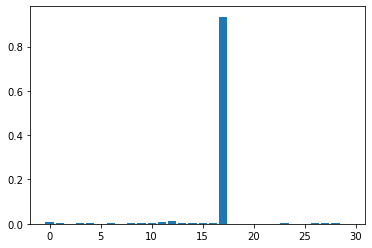

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002818DF5B5F8>]],
      dtype=object)

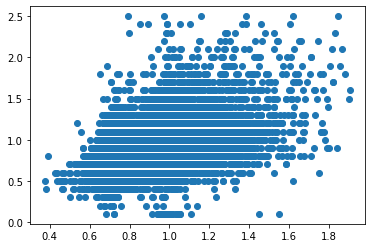

<Figure size 432x288 with 0 Axes>

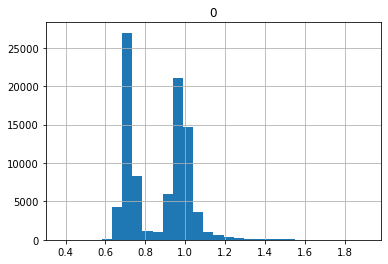

In [37]:
print("R2指数：",model.score(x_holdout, y_holdout))

importances = model.feature_importances_
for col,imp in zip(cols,importances):
    print("%r  with:   %r" % (col,imp))
plt.bar(range(len(cols)), importances)
plt.show()

plt.figure()
holdout_preds = model.predict(x_holdout)
plt.scatter(holdout_preds,y_holdout)

plt.figure()
holdout_preds = model.predict(x_holdout)
temp = pandas.DataFrame(holdout_preds)
temp.hist(bins=30)

# 实验4

In [39]:
df_1 = df_train.loc[(df["CREATININE "]<0.15)&(df["CREATININE "]>0.05)]
print(df_1.shape)
df_2 = df_train.loc[(df["CREATININE "]<0.25)&(df["CREATININE "]>0.15)]
print(df_2.shape)
df_3 = df_train.loc[(df["CREATININE "]<0.35)&(df["CREATININE "]>0.25)]
print(df_3.shape)
df_4 = df_train.loc[(df["CREATININE "]<0.45)&(df["CREATININE "]>0.35)]
print(df_4.shape)
df_5 = df_train.loc[(df["CREATININE "]<0.55)&(df["CREATININE "]>0.45)]
df_5 = df_5.sample(20000)
print(df_5.shape)
df_6 = df_train.loc[(df["CREATININE "]<0.65)&(df["CREATININE "]>0.55)]
df_6 = df_6.sample(20000)
print(df_6.shape)
df_7 = df_train.loc[(df["CREATININE "]<0.75)&(df["CREATININE "]>0.65)]
df_7 = df_7.sample(20000)
print(df_7.shape)
df_8 = df_train.loc[(df["CREATININE "]<0.85)&(df["CREATININE "]>0.75)]
df_8 = df_8.sample(20000)
print(df_8.shape)
df_9 = df_train.loc[(df["CREATININE "]<0.95)&(df["CREATININE "]>0.85)]
df_9 = df_9.sample(20000)
print(df_9.shape)
df_10 = df_train.loc[(df["CREATININE "]<1.05)&(df["CREATININE "]>0.95)]
df_10 = df_10.sample(20000)
print(df_10.shape)
df_11 = df_train.loc[(df["CREATININE "]<1.15)&(df["CREATININE "]>1.05)]
df_11 = df_11.sample(20000)
print(df_11.shape)
df_12 = df_train.loc[(df["CREATININE "]<1.25)&(df["CREATININE "]>1.15)]
df_12 = df_12.sample(20000)
print(df_12.shape)
df_13 = df_train.loc[(df["CREATININE "]<1.35)&(df["CREATININE "]>1.25)]
print(df_13.shape)
df_14 = df_train.loc[(df["CREATININE "]<1.45)&(df["CREATININE "]>1.35)]
print(df_14.shape)
df_15 = df_train.loc[(df["CREATININE "]<1.55)&(df["CREATININE "]>1.45)]
print(df_15.shape)
df_16 = df_train.loc[(df["CREATININE "]<1.65)&(df["CREATININE "]>1.55)]
print(df_16.shape)
df_17 = df_train.loc[(df["CREATININE "]<1.75)&(df["CREATININE "]>1.65)]
print(df_17.shape)
df_18 = df_train.loc[(df["CREATININE "]<1.85)&(df["CREATININE "]>1.75)]
print(df_18.shape)
df_19 = df_train.loc[(df["CREATININE "]<1.95)&(df["CREATININE "]>1.85)]
print(df_19.shape)
df_20 = df_train.loc[(df["CREATININE "]<2.05)&(df["CREATININE "]>1.95)]
print(df_20.shape)
df_21 = df_train.loc[(df["CREATININE "]<2.15)&(df["CREATININE "]>2.05)]
print(df_21.shape)
df_22 = df_train.loc[(df["CREATININE "]<2.25)&(df["CREATININE "]>2.15)]
print(df_22.shape)
df_23 = df_train.loc[(df["CREATININE "]<2.35)&(df["CREATININE "]>2.25)]
print(df_23.shape)
df_24 = df_train.loc[(df["CREATININE "]<2.45)&(df["CREATININE "]>2.35)]
print(df_24.shape)
df_25 = df_train.loc[(df["CREATININE "]<2.55)&(df["CREATININE "]>2.45)]
print(df_25.shape)

print("#####################################")

temp = pandas.concat([df_25,df_24,df_23,df_22,df_21,df_20,df_19,df_18,df_17,df_16,df_15,df_14,df_13,df_12,df_11,df_10,df_9,df_8,df_7,df_6,df_5,df_4,df_3,df_2,df_1])
temp = shuffle(temp)
print(temp.shape)

df_train = temp
print(df_train.shape)

print("#####################################")

y_train = df_train["CREATININE "].values
y_train = y_train.reshape(y_train.shape[0], 1)

cols = df_train.columns.values.tolist()
cols.remove("id")
cols.remove("sido")
cols.remove("CREATININE ")
cols.remove("GFR")
cols.remove("stage")
cols.remove("height")
cols.remove("weight")

x_train = df_train[cols].values

print(x_train.shape)
print(y_train.shape)

print("#####################################")

(395, 33)
(93, 33)
(549, 33)
(5503, 33)
(20000, 33)
(20000, 33)
(20000, 33)
(20000, 33)
(20000, 33)
(20000, 33)
(20000, 33)
(20000, 33)
(13873, 33)
(5216, 33)
(2224, 33)
(1160, 33)
(687, 33)
(523, 33)
(309, 33)
(235, 33)
(144, 33)
(137, 33)
(92, 33)
(96, 33)
(76, 33)
#####################################
(191312, 33)
(191312, 33)
#####################################
(191312, 26)
(191312, 1)
#####################################


In [72]:
df_1 = df_holdout.loc[(df_holdout["CREATININE "]<0.15)&(df_holdout["CREATININE "]>0.05)]
print(df_1.shape)
df_2 = df_holdout.loc[(df_holdout["CREATININE "]<0.25)&(df_holdout["CREATININE "]>0.15)]
print(df_2.shape)
df_3 = df_holdout.loc[(df_holdout["CREATININE "]<0.35)&(df_holdout["CREATININE "]>0.25)]
print(df_3.shape)
df_4 = df_holdout.loc[(df_holdout["CREATININE "]<0.45)&(df_holdout["CREATININE "]>0.35)]
df_4 = df_4.sample(100)
print(df_4.shape)
df_5 = df_holdout.loc[(df_holdout["CREATININE "]<0.55)&(df_holdout["CREATININE "]>0.45)]
df_5 = df_5.sample(100)
print(df_5.shape)
df_6 = df_holdout.loc[(df_holdout["CREATININE "]<0.65)&(df_holdout["CREATININE "]>0.55)]
df_6 = df_6.sample(100)
print(df_6.shape)
df_7 = df_holdout.loc[(df_holdout["CREATININE "]<0.75)&(df_holdout["CREATININE "]>0.65)]
df_7 = df_7.sample(100)
print(df_7.shape)
df_8 = df_holdout.loc[(df_holdout["CREATININE "]<0.85)&(df_holdout["CREATININE "]>0.75)]
df_8 = df_8.sample(100)
print(df_8.shape)
df_9 = df_holdout.loc[(df_holdout["CREATININE "]<0.95)&(df_holdout["CREATININE "]>0.85)]
df_9 = df_9.sample(100)
print(df_9.shape)
df_10 = df_holdout.loc[(df_holdout["CREATININE "]<1.05)&(df_holdout["CREATININE "]>0.95)]
df_10 = df_10.sample(100)
print(df_10.shape)
df_11 = df_holdout.loc[(df_holdout["CREATININE "]<1.15)&(df_holdout["CREATININE "]>1.05)]
df_11 = df_11.sample(100)
print(df_11.shape)
df_12 = df_holdout.loc[(df_holdout["CREATININE "]<1.25)&(df_holdout["CREATININE "]>1.15)]
df_12 = df_12.sample(100)
print(df_12.shape)
df_13 = df_holdout.loc[(df_holdout["CREATININE "]<1.35)&(df_holdout["CREATININE "]>1.25)]
df_13 = df_13.sample(100)
print(df_13.shape)
df_14 = df_holdout.loc[(df_holdout["CREATININE "]<1.45)&(df_holdout["CREATININE "]>1.35)]
df_14 = df_14.sample(100)
print(df_14.shape)
df_15 = df_holdout.loc[(df_holdout["CREATININE "]<1.55)&(df_holdout["CREATININE "]>1.45)]
df_15 = df_15.sample(100)
print(df_15.shape)
df_16 = df_holdout.loc[(df_holdout["CREATININE "]<1.65)&(df_holdout["CREATININE "]>1.55)]
df_16 = df_16.sample(100)
print(df_16.shape)
df_17 = df_holdout.loc[(df_holdout["CREATININE "]<1.75)&(df_holdout["CREATININE "]>1.65)]
print(df_17.shape)
df_18 = df_holdout.loc[(df_holdout["CREATININE "]<1.85)&(df_holdout["CREATININE "]>1.75)]
print(df_18.shape)
df_19 = df_holdout.loc[(df_holdout["CREATININE "]<1.95)&(df_holdout["CREATININE "]>1.85)]
print(df_19.shape)
df_20 = df_holdout.loc[(df_holdout["CREATININE "]<2.05)&(df_holdout["CREATININE "]>1.95)]
print(df_20.shape)
df_21 = df_holdout.loc[(df_holdout["CREATININE "]<2.15)&(df_holdout["CREATININE "]>2.05)]
print(df_21.shape)
df_22 = df_holdout.loc[(df_holdout["CREATININE "]<2.25)&(df_holdout["CREATININE "]>2.15)]
print(df_22.shape)
df_23 = df_holdout.loc[(df_holdout["CREATININE "]<2.35)&(df_holdout["CREATININE "]>2.25)]
print(df_23.shape)
df_24 = df_holdout.loc[(df_holdout["CREATININE "]<2.45)&(df_holdout["CREATININE "]>2.35)]
print(df_24.shape)
df_25 = df_holdout.loc[(df_holdout["CREATININE "]<2.55)&(df_holdout["CREATININE "]>2.45)]
print(df_25.shape)

print("#####################################")

(30, 33)
(6, 33)
(48, 33)
(100, 33)
(100, 33)
(100, 33)
(100, 33)
(100, 33)
(100, 33)
(100, 33)
(100, 33)
(100, 33)
(100, 33)
(100, 33)
(100, 33)
(100, 33)
(71, 33)
(38, 33)
(28, 33)
(21, 33)
(13, 33)
(9, 33)
(13, 33)
(11, 33)
(4, 33)
#####################################


In [55]:
# 测试集1

temp = pandas.concat([df_25,df_24,df_23,df_22,df_21,df_20,df_19,df_18,df_17,df_16,df_15,df_14,df_13,df_12,df_11,df_10,df_9,df_8,df_7,df_6,df_5,df_4,df_3,df_2,df_1])
temp = shuffle(temp)
print(temp.shape)

y_holdout_1 = temp["CREATININE "].values
y_holdout_stage_1 = temp["stage"]
print("y_holdout_stage: ", y_holdout_stage_1.shape)
y_holdout_1 = y_holdout_1.reshape(y_holdout_1.shape[0], 1)

cols = df_holdout.columns.values.tolist()
cols.remove("id")
cols.remove("sido")
cols.remove("CREATININE ")
cols.remove("GFR")
cols.remove("stage")
cols.remove("height")
cols.remove("weight")

x_holdout_1 = temp[cols].values

print(x_holdout_1.shape)
print(y_holdout_1.shape)

(1592, 33)
y_holdout_stage:  (1592,)
(1592, 26)
(1592, 1)


In [57]:
# 测试集2

temp = pandas.concat([df_25,df_24,df_23,df_22,df_21,df_20,df_19,df_18,df_17,df_16,df_15,df_14,df_13,df_12,df_11,df_10,df_9,df_8,df_7,df_6,df_5,df_4,df_3,df_2,df_1])
temp = shuffle(temp)
print(temp.shape)

y_holdout_2 = temp["CREATININE "].values
y_holdout_stage_2 = temp["stage"]
print("y_holdout_stage: ", y_holdout_stage_2.shape)
y_holdout_2 = y_holdout_2.reshape(y_holdout_2.shape[0], 1)

cols = df_holdout.columns.values.tolist()
cols.remove("id")
cols.remove("sido")
cols.remove("CREATININE ")
cols.remove("GFR")
cols.remove("stage")
cols.remove("height")
cols.remove("weight")

x_holdout_2 = temp[cols].values

print(x_holdout_2.shape)
print(y_holdout_2.shape)

(1592, 33)
y_holdout_stage:  (1592,)
(1592, 26)
(1592, 1)


In [59]:
# 测试集3

temp = pandas.concat([df_25,df_24,df_23,df_22,df_21,df_20,df_19,df_18,df_17,df_16,df_15,df_14,df_13,df_12,df_11,df_10,df_9,df_8,df_7,df_6,df_5,df_4,df_3,df_2,df_1])
temp = shuffle(temp)
print(temp.shape)

y_holdout_3 = temp["CREATININE "].values
y_holdout_stage_3 = temp["stage"]
print("y_holdout_stage: ", y_holdout_stage_3.shape)
y_holdout_3 = y_holdout_3.reshape(y_holdout_3.shape[0], 1)

cols = df_holdout.columns.values.tolist()
cols.remove("id")
cols.remove("sido")
cols.remove("CREATININE ")
cols.remove("GFR")
cols.remove("stage")
cols.remove("height")
cols.remove("weight")

x_holdout_3 = temp[cols].values

print(x_holdout_3.shape)
print(y_holdout_3.shape)

(1592, 33)
y_holdout_stage:  (1592,)
(1592, 26)
(1592, 1)


In [61]:
# 测试集4

temp = pandas.concat([df_25,df_24,df_23,df_22,df_21,df_20,df_19,df_18,df_17,df_16,df_15,df_14,df_13,df_12,df_11,df_10,df_9,df_8,df_7,df_6,df_5,df_4,df_3,df_2,df_1])
temp = shuffle(temp)
print(temp.shape)

y_holdout_4 = temp["CREATININE "].values
y_holdout_stage_4 = temp["stage"]
print("y_holdout_stage: ", y_holdout_stage_4.shape)
y_holdout_4 = y_holdout_4.reshape(y_holdout_4.shape[0], 1)

cols = df_holdout.columns.values.tolist()
cols.remove("id")
cols.remove("sido")
cols.remove("CREATININE ")
cols.remove("GFR")
cols.remove("stage")
cols.remove("height")
cols.remove("weight")

x_holdout_4 = temp[cols].values

print(x_holdout_4.shape)
print(y_holdout_4.shape)

(1592, 33)
y_holdout_stage:  (1592,)
(1592, 26)
(1592, 1)


In [63]:
# 测试集5

temp = pandas.concat([df_25,df_24,df_23,df_22,df_21,df_20,df_19,df_18,df_17,df_16,df_15,df_14,df_13,df_12,df_11,df_10,df_9,df_8,df_7,df_6,df_5,df_4,df_3,df_2,df_1])
temp = shuffle(temp)
print(temp.shape)

y_holdout_5 = temp["CREATININE "].values
y_holdout_stage_5 = temp["stage"]
print("y_holdout_stage: ", y_holdout_stage_5.shape)
y_holdout_5 = y_holdout_5.reshape(y_holdout_5.shape[0], 1)

cols = df_holdout.columns.values.tolist()
cols.remove("id")
cols.remove("sido")
cols.remove("CREATININE ")
cols.remove("GFR")
cols.remove("stage")
cols.remove("height")
cols.remove("weight")

x_holdout_5 = temp[cols].values

print(x_holdout_5.shape)
print(y_holdout_5.shape)

(1592, 33)
y_holdout_stage:  (1592,)
(1592, 26)
(1592, 1)


In [65]:
# 测试集6

temp = pandas.concat([df_25,df_24,df_23,df_22,df_21,df_20,df_19,df_18,df_17,df_16,df_15,df_14,df_13,df_12,df_11,df_10,df_9,df_8,df_7,df_6,df_5,df_4,df_3,df_2,df_1])
temp = shuffle(temp)
print(temp.shape)

y_holdout_6 = temp["CREATININE "].values
y_holdout_stage_6 = temp["stage"]
print("y_holdout_stage: ", y_holdout_stage_6.shape)
y_holdout_6 = y_holdout_6.reshape(y_holdout_6.shape[0], 1)

cols = df_holdout.columns.values.tolist()
cols.remove("id")
cols.remove("sido")
cols.remove("CREATININE ")
cols.remove("GFR")
cols.remove("stage")
cols.remove("height")
cols.remove("weight")

x_holdout_6 = temp[cols].values

print(x_holdout_6.shape)
print(y_holdout_6.shape)

(1592, 33)
y_holdout_stage:  (1592,)
(1592, 26)
(1592, 1)


In [67]:
# 测试集7

temp = pandas.concat([df_25,df_24,df_23,df_22,df_21,df_20,df_19,df_18,df_17,df_16,df_15,df_14,df_13,df_12,df_11,df_10,df_9,df_8,df_7,df_6,df_5,df_4,df_3,df_2,df_1])
temp = shuffle(temp)
print(temp.shape)

y_holdout_7 = temp["CREATININE "].values
y_holdout_stage_7 = temp["stage"]
print("y_holdout_stage: ", y_holdout_stage_7.shape)
y_holdout_7 = y_holdout_7.reshape(y_holdout_7.shape[0], 1)

cols = df_holdout.columns.values.tolist()
cols.remove("id")
cols.remove("sido")
cols.remove("CREATININE ")
cols.remove("GFR")
cols.remove("stage")
cols.remove("height")
cols.remove("weight")

x_holdout_7 = temp[cols].values

print(x_holdout_7.shape)
print(y_holdout_7.shape)

(1592, 33)
y_holdout_stage:  (1592,)
(1592, 26)
(1592, 1)


In [69]:
# 测试集8

temp = pandas.concat([df_25,df_24,df_23,df_22,df_21,df_20,df_19,df_18,df_17,df_16,df_15,df_14,df_13,df_12,df_11,df_10,df_9,df_8,df_7,df_6,df_5,df_4,df_3,df_2,df_1])
temp = shuffle(temp)
print(temp.shape)

y_holdout_8 = temp["CREATININE "].values
y_holdout_stage_8 = temp["stage"]
print("y_holdout_stage: ", y_holdout_stage_8.shape)
y_holdout_8 = y_holdout_8.reshape(y_holdout_8.shape[0], 1)

cols = df_holdout.columns.values.tolist()
cols.remove("id")
cols.remove("sido")
cols.remove("CREATININE ")
cols.remove("GFR")
cols.remove("stage")
cols.remove("height")
cols.remove("weight")

x_holdout_8 = temp[cols].values

print(x_holdout_8.shape)
print(y_holdout_8.shape)

(1592, 33)
y_holdout_stage:  (1592,)
(1592, 26)
(1592, 1)


In [71]:
# 测试集9

temp = pandas.concat([df_25,df_24,df_23,df_22,df_21,df_20,df_19,df_18,df_17,df_16,df_15,df_14,df_13,df_12,df_11,df_10,df_9,df_8,df_7,df_6,df_5,df_4,df_3,df_2,df_1])
temp = shuffle(temp)
print(temp.shape)

y_holdout_9 = temp["CREATININE "].values
y_holdout_stage_9 = temp["stage"]
print("y_holdout_stage: ", y_holdout_stage_9.shape)
y_holdout_9 = y_holdout_9.reshape(y_holdout_9.shape[0], 1)

cols = df_holdout.columns.values.tolist()
cols.remove("id")
cols.remove("sido")
cols.remove("CREATININE ")
cols.remove("GFR")
cols.remove("stage")
cols.remove("height")
cols.remove("weight")

x_holdout_9 = temp[cols].values

print(x_holdout_9.shape)
print(y_holdout_9.shape)

(1592, 33)
y_holdout_stage:  (1592,)
(1592, 26)
(1592, 1)


In [73]:
# 测试集10

temp = pandas.concat([df_25,df_24,df_23,df_22,df_21,df_20,df_19,df_18,df_17,df_16,df_15,df_14,df_13,df_12,df_11,df_10,df_9,df_8,df_7,df_6,df_5,df_4,df_3,df_2,df_1])
temp = shuffle(temp)
print(temp.shape)

y_holdout_10 = temp["CREATININE "].values
y_holdout_stage_10 = temp["stage"]
print("y_holdout_stage: ", y_holdout_stage_10.shape)
y_holdout_10 = y_holdout_10.reshape(y_holdout_10.shape[0], 1)

cols = df_holdout.columns.values.tolist()
cols.remove("id")
cols.remove("sido")
cols.remove("CREATININE ")
cols.remove("GFR")
cols.remove("stage")
cols.remove("height")
cols.remove("weight")

x_holdout_10 = temp[cols].values

print(x_holdout_10.shape)
print(y_holdout_10.shape)

(1592, 33)
y_holdout_stage:  (1592,)
(1592, 26)
(1592, 1)


In [74]:
y_holdout_sum = numpy.vstack([y_holdout_1,y_holdout_2,y_holdout_3,y_holdout_4,y_holdout_5,y_holdout_6,y_holdout_7,y_holdout_8,y_holdout_9,y_holdout_10])
print(y_holdout_sum.shape)
x_holdout_sum = numpy.vstack([x_holdout_1,x_holdout_2,x_holdout_3,x_holdout_4,x_holdout_5,x_holdout_6,x_holdout_7,x_holdout_8,x_holdout_9,x_holdout_10])
print(x_holdout_sum.shape)

(15920, 1)
(15920, 26)


In [36]:
model = xgboost.XGBRegressor(max_depth=10,
                           n_estimators=500, #55
                           learning_rate=0.05,
                           min_child_weight=100,
                           nthread=4,
                           subsample=1, #95
                           colsample_bytree=1, # 95
                           reg_alpha=0,
                           reg_lambda=0,
                           gamma=0,
                           objective=mse,  
                           base_score = mean_sales,
                           seed=10)

#开始训练 x_holdout,y_holdout
model.fit(x_train, y_train, verbose=1, eval_set=[(x_train, y_train),(x_holdout_sum, y_holdout_sum)],  eval_metric=func, early_stopping_rounds=10, )

###########
0 - 0.34 : 0.6365 (1037)
0.34 - 0.58 : 0.3654 (2.55e+04)
0.58 - 0.82 : 0.1481 (6e+04)
0.82 - 1.06 : 0.0911 (4e+04)
1.06 - 1.3 : 0.3256 (5.387e+04)
1.3 - 1.54 : 0.5641 (7440)
1.54 - 1.78 : 0.7683 (1847)
1.78 - 2.02 : 1.001 (1067)
2.02 - 2.26 : 1.274 (281)
2.26 - 2.5 : 1.518 (264)
###########
###########
0 - 0.34 : 0.6296 (840)
0.34 - 0.58 : 0.3938 (2000)
0.58 - 0.82 : 0.1482 (3000)
0.82 - 1.06 : 0.09114 (2000)
1.06 - 1.3 : 0.3369 (3000)
1.3 - 1.54 : 0.5842 (2000)
1.54 - 1.78 : 0.772 (1710)
1.78 - 2.02 : 1.011 (870)
2.02 - 2.26 : 1.263 (220)
2.26 - 2.5 : 1.492 (280)
###########
[0]	validation_0-rmse:0.30380	validation_1-rmse:0.54368	validation_0-myFeval:0.24824	validation_1-myFeval:0.44081
Multiple eval metrics have been passed: 'validation_1-myFeval' will be used for early stopping.

Will train until validation_1-myFeval hasn't improved in 10 rounds.
###########
0 - 0.34 : 0.6354 (1037)
0.34 - 0.58 : 0.3572 (2.55e+04)
0.58 - 0.82 : 0.144 (6e+04)
0.82 - 1.06 : 0.08498 (4e+04)

###########
0 - 0.34 : 0.6171 (840)
0.34 - 0.58 : 0.3221 (2000)
0.58 - 0.82 : 0.1252 (3000)
0.82 - 1.06 : 0.07407 (2000)
1.06 - 1.3 : 0.2493 (3000)
1.3 - 1.54 : 0.4738 (2000)
1.54 - 1.78 : 0.6303 (1710)
1.78 - 2.02 : 0.8662 (870)
2.02 - 2.26 : 1.056 (220)
2.26 - 2.5 : 1.299 (280)
###########
[11]	validation_0-rmse:0.24720	validation_1-rmse:0.46272	validation_0-myFeval:0.19573	validation_1-myFeval:0.36490
###########
0 - 0.34 : 0.6251 (1037)
0.34 - 0.58 : 0.2892 (2.55e+04)
0.58 - 0.82 : 0.1237 (6e+04)
0.82 - 1.06 : 0.07352 (4e+04)
1.06 - 1.3 : 0.2327 (5.387e+04)
1.3 - 1.54 : 0.4459 (7440)
1.54 - 1.78 : 0.6209 (1847)
1.78 - 2.02 : 0.8262 (1067)
2.02 - 2.26 : 1.071 (281)
2.26 - 2.5 : 1.308 (264)
###########
###########
0 - 0.34 : 0.6162 (840)
0.34 - 0.58 : 0.3173 (2000)
0.58 - 0.82 : 0.1247 (3000)
0.82 - 1.06 : 0.07507 (2000)
1.06 - 1.3 : 0.2436 (3000)
1.3 - 1.54 : 0.4663 (2000)
1.54 - 1.78 : 0.6204 (1710)
1.78 - 2.02 : 0.8568 (870)
2.02 - 2.26 : 1.042 (220)
2.26 - 2.5 : 1.285 (280)
#####

###########
0 - 0.34 : 0.6173 (1037)
0.34 - 0.58 : 0.2498 (2.55e+04)
0.58 - 0.82 : 0.1194 (6e+04)
0.82 - 1.06 : 0.08662 (4e+04)
1.06 - 1.3 : 0.1871 (5.387e+04)
1.3 - 1.54 : 0.3844 (7440)
1.54 - 1.78 : 0.5417 (1847)
1.78 - 2.02 : 0.7308 (1067)
2.02 - 2.26 : 0.9604 (281)
2.26 - 2.5 : 1.189 (264)
###########
###########
0 - 0.34 : 0.6083 (840)
0.34 - 0.58 : 0.2781 (2000)
0.58 - 0.82 : 0.1211 (3000)
0.82 - 1.06 : 0.09029 (2000)
1.06 - 1.3 : 0.198 (3000)
1.3 - 1.54 : 0.4055 (2000)
1.54 - 1.78 : 0.5394 (1710)
1.78 - 2.02 : 0.7739 (870)
2.02 - 2.26 : 0.9214 (220)
2.26 - 2.5 : 1.171 (280)
###########
[23]	validation_0-rmse:0.22311	validation_1-rmse:0.41922	validation_0-myFeval:0.17217	validation_1-myFeval:0.32301
###########
0 - 0.34 : 0.6168 (1037)
0.34 - 0.58 : 0.2471 (2.55e+04)
0.58 - 0.82 : 0.1194 (6e+04)
0.82 - 1.06 : 0.08833 (4e+04)
1.06 - 1.3 : 0.1842 (5.387e+04)
1.3 - 1.54 : 0.3803 (7440)
1.54 - 1.78 : 0.5364 (1847)
1.78 - 2.02 : 0.7245 (1067)
2.02 - 2.26 : 0.953 (281)
2.26 - 2.5 : 1.1

###########
0 - 0.34 : 0.611 (1037)
0.34 - 0.58 : 0.2251 (2.55e+04)
0.58 - 0.82 : 0.1219 (6e+04)
0.82 - 1.06 : 0.1063 (4e+04)
1.06 - 1.3 : 0.1614 (5.387e+04)
1.3 - 1.54 : 0.3471 (7440)
1.54 - 1.78 : 0.491 (1847)
1.78 - 2.02 : 0.669 (1067)
2.02 - 2.26 : 0.8868 (281)
2.26 - 2.5 : 1.11 (264)
###########
###########
0 - 0.34 : 0.6023 (840)
0.34 - 0.58 : 0.2539 (2000)
0.58 - 0.82 : 0.1242 (3000)
0.82 - 1.06 : 0.1111 (2000)
1.06 - 1.3 : 0.1722 (3000)
1.3 - 1.54 : 0.3683 (2000)
1.54 - 1.78 : 0.4876 (1710)
1.78 - 2.02 : 0.7229 (870)
2.02 - 2.26 : 0.8459 (220)
2.26 - 2.5 : 1.105 (280)
###########
[35]	validation_0-rmse:0.21421	validation_1-rmse:0.39855	validation_0-myFeval:0.16401	validation_1-myFeval:0.30276
###########
0 - 0.34 : 0.6104 (1037)
0.34 - 0.58 : 0.2236 (2.55e+04)
0.58 - 0.82 : 0.1222 (6e+04)
0.82 - 1.06 : 0.1076 (4e+04)
1.06 - 1.3 : 0.1599 (5.387e+04)
1.3 - 1.54 : 0.3449 (7440)
1.54 - 1.78 : 0.4878 (1847)
1.78 - 2.02 : 0.6652 (1067)
2.02 - 2.26 : 0.8824 (281)
2.26 - 2.5 : 1.105 (2

###########
0 - 0.34 : 0.6062 (1037)
0.34 - 0.58 : 0.211 (2.55e+04)
0.58 - 0.82 : 0.1252 (6e+04)
0.82 - 1.06 : 0.1189 (4e+04)
1.06 - 1.3 : 0.1484 (5.387e+04)
1.3 - 1.54 : 0.3269 (7440)
1.54 - 1.78 : 0.4616 (1847)
1.78 - 2.02 : 0.6318 (1067)
2.02 - 2.26 : 0.8418 (281)
2.26 - 2.5 : 1.061 (264)
###########
###########
0 - 0.34 : 0.5996 (840)
0.34 - 0.58 : 0.2405 (2000)
0.58 - 0.82 : 0.1282 (3000)
0.82 - 1.06 : 0.1244 (2000)
1.06 - 1.3 : 0.159 (3000)
1.3 - 1.54 : 0.3489 (2000)
1.54 - 1.78 : 0.4598 (1710)
1.78 - 2.02 : 0.6937 (870)
2.02 - 2.26 : 0.7997 (220)
2.26 - 2.5 : 1.068 (280)
###########
[47]	validation_0-rmse:0.21046	validation_1-rmse:0.38829	validation_0-myFeval:0.16070	validation_1-myFeval:0.29255
###########
0 - 0.34 : 0.6058 (1037)
0.34 - 0.58 : 0.2102 (2.55e+04)
0.58 - 0.82 : 0.1254 (6e+04)
0.82 - 1.06 : 0.1196 (4e+04)
1.06 - 1.3 : 0.1476 (5.387e+04)
1.3 - 1.54 : 0.3258 (7440)
1.54 - 1.78 : 0.4597 (1847)
1.78 - 2.02 : 0.6294 (1067)
2.02 - 2.26 : 0.8389 (281)
2.26 - 2.5 : 1.057 

###########
0 - 0.34 : 0.6024 (1037)
0.34 - 0.58 : 0.2029 (2.55e+04)
0.58 - 0.82 : 0.1271 (6e+04)
0.82 - 1.06 : 0.1257 (4e+04)
1.06 - 1.3 : 0.1416 (5.387e+04)
1.3 - 1.54 : 0.3157 (7440)
1.54 - 1.78 : 0.4447 (1847)
1.78 - 2.02 : 0.6088 (1067)
2.02 - 2.26 : 0.8144 (281)
2.26 - 2.5 : 1.029 (264)
###########
###########
0 - 0.34 : 0.5978 (840)
0.34 - 0.58 : 0.2331 (2000)
0.58 - 0.82 : 0.1306 (3000)
0.82 - 1.06 : 0.1317 (2000)
1.06 - 1.3 : 0.1525 (3000)
1.3 - 1.54 : 0.3382 (2000)
1.54 - 1.78 : 0.4438 (1710)
1.78 - 2.02 : 0.676 (870)
2.02 - 2.26 : 0.7764 (220)
2.26 - 2.5 : 1.049 (280)
###########
[59]	validation_0-rmse:0.20852	validation_1-rmse:0.38277	validation_0-myFeval:0.15890	validation_1-myFeval:0.28700
###########
0 - 0.34 : 0.6022 (1037)
0.34 - 0.58 : 0.2024 (2.55e+04)
0.58 - 0.82 : 0.1272 (6e+04)
0.82 - 1.06 : 0.1261 (4e+04)
1.06 - 1.3 : 0.1412 (5.387e+04)
1.3 - 1.54 : 0.3151 (7440)
1.54 - 1.78 : 0.4437 (1847)
1.78 - 2.02 : 0.6074 (1067)
2.02 - 2.26 : 0.8128 (281)
2.26 - 2.5 : 1.027

###########
0 - 0.34 : 0.5992 (1037)
0.34 - 0.58 : 0.198 (2.55e+04)
0.58 - 0.82 : 0.128 (6e+04)
0.82 - 1.06 : 0.1291 (4e+04)
1.06 - 1.3 : 0.138 (5.387e+04)
1.3 - 1.54 : 0.3092 (7440)
1.54 - 1.78 : 0.4347 (1847)
1.78 - 2.02 : 0.5944 (1067)
2.02 - 2.26 : 0.7973 (281)
2.26 - 2.5 : 1.008 (264)
###########
###########
0 - 0.34 : 0.596 (840)
0.34 - 0.58 : 0.2287 (2000)
0.58 - 0.82 : 0.132 (3000)
0.82 - 1.06 : 0.1359 (2000)
1.06 - 1.3 : 0.1492 (3000)
1.3 - 1.54 : 0.3326 (2000)
1.54 - 1.78 : 0.4362 (1710)
1.78 - 2.02 : 0.6665 (870)
2.02 - 2.26 : 0.7666 (220)
2.26 - 2.5 : 1.035 (280)
###########
[71]	validation_0-rmse:0.20725	validation_1-rmse:0.37988	validation_0-myFeval:0.15771	validation_1-myFeval:0.28410
###########
0 - 0.34 : 0.599 (1037)
0.34 - 0.58 : 0.1977 (2.55e+04)
0.58 - 0.82 : 0.128 (6e+04)
0.82 - 1.06 : 0.1293 (4e+04)
1.06 - 1.3 : 0.1377 (5.387e+04)
1.3 - 1.54 : 0.3088 (7440)
1.54 - 1.78 : 0.4342 (1847)
1.78 - 2.02 : 0.5935 (1067)
2.02 - 2.26 : 0.7961 (281)
2.26 - 2.5 : 1.006 (264)

###########
0 - 0.34 : 0.5964 (1037)
0.34 - 0.58 : 0.1949 (2.55e+04)
0.58 - 0.82 : 0.1283 (6e+04)
0.82 - 1.06 : 0.1308 (4e+04)
1.06 - 1.3 : 0.136 (5.387e+04)
1.3 - 1.54 : 0.3052 (7440)
1.54 - 1.78 : 0.4284 (1847)
1.78 - 2.02 : 0.5847 (1067)
2.02 - 2.26 : 0.7848 (281)
2.26 - 2.5 : 0.9915 (264)
###########
###########
0 - 0.34 : 0.5949 (840)
0.34 - 0.58 : 0.2262 (2000)
0.58 - 0.82 : 0.1328 (3000)
0.82 - 1.06 : 0.1381 (2000)
1.06 - 1.3 : 0.1475 (3000)
1.3 - 1.54 : 0.3295 (2000)
1.54 - 1.78 : 0.4312 (1710)
1.78 - 2.02 : 0.6595 (870)
2.02 - 2.26 : 0.7596 (220)
2.26 - 2.5 : 1.027 (280)
###########
[83]	validation_0-rmse:0.20629	validation_1-rmse:0.37818	validation_0-myFeval:0.15687	validation_1-myFeval:0.28230
###########
0 - 0.34 : 0.5962 (1037)
0.34 - 0.58 : 0.1947 (2.55e+04)
0.58 - 0.82 : 0.1283 (6e+04)
0.82 - 1.06 : 0.1309 (4e+04)
1.06 - 1.3 : 0.1358 (5.387e+04)
1.3 - 1.54 : 0.3049 (7440)
1.54 - 1.78 : 0.4279 (1847)
1.78 - 2.02 : 0.5839 (1067)
2.02 - 2.26 : 0.7839 (281)
2.26 - 2.5 : 0.99

###########
0 - 0.34 : 0.5937 (1037)
0.34 - 0.58 : 0.193 (2.55e+04)
0.58 - 0.82 : 0.1283 (6e+04)
0.82 - 1.06 : 0.1314 (4e+04)
1.06 - 1.3 : 0.1349 (5.387e+04)
1.3 - 1.54 : 0.3024 (7440)
1.54 - 1.78 : 0.4232 (1847)
1.78 - 2.02 : 0.577 (1067)
2.02 - 2.26 : 0.7748 (281)
2.26 - 2.5 : 0.9786 (264)
###########
###########
0 - 0.34 : 0.594 (840)
0.34 - 0.58 : 0.2246 (2000)
0.58 - 0.82 : 0.1331 (3000)
0.82 - 1.06 : 0.1392 (2000)
1.06 - 1.3 : 0.1466 (3000)
1.3 - 1.54 : 0.3275 (2000)
1.54 - 1.78 : 0.4282 (1710)
1.78 - 2.02 : 0.6551 (870)
2.02 - 2.26 : 0.7538 (220)
2.26 - 2.5 : 1.022 (280)
###########
[95]	validation_0-rmse:0.20541	validation_1-rmse:0.37695	validation_0-myFeval:0.15618	validation_1-myFeval:0.28110
###########
0 - 0.34 : 0.5937 (1037)
0.34 - 0.58 : 0.1929 (2.55e+04)
0.58 - 0.82 : 0.1283 (6e+04)
0.82 - 1.06 : 0.1314 (4e+04)
1.06 - 1.3 : 0.1348 (5.387e+04)
1.3 - 1.54 : 0.3022 (7440)
1.54 - 1.78 : 0.423 (1847)
1.78 - 2.02 : 0.5767 (1067)
2.02 - 2.26 : 0.7742 (281)
2.26 - 2.5 : 0.9779 

###########
0 - 0.34 : 0.5913 (1037)
0.34 - 0.58 : 0.1918 (2.55e+04)
0.58 - 0.82 : 0.1281 (6e+04)
0.82 - 1.06 : 0.1314 (4e+04)
1.06 - 1.3 : 0.1343 (5.387e+04)
1.3 - 1.54 : 0.3006 (7440)
1.54 - 1.78 : 0.4199 (1847)
1.78 - 2.02 : 0.5716 (1067)
2.02 - 2.26 : 0.7668 (281)
2.26 - 2.5 : 0.9688 (264)
###########
###########
0 - 0.34 : 0.594 (840)
0.34 - 0.58 : 0.224 (2000)
0.58 - 0.82 : 0.1332 (3000)
0.82 - 1.06 : 0.1397 (2000)
1.06 - 1.3 : 0.1463 (3000)
1.3 - 1.54 : 0.3266 (2000)
1.54 - 1.78 : 0.4267 (1710)
1.78 - 2.02 : 0.6523 (870)
2.02 - 2.26 : 0.7502 (220)
2.26 - 2.5 : 1.021 (280)
###########
[107]	validation_0-rmse:0.20467	validation_1-rmse:0.37644	validation_0-myFeval:0.15561	validation_1-myFeval:0.28053
###########
0 - 0.34 : 0.591 (1037)
0.34 - 0.58 : 0.1917 (2.55e+04)
0.58 - 0.82 : 0.128 (6e+04)
0.82 - 1.06 : 0.1314 (4e+04)
1.06 - 1.3 : 0.1342 (5.387e+04)
1.3 - 1.54 : 0.3004 (7440)
1.54 - 1.78 : 0.4197 (1847)
1.78 - 2.02 : 0.5711 (1067)
2.02 - 2.26 : 0.7658 (281)
2.26 - 2.5 : 0.9677

###########
0 - 0.34 : 0.5889 (1037)
0.34 - 0.58 : 0.1907 (2.55e+04)
0.58 - 0.82 : 0.1278 (6e+04)
0.82 - 1.06 : 0.1313 (4e+04)
1.06 - 1.3 : 0.1338 (5.387e+04)
1.3 - 1.54 : 0.2991 (7440)
1.54 - 1.78 : 0.4174 (1847)
1.78 - 2.02 : 0.5676 (1067)
2.02 - 2.26 : 0.7602 (281)
2.26 - 2.5 : 0.961 (264)
###########
###########
0 - 0.34 : 0.5932 (840)
0.34 - 0.58 : 0.2236 (2000)
0.58 - 0.82 : 0.1332 (3000)
0.82 - 1.06 : 0.1399 (2000)
1.06 - 1.3 : 0.1461 (3000)
1.3 - 1.54 : 0.3261 (2000)
1.54 - 1.78 : 0.4253 (1710)
1.78 - 2.02 : 0.6511 (870)
2.02 - 2.26 : 0.7469 (220)
2.26 - 2.5 : 1.017 (280)
###########
[119]	validation_0-rmse:0.20401	validation_1-rmse:0.37587	validation_0-myFeval:0.15510	validation_1-myFeval:0.28001
###########
0 - 0.34 : 0.5888 (1037)
0.34 - 0.58 : 0.1907 (2.55e+04)
0.58 - 0.82 : 0.1278 (6e+04)
0.82 - 1.06 : 0.1313 (4e+04)
1.06 - 1.3 : 0.1338 (5.387e+04)
1.3 - 1.54 : 0.2991 (7440)
1.54 - 1.78 : 0.4173 (1847)
1.78 - 2.02 : 0.5673 (1067)
2.02 - 2.26 : 0.7598 (281)
2.26 - 2.5 : 0.9

###########
0 - 0.34 : 0.5869 (1037)
0.34 - 0.58 : 0.19 (2.55e+04)
0.58 - 0.82 : 0.1276 (6e+04)
0.82 - 1.06 : 0.1311 (4e+04)
1.06 - 1.3 : 0.1334 (5.387e+04)
1.3 - 1.54 : 0.2978 (7440)
1.54 - 1.78 : 0.4152 (1847)
1.78 - 2.02 : 0.5635 (1067)
2.02 - 2.26 : 0.7539 (281)
2.26 - 2.5 : 0.9533 (264)
###########
###########
0 - 0.34 : 0.5935 (840)
0.34 - 0.58 : 0.2232 (2000)
0.58 - 0.82 : 0.1332 (3000)
0.82 - 1.06 : 0.1401 (2000)
1.06 - 1.3 : 0.146 (3000)
1.3 - 1.54 : 0.3257 (2000)
1.54 - 1.78 : 0.4239 (1710)
1.78 - 2.02 : 0.6493 (870)
2.02 - 2.26 : 0.7457 (220)
2.26 - 2.5 : 1.017 (280)
###########
[131]	validation_0-rmse:0.20340	validation_1-rmse:0.37567	validation_0-myFeval:0.15466	validation_1-myFeval:0.27968
###########
0 - 0.34 : 0.5867 (1037)
0.34 - 0.58 : 0.19 (2.55e+04)
0.58 - 0.82 : 0.1276 (6e+04)
0.82 - 1.06 : 0.1311 (4e+04)
1.06 - 1.3 : 0.1334 (5.387e+04)
1.3 - 1.54 : 0.2978 (7440)
1.54 - 1.78 : 0.4149 (1847)
1.78 - 2.02 : 0.5631 (1067)
2.02 - 2.26 : 0.7531 (281)
2.26 - 2.5 : 0.9524 

###########
0 - 0.34 : 0.5852 (1037)
0.34 - 0.58 : 0.1895 (2.55e+04)
0.58 - 0.82 : 0.1274 (6e+04)
0.82 - 1.06 : 0.1309 (4e+04)
1.06 - 1.3 : 0.1332 (5.387e+04)
1.3 - 1.54 : 0.2969 (7440)
1.54 - 1.78 : 0.4132 (1847)
1.78 - 2.02 : 0.5603 (1067)
2.02 - 2.26 : 0.7493 (281)
2.26 - 2.5 : 0.947 (264)
###########
###########
0 - 0.34 : 0.5935 (840)
0.34 - 0.58 : 0.223 (2000)
0.58 - 0.82 : 0.1332 (3000)
0.82 - 1.06 : 0.1402 (2000)
1.06 - 1.3 : 0.1459 (3000)
1.3 - 1.54 : 0.3254 (2000)
1.54 - 1.78 : 0.4233 (1710)
1.78 - 2.02 : 0.6482 (870)
2.02 - 2.26 : 0.7426 (220)
2.26 - 2.5 : 1.015 (280)
###########
[143]	validation_0-rmse:0.20291	validation_1-rmse:0.37543	validation_0-myFeval:0.15431	validation_1-myFeval:0.27943
###########
0 - 0.34 : 0.5852 (1037)
0.34 - 0.58 : 0.1894 (2.55e+04)
0.58 - 0.82 : 0.1274 (6e+04)
0.82 - 1.06 : 0.1309 (4e+04)
1.06 - 1.3 : 0.1332 (5.387e+04)
1.3 - 1.54 : 0.2969 (7440)
1.54 - 1.78 : 0.4131 (1847)
1.78 - 2.02 : 0.5601 (1067)
2.02 - 2.26 : 0.749 (281)
2.26 - 2.5 : 0.946

###########
0 - 0.34 : 0.5837 (1037)
0.34 - 0.58 : 0.1889 (2.55e+04)
0.58 - 0.82 : 0.1271 (6e+04)
0.82 - 1.06 : 0.1307 (4e+04)
1.06 - 1.3 : 0.1329 (5.387e+04)
1.3 - 1.54 : 0.296 (7440)
1.54 - 1.78 : 0.4115 (1847)
1.78 - 2.02 : 0.5574 (1067)
2.02 - 2.26 : 0.7445 (281)
2.26 - 2.5 : 0.9419 (264)
###########
###########
0 - 0.34 : 0.5932 (840)
0.34 - 0.58 : 0.2227 (2000)
0.58 - 0.82 : 0.1333 (3000)
0.82 - 1.06 : 0.1403 (2000)
1.06 - 1.3 : 0.1459 (3000)
1.3 - 1.54 : 0.3247 (2000)
1.54 - 1.78 : 0.423 (1710)
1.78 - 2.02 : 0.6478 (870)
2.02 - 2.26 : 0.7422 (220)
2.26 - 2.5 : 1.015 (280)
###########
[155]	validation_0-rmse:0.20244	validation_1-rmse:0.37535	validation_0-myFeval:0.15397	validation_1-myFeval:0.27925
###########
0 - 0.34 : 0.5836 (1037)
0.34 - 0.58 : 0.1889 (2.55e+04)
0.58 - 0.82 : 0.1271 (6e+04)
0.82 - 1.06 : 0.1307 (4e+04)
1.06 - 1.3 : 0.1329 (5.387e+04)
1.3 - 1.54 : 0.2959 (7440)
1.54 - 1.78 : 0.4113 (1847)
1.78 - 2.02 : 0.5571 (1067)
2.02 - 2.26 : 0.7438 (281)
2.26 - 2.5 : 0.94

###########
0 - 0.34 : 0.5826 (1037)
0.34 - 0.58 : 0.1885 (2.55e+04)
0.58 - 0.82 : 0.127 (6e+04)
0.82 - 1.06 : 0.1306 (4e+04)
1.06 - 1.3 : 0.1328 (5.387e+04)
1.3 - 1.54 : 0.2953 (7440)
1.54 - 1.78 : 0.4102 (1847)
1.78 - 2.02 : 0.555 (1067)
2.02 - 2.26 : 0.7404 (281)
2.26 - 2.5 : 0.9374 (264)
###########
###########
0 - 0.34 : 0.593 (840)
0.34 - 0.58 : 0.2224 (2000)
0.58 - 0.82 : 0.1333 (3000)
0.82 - 1.06 : 0.1404 (2000)
1.06 - 1.3 : 0.146 (3000)
1.3 - 1.54 : 0.3245 (2000)
1.54 - 1.78 : 0.4225 (1710)
1.78 - 2.02 : 0.6473 (870)
2.02 - 2.26 : 0.7418 (220)
2.26 - 2.5 : 1.015 (280)
###########
[167]	validation_0-rmse:0.20209	validation_1-rmse:0.37523	validation_0-myFeval:0.15374	validation_1-myFeval:0.27911
###########
0 - 0.34 : 0.5826 (1037)
0.34 - 0.58 : 0.1884 (2.55e+04)
0.58 - 0.82 : 0.127 (6e+04)
0.82 - 1.06 : 0.1306 (4e+04)
1.06 - 1.3 : 0.1328 (5.387e+04)
1.3 - 1.54 : 0.2953 (7440)
1.54 - 1.78 : 0.4102 (1847)
1.78 - 2.02 : 0.5549 (1067)
2.02 - 2.26 : 0.7402 (281)
2.26 - 2.5 : 0.9372 

###########
0 - 0.34 : 0.5816 (1037)
0.34 - 0.58 : 0.1881 (2.55e+04)
0.58 - 0.82 : 0.1269 (6e+04)
0.82 - 1.06 : 0.1304 (4e+04)
1.06 - 1.3 : 0.1327 (5.387e+04)
1.3 - 1.54 : 0.2948 (7440)
1.54 - 1.78 : 0.4091 (1847)
1.78 - 2.02 : 0.5526 (1067)
2.02 - 2.26 : 0.7363 (281)
2.26 - 2.5 : 0.9326 (264)
###########
###########
0 - 0.34 : 0.5925 (840)
0.34 - 0.58 : 0.2223 (2000)
0.58 - 0.82 : 0.1334 (3000)
0.82 - 1.06 : 0.1404 (2000)
1.06 - 1.3 : 0.146 (3000)
1.3 - 1.54 : 0.3243 (2000)
1.54 - 1.78 : 0.4221 (1710)
1.78 - 2.02 : 0.6468 (870)
2.02 - 2.26 : 0.7422 (220)
2.26 - 2.5 : 1.014 (280)
###########
[179]	validation_0-rmse:0.20176	validation_1-rmse:0.37514	validation_0-myFeval:0.15351	validation_1-myFeval:0.27899
###########
0 - 0.34 : 0.5814 (1037)
0.34 - 0.58 : 0.188 (2.55e+04)
0.58 - 0.82 : 0.1268 (6e+04)
0.82 - 1.06 : 0.1304 (4e+04)
1.06 - 1.3 : 0.1326 (5.387e+04)
1.3 - 1.54 : 0.2948 (7440)
1.54 - 1.78 : 0.409 (1847)
1.78 - 2.02 : 0.5523 (1067)
2.02 - 2.26 : 0.7358 (281)
2.26 - 2.5 : 0.932

###########
0 - 0.34 : 0.5804 (1037)
0.34 - 0.58 : 0.1877 (2.55e+04)
0.58 - 0.82 : 0.1267 (6e+04)
0.82 - 1.06 : 0.1304 (4e+04)
1.06 - 1.3 : 0.1325 (5.387e+04)
1.3 - 1.54 : 0.2943 (7440)
1.54 - 1.78 : 0.4083 (1847)
1.78 - 2.02 : 0.5513 (1067)
2.02 - 2.26 : 0.7337 (281)
2.26 - 2.5 : 0.9296 (264)
###########
###########
0 - 0.34 : 0.592 (840)
0.34 - 0.58 : 0.222 (2000)
0.58 - 0.82 : 0.1335 (3000)
0.82 - 1.06 : 0.1405 (2000)
1.06 - 1.3 : 0.146 (3000)
1.3 - 1.54 : 0.3242 (2000)
1.54 - 1.78 : 0.4217 (1710)
1.78 - 2.02 : 0.6468 (870)
2.02 - 2.26 : 0.7421 (220)
2.26 - 2.5 : 1.015 (280)
###########
[191]	validation_0-rmse:0.20147	validation_1-rmse:0.37509	validation_0-myFeval:0.15329	validation_1-myFeval:0.27891
###########
0 - 0.34 : 0.5803 (1037)
0.34 - 0.58 : 0.1876 (2.55e+04)
0.58 - 0.82 : 0.1267 (6e+04)
0.82 - 1.06 : 0.1303 (4e+04)
1.06 - 1.3 : 0.1325 (5.387e+04)
1.3 - 1.54 : 0.2942 (7440)
1.54 - 1.78 : 0.408 (1847)
1.78 - 2.02 : 0.5506 (1067)
2.02 - 2.26 : 0.7327 (281)
2.26 - 2.5 : 0.9286

###########
0 - 0.34 : 0.5793 (1037)
0.34 - 0.58 : 0.1873 (2.55e+04)
0.58 - 0.82 : 0.1266 (6e+04)
0.82 - 1.06 : 0.1302 (4e+04)
1.06 - 1.3 : 0.1324 (5.387e+04)
1.3 - 1.54 : 0.2938 (7440)
1.54 - 1.78 : 0.4071 (1847)
1.78 - 2.02 : 0.5491 (1067)
2.02 - 2.26 : 0.73 (281)
2.26 - 2.5 : 0.9259 (264)
###########
###########
0 - 0.34 : 0.5921 (840)
0.34 - 0.58 : 0.2219 (2000)
0.58 - 0.82 : 0.1335 (3000)
0.82 - 1.06 : 0.1405 (2000)
1.06 - 1.3 : 0.146 (3000)
1.3 - 1.54 : 0.3241 (2000)
1.54 - 1.78 : 0.4213 (1710)
1.78 - 2.02 : 0.6459 (870)
2.02 - 2.26 : 0.7403 (220)
2.26 - 2.5 : 1.015 (280)
###########
[203]	validation_0-rmse:0.20116	validation_1-rmse:0.37501	validation_0-myFeval:0.15307	validation_1-myFeval:0.27879
###########
0 - 0.34 : 0.5792 (1037)
0.34 - 0.58 : 0.1873 (2.55e+04)
0.58 - 0.82 : 0.1266 (6e+04)
0.82 - 1.06 : 0.1302 (4e+04)
1.06 - 1.3 : 0.1323 (5.387e+04)
1.3 - 1.54 : 0.2937 (7440)
1.54 - 1.78 : 0.407 (1847)
1.78 - 2.02 : 0.549 (1067)
2.02 - 2.26 : 0.7296 (281)
2.26 - 2.5 : 0.9255 

###########
0 - 0.34 : 0.5782 (1037)
0.34 - 0.58 : 0.187 (2.55e+04)
0.58 - 0.82 : 0.1264 (6e+04)
0.82 - 1.06 : 0.13 (4e+04)
1.06 - 1.3 : 0.1322 (5.387e+04)
1.3 - 1.54 : 0.2932 (7440)
1.54 - 1.78 : 0.4061 (1847)
1.78 - 2.02 : 0.5474 (1067)
2.02 - 2.26 : 0.7273 (281)
2.26 - 2.5 : 0.9224 (264)
###########
###########
0 - 0.34 : 0.592 (840)
0.34 - 0.58 : 0.2218 (2000)
0.58 - 0.82 : 0.1335 (3000)
0.82 - 1.06 : 0.1405 (2000)
1.06 - 1.3 : 0.1461 (3000)
1.3 - 1.54 : 0.3239 (2000)
1.54 - 1.78 : 0.4209 (1710)
1.78 - 2.02 : 0.6455 (870)
2.02 - 2.26 : 0.7405 (220)
2.26 - 2.5 : 1.013 (280)
###########
[215]	validation_0-rmse:0.20083	validation_1-rmse:0.37493	validation_0-myFeval:0.15284	validation_1-myFeval:0.27868
###########
0 - 0.34 : 0.5781 (1037)
0.34 - 0.58 : 0.1869 (2.55e+04)
0.58 - 0.82 : 0.1264 (6e+04)
0.82 - 1.06 : 0.13 (4e+04)
1.06 - 1.3 : 0.1322 (5.387e+04)
1.3 - 1.54 : 0.2932 (7440)
1.54 - 1.78 : 0.4061 (1847)
1.78 - 2.02 : 0.5473 (1067)
2.02 - 2.26 : 0.7273 (281)
2.26 - 2.5 : 0.9222 (

###########
0 - 0.34 : 0.5772 (1037)
0.34 - 0.58 : 0.1867 (2.55e+04)
0.58 - 0.82 : 0.1263 (6e+04)
0.82 - 1.06 : 0.1299 (4e+04)
1.06 - 1.3 : 0.132 (5.387e+04)
1.3 - 1.54 : 0.2926 (7440)
1.54 - 1.78 : 0.4052 (1847)
1.78 - 2.02 : 0.5457 (1067)
2.02 - 2.26 : 0.7251 (281)
2.26 - 2.5 : 0.9194 (264)
###########
###########
0 - 0.34 : 0.5921 (840)
0.34 - 0.58 : 0.2217 (2000)
0.58 - 0.82 : 0.1334 (3000)
0.82 - 1.06 : 0.1406 (2000)
1.06 - 1.3 : 0.1462 (3000)
1.3 - 1.54 : 0.3239 (2000)
1.54 - 1.78 : 0.4206 (1710)
1.78 - 2.02 : 0.6451 (870)
2.02 - 2.26 : 0.7392 (220)
2.26 - 2.5 : 1.013 (280)
###########
[227]	validation_0-rmse:0.20053	validation_1-rmse:0.37484	validation_0-myFeval:0.15263	validation_1-myFeval:0.27860
###########
0 - 0.34 : 0.5771 (1037)
0.34 - 0.58 : 0.1866 (2.55e+04)
0.58 - 0.82 : 0.1263 (6e+04)
0.82 - 1.06 : 0.1299 (4e+04)
1.06 - 1.3 : 0.132 (5.387e+04)
1.3 - 1.54 : 0.2926 (7440)
1.54 - 1.78 : 0.4051 (1847)
1.78 - 2.02 : 0.5454 (1067)
2.02 - 2.26 : 0.7247 (281)
2.26 - 2.5 : 0.91

###########
0 - 0.34 : 0.5762 (1037)
0.34 - 0.58 : 0.1863 (2.55e+04)
0.58 - 0.82 : 0.1261 (6e+04)
0.82 - 1.06 : 0.1298 (4e+04)
1.06 - 1.3 : 0.1319 (5.387e+04)
1.3 - 1.54 : 0.2922 (7440)
1.54 - 1.78 : 0.4044 (1847)
1.78 - 2.02 : 0.5443 (1067)
2.02 - 2.26 : 0.7231 (281)
2.26 - 2.5 : 0.917 (264)
###########
###########
0 - 0.34 : 0.5924 (840)
0.34 - 0.58 : 0.2216 (2000)
0.58 - 0.82 : 0.1335 (3000)
0.82 - 1.06 : 0.1406 (2000)
1.06 - 1.3 : 0.1463 (3000)
1.3 - 1.54 : 0.3238 (2000)
1.54 - 1.78 : 0.4202 (1710)
1.78 - 2.02 : 0.6447 (870)
2.02 - 2.26 : 0.7384 (220)
2.26 - 2.5 : 1.014 (280)
###########
[239]	validation_0-rmse:0.20029	validation_1-rmse:0.37486	validation_0-myFeval:0.15245	validation_1-myFeval:0.27856
###########
0 - 0.34 : 0.5761 (1037)
0.34 - 0.58 : 0.1863 (2.55e+04)
0.58 - 0.82 : 0.1261 (6e+04)
0.82 - 1.06 : 0.1298 (4e+04)
1.06 - 1.3 : 0.1319 (5.387e+04)
1.3 - 1.54 : 0.2922 (7440)
1.54 - 1.78 : 0.4044 (1847)
1.78 - 2.02 : 0.5443 (1067)
2.02 - 2.26 : 0.723 (281)
2.26 - 2.5 : 0.91

###########
0 - 0.34 : 0.5752 (1037)
0.34 - 0.58 : 0.186 (2.55e+04)
0.58 - 0.82 : 0.126 (6e+04)
0.82 - 1.06 : 0.1297 (4e+04)
1.06 - 1.3 : 0.1317 (5.387e+04)
1.3 - 1.54 : 0.2917 (7440)
1.54 - 1.78 : 0.4037 (1847)
1.78 - 2.02 : 0.5429 (1067)
2.02 - 2.26 : 0.7211 (281)
2.26 - 2.5 : 0.9148 (264)
###########
###########
0 - 0.34 : 0.5921 (840)
0.34 - 0.58 : 0.2215 (2000)
0.58 - 0.82 : 0.1335 (3000)
0.82 - 1.06 : 0.1407 (2000)
1.06 - 1.3 : 0.1463 (3000)
1.3 - 1.54 : 0.3239 (2000)
1.54 - 1.78 : 0.42 (1710)
1.78 - 2.02 : 0.645 (870)
2.02 - 2.26 : 0.7386 (220)
2.26 - 2.5 : 1.014 (280)
###########
[251]	validation_0-rmse:0.20003	validation_1-rmse:0.37488	validation_0-myFeval:0.15226	validation_1-myFeval:0.27855
###########
0 - 0.34 : 0.5752 (1037)
0.34 - 0.58 : 0.186 (2.55e+04)
0.58 - 0.82 : 0.126 (6e+04)
0.82 - 1.06 : 0.1297 (4e+04)
1.06 - 1.3 : 0.1317 (5.387e+04)
1.3 - 1.54 : 0.2917 (7440)
1.54 - 1.78 : 0.4037 (1847)
1.78 - 2.02 : 0.5429 (1067)
2.02 - 2.26 : 0.7211 (281)
2.26 - 2.5 : 0.9147 (2

XGBRegressor(base_score=0.8524442689311917, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=10, min_child_weight=100, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4, nthread=4,
             num_parallel_tree=1,
             objective=<function mse at 0x00000203123C3950>, random_state=10,
             reg_alpha=0, reg_lambda=0, scale_pos_weight=1, seed=10,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [37]:
pickle.dump(model, open("models\model_20000.pickle.dat", "wb"))

In [40]:
model = pickle.load(open("models\model_20000.pickle.dat", "rb"))

R2指数： 0.44815758235407177
'age'  with:   0.0067318734
'waist'  with:   0.0008826641
'vision_left'  with:   0.00067587284
'vision_right'  with:   0.0007039337
'listen_left'  with:   0.0007534466
'listen_right'  with:   0.0008408987
'BP_HIGH '  with:   0.0007618955
'BP_LWST '  with:   0.00062915136
'BLDS'  with:   0.0008614769
'TOT_CHOLE '  with:   0.0007143735
'TRIGLYCERIDE'  with:   0.001034608
'HDL_CHOLE '  with:   0.00089305994
'LDL_CHOLE '  with:   0.0008138887
'HMG '  with:   0.0030250938
'OLIG_PROTE_CD'  with:   0.0074343756
'SGOT_AST '  with:   0.0007923583
'SGPT_ALT '  with:   0.0008136244
'GAMMA_GTP '  with:   0.00089495094
'DRINK_OR_NOT'  with:   0.001688532
'MOUTH_CHECK'  with:   0.00084153505
'BMI'  with:   0.001293232
'sex_1'  with:   0.96389866
'sex_2'  with:   0.0
'SMK_STAT_TYPE_RSPS_CD_1.0'  with:   0.0006874855
'SMK_STAT_TYPE_RSPS_CD_2.0'  with:   0.00059701514
'SMK_STAT_TYPE_RSPS_CD_3.0'  with:   0.0017360061


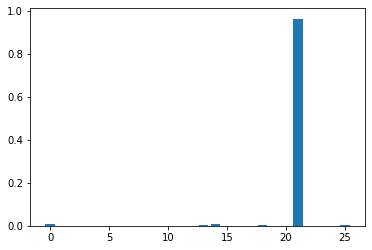

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CB20B8E4A8>]],
      dtype=object)

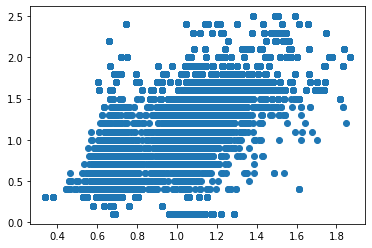

<Figure size 432x288 with 0 Axes>

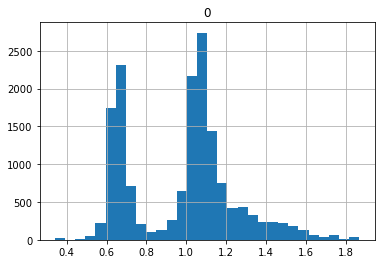

In [41]:
print("R2指数：",model.score(x_holdout_sum, y_holdout_sum))

importances = model.feature_importances_
for col,imp in zip(cols,importances):
    print("%r  with:   %r" % (col,imp))
plt.bar(range(len(cols)), importances)
plt.show()

plt.figure()
holdout_preds = model.predict(x_holdout_sum)
plt.scatter(holdout_preds,y_holdout_sum)

plt.figure()
holdout_preds = model.predict(x_holdout_sum)
temp = pandas.DataFrame(holdout_preds)
temp.hist(bins=30)

In [42]:
print("R2指数：",model.score(x_holdout_1, y_holdout_1))
print("R2指数：",model.score(x_holdout_2, y_holdout_2))
print("R2指数：",model.score(x_holdout_3, y_holdout_3))
print("R2指数：",model.score(x_holdout_4, y_holdout_4))
print("R2指数：",model.score(x_holdout_5, y_holdout_5))
print("R2指数：",model.score(x_holdout_6, y_holdout_6))
print("R2指数：",model.score(x_holdout_7, y_holdout_7))
print("R2指数：",model.score(x_holdout_8, y_holdout_8))
print("R2指数：",model.score(x_holdout_9, y_holdout_9))
print("R2指数：",model.score(x_holdout_10, y_holdout_10))

R2指数： 0.4529970086978711
R2指数： 0.45388935256742213
R2指数： 0.45315163989519447
R2指数： 0.4353000137270028
R2指数： 0.4565371419491928
R2指数： 0.4453144027778595
R2指数： 0.44447599784015523
R2指数： 0.4518447644381529
R2指数： 0.44004367381033216
R2指数： 0.44802182783753475


# 实验5

In [41]:
df_1 = df_train.loc[(df["CREATININE "]<0.15)&(df["CREATININE "]>0.05)]
print(df_1.shape)
df_2 = df_train.loc[(df["CREATININE "]<0.25)&(df["CREATININE "]>0.15)]
print(df_2.shape)
df_3 = df_train.loc[(df["CREATININE "]<0.35)&(df["CREATININE "]>0.25)]
print(df_3.shape)
df_4 = df_train.loc[(df["CREATININE "]<0.45)&(df["CREATININE "]>0.35)]
print(df_4.shape)
df_5 = df_train.loc[(df["CREATININE "]<0.55)&(df["CREATININE "]>0.45)]
df_5 = df_5.sample(10000)
print(df_5.shape)
df_6 = df_train.loc[(df["CREATININE "]<0.65)&(df["CREATININE "]>0.55)]
df_6 = df_6.sample(10000)
print(df_6.shape)
df_7 = df_train.loc[(df["CREATININE "]<0.75)&(df["CREATININE "]>0.65)]
df_7 = df_7.sample(10000)
print(df_7.shape)
df_8 = df_train.loc[(df["CREATININE "]<0.85)&(df["CREATININE "]>0.75)]
df_8 = df_8.sample(10000)
print(df_8.shape)
df_9 = df_train.loc[(df["CREATININE "]<0.95)&(df["CREATININE "]>0.85)]
df_9 = df_9.sample(10000)
print(df_9.shape)
df_10 = df_train.loc[(df["CREATININE "]<1.05)&(df["CREATININE "]>0.95)]
df_10 = df_10.sample(10000)
print(df_10.shape)
df_11 = df_train.loc[(df["CREATININE "]<1.15)&(df["CREATININE "]>1.05)]
df_11 = df_11.sample(10000)
print(df_11.shape)
df_12 = df_train.loc[(df["CREATININE "]<1.25)&(df["CREATININE "]>1.15)]
df_12 = df_12.sample(10000)
print(df_12.shape)
df_13 = df_train.loc[(df["CREATININE "]<1.35)&(df["CREATININE "]>1.25)]
df_13 = df_13.sample(10000)
print(df_13.shape)
df_14 = df_train.loc[(df["CREATININE "]<1.45)&(df["CREATININE "]>1.35)]
print(df_14.shape)
df_15 = df_train.loc[(df["CREATININE "]<1.55)&(df["CREATININE "]>1.45)]
print(df_15.shape)
df_16 = df_train.loc[(df["CREATININE "]<1.65)&(df["CREATININE "]>1.55)]
print(df_16.shape)
df_17 = df_train.loc[(df["CREATININE "]<1.75)&(df["CREATININE "]>1.65)]
print(df_17.shape)
df_18 = df_train.loc[(df["CREATININE "]<1.85)&(df["CREATININE "]>1.75)]
print(df_18.shape)
df_19 = df_train.loc[(df["CREATININE "]<1.95)&(df["CREATININE "]>1.85)]
print(df_19.shape)
df_20 = df_train.loc[(df["CREATININE "]<2.05)&(df["CREATININE "]>1.95)]
print(df_20.shape)
df_21 = df_train.loc[(df["CREATININE "]<2.15)&(df["CREATININE "]>2.05)]
print(df_21.shape)
df_22 = df_train.loc[(df["CREATININE "]<2.25)&(df["CREATININE "]>2.15)]
print(df_22.shape)
df_23 = df_train.loc[(df["CREATININE "]<2.35)&(df["CREATININE "]>2.25)]
print(df_23.shape)
df_24 = df_train.loc[(df["CREATININE "]<2.45)&(df["CREATININE "]>2.35)]
print(df_24.shape)
df_25 = df_train.loc[(df["CREATININE "]<2.55)&(df["CREATININE "]>2.45)]
print(df_25.shape)

print("#####################################")

temp = pandas.concat([df_25,df_24,df_23,df_22,df_21,df_20,df_19,df_18,df_17,df_16,df_15,df_14,df_13,df_12,df_11,df_10,df_9,df_8,df_7,df_6,df_5,df_4,df_3,df_2,df_1])
temp = shuffle(temp)
print(temp.shape)

df_train = temp
print(df_train.shape)

print("#####################################")

y_train = df_train["CREATININE "].values
y_train = y_train.reshape(y_train.shape[0], 1)

cols = df_train.columns.values.tolist()
cols.remove("id")
cols.remove("sido")
cols.remove("CREATININE ")
cols.remove("GFR")
cols.remove("stage")
cols.remove("height")
cols.remove("weight")

x_train = df_train[cols].values

print(x_train.shape)
print(y_train.shape)

print("#####################################")

(395, 33)
(93, 33)
(549, 33)
(5503, 33)
(10000, 33)
(10000, 33)
(10000, 33)
(10000, 33)
(10000, 33)
(10000, 33)
(10000, 33)
(10000, 33)
(10000, 33)
(5216, 33)
(2224, 33)
(1160, 33)
(687, 33)
(523, 33)
(309, 33)
(235, 33)
(144, 33)
(137, 33)
(92, 33)
(96, 33)
(76, 33)
#####################################
(107439, 33)
(107439, 33)
#####################################
(107439, 26)
(107439, 1)
#####################################


In [42]:
model = xgboost.XGBRegressor(max_depth=10,
                           n_estimators=500, #55
                           learning_rate=0.05,
                           min_child_weight=100,
                           nthread=4,
                           subsample=1, #95
                           colsample_bytree=1, # 95
                           reg_alpha=0,
                           reg_lambda=0,
                           gamma=0,
                           objective=mse,  
                           base_score = mean_sales,
                           seed=10)

#开始训练 x_holdout,y_holdout
model.fit(x_train, y_train, verbose=1, eval_set=[(x_train, y_train),(x_holdout_sum, y_holdout_sum)],  eval_metric=func, early_stopping_rounds=10, )

###########
0 - 0.34 : 0.6366 (1037)
0.34 - 0.58 : 0.3789 (1.55e+04)
0.58 - 0.82 : 0.1482 (3e+04)
0.82 - 1.06 : 0.09018 (2e+04)
1.06 - 1.3 : 0.3353 (3e+04)
1.3 - 1.54 : 0.5618 (7440)
1.54 - 1.78 : 0.7654 (1847)
1.78 - 2.02 : 0.9977 (1067)
2.02 - 2.26 : 1.27 (281)
2.26 - 2.5 : 1.514 (264)
###########
###########
0 - 0.34 : 0.6296 (840)
0.34 - 0.58 : 0.3933 (2000)
0.58 - 0.82 : 0.1483 (3000)
0.82 - 1.06 : 0.09006 (2000)
1.06 - 1.3 : 0.3353 (3000)
1.3 - 1.54 : 0.582 (2000)
1.54 - 1.78 : 0.7685 (1710)
1.78 - 2.02 : 1.008 (870)
2.02 - 2.26 : 1.258 (220)
2.26 - 2.5 : 1.488 (280)
###########
[0]	validation_0-rmse:0.34648	validation_1-rmse:0.54190	validation_0-myFeval:0.28161	validation_1-myFeval:0.43936
Multiple eval metrics have been passed: 'validation_1-myFeval' will be used for early stopping.

Will train until validation_1-myFeval hasn't improved in 10 rounds.
###########
0 - 0.34 : 0.6357 (1037)
0.34 - 0.58 : 0.3703 (1.55e+04)
0.58 - 0.82 : 0.1441 (3e+04)
0.82 - 1.06 : 0.08324 (2e+04)
1

###########
0 - 0.34 : 0.6192 (840)
0.34 - 0.58 : 0.3183 (2000)
0.58 - 0.82 : 0.1274 (3000)
0.82 - 1.06 : 0.07572 (2000)
1.06 - 1.3 : 0.2348 (3000)
1.3 - 1.54 : 0.4513 (2000)
1.54 - 1.78 : 0.5959 (1710)
1.78 - 2.02 : 0.8396 (870)
2.02 - 2.26 : 1.015 (220)
2.26 - 2.5 : 1.262 (280)
###########
[11]	validation_0-rmse:0.27796	validation_1-rmse:0.44857	validation_0-myFeval:0.21879	validation_1-myFeval:0.35326
###########
0 - 0.34 : 0.6268 (1037)
0.34 - 0.58 : 0.2989 (1.55e+04)
0.58 - 0.82 : 0.1256 (3e+04)
0.82 - 1.06 : 0.0757 (2e+04)
1.06 - 1.3 : 0.2283 (3e+04)
1.3 - 1.54 : 0.4237 (7440)
1.54 - 1.78 : 0.5922 (1847)
1.78 - 2.02 : 0.7941 (1067)
2.02 - 2.26 : 1.039 (281)
2.26 - 2.5 : 1.271 (264)
###########
###########
0 - 0.34 : 0.6186 (840)
0.34 - 0.58 : 0.3134 (2000)
0.58 - 0.82 : 0.127 (3000)
0.82 - 1.06 : 0.07723 (2000)
1.06 - 1.3 : 0.2283 (3000)
1.3 - 1.54 : 0.4426 (2000)
1.54 - 1.78 : 0.5842 (1710)
1.78 - 2.02 : 0.8282 (870)
2.02 - 2.26 : 0.9983 (220)
2.26 - 2.5 : 1.246 (280)
##########

###########
0 - 0.34 : 0.6201 (1037)
0.34 - 0.58 : 0.2573 (1.55e+04)
0.58 - 0.82 : 0.123 (3e+04)
0.82 - 1.06 : 0.09926 (2e+04)
1.06 - 1.3 : 0.1777 (3e+04)
1.3 - 1.54 : 0.3527 (7440)
1.54 - 1.78 : 0.5007 (1847)
1.78 - 2.02 : 0.6853 (1067)
2.02 - 2.26 : 0.9135 (281)
2.26 - 2.5 : 1.138 (264)
###########
###########
0 - 0.34 : 0.6131 (840)
0.34 - 0.58 : 0.272 (2000)
0.58 - 0.82 : 0.1254 (3000)
0.82 - 1.06 : 0.1023 (2000)
1.06 - 1.3 : 0.1781 (3000)
1.3 - 1.54 : 0.3713 (2000)
1.54 - 1.78 : 0.4895 (1710)
1.78 - 2.02 : 0.7356 (870)
2.02 - 2.26 : 0.8594 (220)
2.26 - 2.5 : 1.12 (280)
###########
[23]	validation_0-rmse:0.24843	validation_1-rmse:0.40159	validation_0-myFeval:0.19059	validation_1-myFeval:0.30756
###########
0 - 0.34 : 0.6196 (1037)
0.34 - 0.58 : 0.2546 (1.55e+04)
0.58 - 0.82 : 0.1233 (3e+04)
0.82 - 1.06 : 0.1018 (2e+04)
1.06 - 1.3 : 0.1747 (3e+04)
1.3 - 1.54 : 0.348 (7440)
1.54 - 1.78 : 0.4945 (1847)
1.78 - 2.02 : 0.6779 (1067)
2.02 - 2.26 : 0.9047 (281)
2.26 - 2.5 : 1.129 (264)
###

###########
0 - 0.34 : 0.6142 (1037)
0.34 - 0.58 : 0.2311 (1.55e+04)
0.58 - 0.82 : 0.1289 (3e+04)
0.82 - 1.06 : 0.1249 (2e+04)
1.06 - 1.3 : 0.1513 (3e+04)
1.3 - 1.54 : 0.3111 (7440)
1.54 - 1.78 : 0.4422 (1847)
1.78 - 2.02 : 0.6147 (1067)
2.02 - 2.26 : 0.8303 (281)
2.26 - 2.5 : 1.049 (264)
###########
###########
0 - 0.34 : 0.6081 (840)
0.34 - 0.58 : 0.2467 (2000)
0.58 - 0.82 : 0.1321 (3000)
0.82 - 1.06 : 0.129 (2000)
1.06 - 1.3 : 0.1521 (3000)
1.3 - 1.54 : 0.3288 (2000)
1.54 - 1.78 : 0.4308 (1710)
1.78 - 2.02 : 0.6764 (870)
2.02 - 2.26 : 0.7777 (220)
2.26 - 2.5 : 1.048 (280)
###########
[35]	validation_0-rmse:0.23733	validation_1-rmse:0.38064	validation_0-myFeval:0.18075	validation_1-myFeval:0.28656
###########
0 - 0.34 : 0.6138 (1037)
0.34 - 0.58 : 0.2295 (1.55e+04)
0.58 - 0.82 : 0.1293 (3e+04)
0.82 - 1.06 : 0.1265 (2e+04)
1.06 - 1.3 : 0.1498 (3e+04)
1.3 - 1.54 : 0.3087 (7440)
1.54 - 1.78 : 0.4389 (1847)
1.78 - 2.02 : 0.6103 (1067)
2.02 - 2.26 : 0.8252 (281)
2.26 - 2.5 : 1.044 (264)
#

###########
0 - 0.34 : 0.6095 (1037)
0.34 - 0.58 : 0.2164 (1.55e+04)
0.58 - 0.82 : 0.1332 (3e+04)
0.82 - 1.06 : 0.1396 (2e+04)
1.06 - 1.3 : 0.139 (3e+04)
1.3 - 1.54 : 0.2895 (7440)
1.54 - 1.78 : 0.409 (1847)
1.78 - 2.02 : 0.5728 (1067)
2.02 - 2.26 : 0.78 (281)
2.26 - 2.5 : 0.9954 (264)
###########
###########
0 - 0.34 : 0.6046 (840)
0.34 - 0.58 : 0.2329 (2000)
0.58 - 0.82 : 0.1373 (3000)
0.82 - 1.06 : 0.1449 (2000)
1.06 - 1.3 : 0.1404 (3000)
1.3 - 1.54 : 0.3067 (2000)
1.54 - 1.78 : 0.3998 (1710)
1.78 - 2.02 : 0.6432 (870)
2.02 - 2.26 : 0.728 (220)
2.26 - 2.5 : 1.006 (280)
###########
[47]	validation_0-rmse:0.23257	validation_1-rmse:0.37049	validation_0-myFeval:0.17636	validation_1-myFeval:0.27607
###########
0 - 0.34 : 0.609 (1037)
0.34 - 0.58 : 0.2155 (1.55e+04)
0.58 - 0.82 : 0.1334 (3e+04)
0.82 - 1.06 : 0.1405 (2e+04)
1.06 - 1.3 : 0.1384 (3e+04)
1.3 - 1.54 : 0.2882 (7440)
1.54 - 1.78 : 0.407 (1847)
1.78 - 2.02 : 0.5701 (1067)
2.02 - 2.26 : 0.7767 (281)
2.26 - 2.5 : 0.9922 (264)
#####

###########
0 - 0.34 : 0.6049 (1037)
0.34 - 0.58 : 0.2077 (1.55e+04)
0.58 - 0.82 : 0.1355 (3e+04)
0.82 - 1.06 : 0.1473 (2e+04)
1.06 - 1.3 : 0.1331 (3e+04)
1.3 - 1.54 : 0.278 (7440)
1.54 - 1.78 : 0.39 (1847)
1.78 - 2.02 : 0.5469 (1067)
2.02 - 2.26 : 0.7501 (281)
2.26 - 2.5 : 0.9603 (264)
###########
###########
0 - 0.34 : 0.603 (840)
0.34 - 0.58 : 0.2252 (2000)
0.58 - 0.82 : 0.1405 (3000)
0.82 - 1.06 : 0.1535 (2000)
1.06 - 1.3 : 0.1352 (3000)
1.3 - 1.54 : 0.2954 (2000)
1.54 - 1.78 : 0.384 (1710)
1.78 - 2.02 : 0.625 (870)
2.02 - 2.26 : 0.6981 (220)
2.26 - 2.5 : 0.9837 (280)
###########
[59]	validation_0-rmse:0.22997	validation_1-rmse:0.36545	validation_0-myFeval:0.17392	validation_1-myFeval:0.27079
###########
0 - 0.34 : 0.6046 (1037)
0.34 - 0.58 : 0.2071 (1.55e+04)
0.58 - 0.82 : 0.1356 (3e+04)
0.82 - 1.06 : 0.1477 (2e+04)
1.06 - 1.3 : 0.1327 (3e+04)
1.3 - 1.54 : 0.2774 (7440)
1.54 - 1.78 : 0.3889 (1847)
1.78 - 2.02 : 0.5451 (1067)
2.02 - 2.26 : 0.748 (281)
2.26 - 2.5 : 0.9579 (264)
####

###########
0 - 0.34 : 0.6013 (1037)
0.34 - 0.58 : 0.2023 (1.55e+04)
0.58 - 0.82 : 0.1366 (3e+04)
0.82 - 1.06 : 0.1512 (2e+04)
1.06 - 1.3 : 0.13 (3e+04)
1.3 - 1.54 : 0.2717 (7440)
1.54 - 1.78 : 0.3795 (1847)
1.78 - 2.02 : 0.5305 (1067)
2.02 - 2.26 : 0.7306 (281)
2.26 - 2.5 : 0.9362 (264)
###########
###########
0 - 0.34 : 0.602 (840)
0.34 - 0.58 : 0.2208 (2000)
0.58 - 0.82 : 0.1423 (3000)
0.82 - 1.06 : 0.1581 (2000)
1.06 - 1.3 : 0.1327 (3000)
1.3 - 1.54 : 0.2894 (2000)
1.54 - 1.78 : 0.3758 (1710)
1.78 - 2.02 : 0.6142 (870)
2.02 - 2.26 : 0.6813 (220)
2.26 - 2.5 : 0.9683 (280)
###########
[71]	validation_0-rmse:0.22827	validation_1-rmse:0.36267	validation_0-myFeval:0.17238	validation_1-myFeval:0.26791
###########
0 - 0.34 : 0.601 (1037)
0.34 - 0.58 : 0.2019 (1.55e+04)
0.58 - 0.82 : 0.1366 (3e+04)
0.82 - 1.06 : 0.1514 (2e+04)
1.06 - 1.3 : 0.1298 (3e+04)
1.3 - 1.54 : 0.2713 (7440)
1.54 - 1.78 : 0.3788 (1847)
1.78 - 2.02 : 0.5296 (1067)
2.02 - 2.26 : 0.7295 (281)
2.26 - 2.5 : 0.9351 (264)
#

###########
0 - 0.34 : 0.5979 (1037)
0.34 - 0.58 : 0.1988 (1.55e+04)
0.58 - 0.82 : 0.137 (3e+04)
0.82 - 1.06 : 0.1529 (2e+04)
1.06 - 1.3 : 0.1284 (3e+04)
1.3 - 1.54 : 0.2677 (7440)
1.54 - 1.78 : 0.3729 (1847)
1.78 - 2.02 : 0.5198 (1067)
2.02 - 2.26 : 0.7165 (281)
2.26 - 2.5 : 0.9205 (264)
###########
###########
0 - 0.34 : 0.6017 (840)
0.34 - 0.58 : 0.2182 (2000)
0.58 - 0.82 : 0.1433 (3000)
0.82 - 1.06 : 0.1606 (2000)
1.06 - 1.3 : 0.1317 (3000)
1.3 - 1.54 : 0.286 (2000)
1.54 - 1.78 : 0.3711 (1710)
1.78 - 2.02 : 0.6083 (870)
2.02 - 2.26 : 0.6716 (220)
2.26 - 2.5 : 0.9606 (280)
###########
[83]	validation_0-rmse:0.22698	validation_1-rmse:0.36140	validation_0-myFeval:0.17127	validation_1-myFeval:0.26637
###########
0 - 0.34 : 0.5975 (1037)
0.34 - 0.58 : 0.1985 (1.55e+04)
0.58 - 0.82 : 0.137 (3e+04)
0.82 - 1.06 : 0.153 (2e+04)
1.06 - 1.3 : 0.1283 (3e+04)
1.3 - 1.54 : 0.2673 (7440)
1.54 - 1.78 : 0.3724 (1847)
1.78 - 2.02 : 0.519 (1067)
2.02 - 2.26 : 0.7154 (281)
2.26 - 2.5 : 0.9191 (264)
##

###########
0 - 0.34 : 0.5948 (1037)
0.34 - 0.58 : 0.1967 (1.55e+04)
0.58 - 0.82 : 0.137 (3e+04)
0.82 - 1.06 : 0.1532 (2e+04)
1.06 - 1.3 : 0.1275 (3e+04)
1.3 - 1.54 : 0.2655 (7440)
1.54 - 1.78 : 0.3687 (1847)
1.78 - 2.02 : 0.5119 (1067)
2.02 - 2.26 : 0.7052 (281)
2.26 - 2.5 : 0.906 (264)
###########
###########
0 - 0.34 : 0.6013 (840)
0.34 - 0.58 : 0.2169 (2000)
0.58 - 0.82 : 0.1436 (3000)
0.82 - 1.06 : 0.1616 (2000)
1.06 - 1.3 : 0.1314 (3000)
1.3 - 1.54 : 0.2841 (2000)
1.54 - 1.78 : 0.3676 (1710)
1.78 - 2.02 : 0.6039 (870)
2.02 - 2.26 : 0.6657 (220)
2.26 - 2.5 : 0.9562 (280)
###########
[95]	validation_0-rmse:0.22583	validation_1-rmse:0.36048	validation_0-myFeval:0.17038	validation_1-myFeval:0.26531
###########
0 - 0.34 : 0.5946 (1037)
0.34 - 0.58 : 0.1966 (1.55e+04)
0.58 - 0.82 : 0.137 (3e+04)
0.82 - 1.06 : 0.1533 (2e+04)
1.06 - 1.3 : 0.1275 (3e+04)
1.3 - 1.54 : 0.2653 (7440)
1.54 - 1.78 : 0.3684 (1847)
1.78 - 2.02 : 0.5116 (1067)
2.02 - 2.26 : 0.7048 (281)
2.26 - 2.5 : 0.9056 (264)


###########
0 - 0.34 : 0.5922 (1037)
0.34 - 0.58 : 0.1952 (1.55e+04)
0.58 - 0.82 : 0.1368 (3e+04)
0.82 - 1.06 : 0.1532 (2e+04)
1.06 - 1.3 : 0.127 (3e+04)
1.3 - 1.54 : 0.2638 (7440)
1.54 - 1.78 : 0.3655 (1847)
1.78 - 2.02 : 0.5068 (1067)
2.02 - 2.26 : 0.6985 (281)
2.26 - 2.5 : 0.8968 (264)
###########
###########
0 - 0.34 : 0.6019 (840)
0.34 - 0.58 : 0.216 (2000)
0.58 - 0.82 : 0.1439 (3000)
0.82 - 1.06 : 0.1621 (2000)
1.06 - 1.3 : 0.1314 (3000)
1.3 - 1.54 : 0.2829 (2000)
1.54 - 1.78 : 0.3662 (1710)
1.78 - 2.02 : 0.6019 (870)
2.02 - 2.26 : 0.6623 (220)
2.26 - 2.5 : 0.954 (280)
###########
[107]	validation_0-rmse:0.22491	validation_1-rmse:0.36005	validation_0-myFeval:0.16968	validation_1-myFeval:0.26483
###########
0 - 0.34 : 0.592 (1037)
0.34 - 0.58 : 0.1951 (1.55e+04)
0.58 - 0.82 : 0.1368 (3e+04)
0.82 - 1.06 : 0.1532 (2e+04)
1.06 - 1.3 : 0.1269 (3e+04)
1.3 - 1.54 : 0.2637 (7440)
1.54 - 1.78 : 0.3653 (1847)
1.78 - 2.02 : 0.5065 (1067)
2.02 - 2.26 : 0.6981 (281)
2.26 - 2.5 : 0.8962 (264)


###########
0 - 0.34 : 0.5898 (1037)
0.34 - 0.58 : 0.194 (1.55e+04)
0.58 - 0.82 : 0.1366 (3e+04)
0.82 - 1.06 : 0.153 (2e+04)
1.06 - 1.3 : 0.1266 (3e+04)
1.3 - 1.54 : 0.2625 (7440)
1.54 - 1.78 : 0.363 (1847)
1.78 - 2.02 : 0.5027 (1067)
2.02 - 2.26 : 0.6917 (281)
2.26 - 2.5 : 0.8883 (264)
###########
###########
0 - 0.34 : 0.6012 (840)
0.34 - 0.58 : 0.2155 (2000)
0.58 - 0.82 : 0.144 (3000)
0.82 - 1.06 : 0.1624 (2000)
1.06 - 1.3 : 0.1314 (3000)
1.3 - 1.54 : 0.282 (2000)
1.54 - 1.78 : 0.3645 (1710)
1.78 - 2.02 : 0.5992 (870)
2.02 - 2.26 : 0.6593 (220)
2.26 - 2.5 : 0.9512 (280)
###########
[119]	validation_0-rmse:0.22408	validation_1-rmse:0.35949	validation_0-myFeval:0.16907	validation_1-myFeval:0.26427
###########
0 - 0.34 : 0.5895 (1037)
0.34 - 0.58 : 0.1939 (1.55e+04)
0.58 - 0.82 : 0.1366 (3e+04)
0.82 - 1.06 : 0.153 (2e+04)
1.06 - 1.3 : 0.1266 (3e+04)
1.3 - 1.54 : 0.2624 (7440)
1.54 - 1.78 : 0.3628 (1847)
1.78 - 2.02 : 0.5021 (1067)
2.02 - 2.26 : 0.6909 (281)
2.26 - 2.5 : 0.8875 (264)
##

###########
0 - 0.34 : 0.5881 (1037)
0.34 - 0.58 : 0.1932 (1.55e+04)
0.58 - 0.82 : 0.1364 (3e+04)
0.82 - 1.06 : 0.1527 (2e+04)
1.06 - 1.3 : 0.1264 (3e+04)
1.3 - 1.54 : 0.2617 (7440)
1.54 - 1.78 : 0.3614 (1847)
1.78 - 2.02 : 0.4996 (1067)
2.02 - 2.26 : 0.6865 (281)
2.26 - 2.5 : 0.8819 (264)
###########
###########
0 - 0.34 : 0.6011 (840)
0.34 - 0.58 : 0.215 (2000)
0.58 - 0.82 : 0.1442 (3000)
0.82 - 1.06 : 0.1625 (2000)
1.06 - 1.3 : 0.1314 (3000)
1.3 - 1.54 : 0.2815 (2000)
1.54 - 1.78 : 0.3642 (1710)
1.78 - 2.02 : 0.5992 (870)
2.02 - 2.26 : 0.6535 (220)
2.26 - 2.5 : 0.9504 (280)
###########
[131]	validation_0-rmse:0.22347	validation_1-rmse:0.35928	validation_0-myFeval:0.16863	validation_1-myFeval:0.26405
###########
0 - 0.34 : 0.588 (1037)
0.34 - 0.58 : 0.1931 (1.55e+04)
0.58 - 0.82 : 0.1364 (3e+04)
0.82 - 1.06 : 0.1527 (2e+04)
1.06 - 1.3 : 0.1264 (3e+04)
1.3 - 1.54 : 0.2616 (7440)
1.54 - 1.78 : 0.3613 (1847)
1.78 - 2.02 : 0.4996 (1067)
2.02 - 2.26 : 0.6863 (281)
2.26 - 2.5 : 0.8815 (264

###########
0 - 0.34 : 0.5864 (1037)
0.34 - 0.58 : 0.1925 (1.55e+04)
0.58 - 0.82 : 0.1362 (3e+04)
0.82 - 1.06 : 0.1524 (2e+04)
1.06 - 1.3 : 0.1261 (3e+04)
1.3 - 1.54 : 0.2608 (7440)
1.54 - 1.78 : 0.36 (1847)
1.78 - 2.02 : 0.4971 (1067)
2.02 - 2.26 : 0.6822 (281)
2.26 - 2.5 : 0.8763 (264)
###########
###########
0 - 0.34 : 0.6007 (840)
0.34 - 0.58 : 0.2148 (2000)
0.58 - 0.82 : 0.1441 (3000)
0.82 - 1.06 : 0.1626 (2000)
1.06 - 1.3 : 0.1314 (3000)
1.3 - 1.54 : 0.2812 (2000)
1.54 - 1.78 : 0.3639 (1710)
1.78 - 2.02 : 0.5988 (870)
2.02 - 2.26 : 0.6511 (220)
2.26 - 2.5 : 0.9486 (280)
###########
[143]	validation_0-rmse:0.22287	validation_1-rmse:0.35907	validation_0-myFeval:0.16819	validation_1-myFeval:0.26385
###########
0 - 0.34 : 0.5862 (1037)
0.34 - 0.58 : 0.1925 (1.55e+04)
0.58 - 0.82 : 0.1362 (3e+04)
0.82 - 1.06 : 0.1524 (2e+04)
1.06 - 1.3 : 0.1261 (3e+04)
1.3 - 1.54 : 0.2607 (7440)
1.54 - 1.78 : 0.3599 (1847)
1.78 - 2.02 : 0.4969 (1067)
2.02 - 2.26 : 0.682 (281)
2.26 - 2.5 : 0.876 (264)


###########
0 - 0.34 : 0.5845 (1037)
0.34 - 0.58 : 0.1917 (1.55e+04)
0.58 - 0.82 : 0.1359 (3e+04)
0.82 - 1.06 : 0.1521 (2e+04)
1.06 - 1.3 : 0.1259 (3e+04)
1.3 - 1.54 : 0.2599 (7440)
1.54 - 1.78 : 0.3585 (1847)
1.78 - 2.02 : 0.4944 (1067)
2.02 - 2.26 : 0.6776 (281)
2.26 - 2.5 : 0.8709 (264)
###########
###########
0 - 0.34 : 0.6003 (840)
0.34 - 0.58 : 0.2144 (2000)
0.58 - 0.82 : 0.1441 (3000)
0.82 - 1.06 : 0.1626 (2000)
1.06 - 1.3 : 0.1315 (3000)
1.3 - 1.54 : 0.2808 (2000)
1.54 - 1.78 : 0.3633 (1710)
1.78 - 2.02 : 0.5974 (870)
2.02 - 2.26 : 0.6507 (220)
2.26 - 2.5 : 0.9471 (280)
###########
[155]	validation_0-rmse:0.22223	validation_1-rmse:0.35874	validation_0-myFeval:0.16771	validation_1-myFeval:0.26355
###########
0 - 0.34 : 0.5844 (1037)
0.34 - 0.58 : 0.1916 (1.55e+04)
0.58 - 0.82 : 0.1359 (3e+04)
0.82 - 1.06 : 0.1521 (2e+04)
1.06 - 1.3 : 0.1259 (3e+04)
1.3 - 1.54 : 0.2599 (7440)
1.54 - 1.78 : 0.3584 (1847)
1.78 - 2.02 : 0.494 (1067)
2.02 - 2.26 : 0.6769 (281)
2.26 - 2.5 : 0.8702 (26

###########
0 - 0.34 : 0.5832 (1037)
0.34 - 0.58 : 0.1912 (1.55e+04)
0.58 - 0.82 : 0.1357 (3e+04)
0.82 - 1.06 : 0.1518 (2e+04)
1.06 - 1.3 : 0.1258 (3e+04)
1.3 - 1.54 : 0.2594 (7440)
1.54 - 1.78 : 0.3573 (1847)
1.78 - 2.02 : 0.492 (1067)
2.02 - 2.26 : 0.674 (281)
2.26 - 2.5 : 0.8666 (264)
###########
###########
0 - 0.34 : 0.5998 (840)
0.34 - 0.58 : 0.2143 (2000)
0.58 - 0.82 : 0.1441 (3000)
0.82 - 1.06 : 0.1626 (2000)
1.06 - 1.3 : 0.1317 (3000)
1.3 - 1.54 : 0.2806 (2000)
1.54 - 1.78 : 0.363 (1710)
1.78 - 2.02 : 0.5968 (870)
2.02 - 2.26 : 0.6503 (220)
2.26 - 2.5 : 0.9456 (280)
###########
[167]	validation_0-rmse:0.22174	validation_1-rmse:0.35858	validation_0-myFeval:0.16737	validation_1-myFeval:0.26342
###########
0 - 0.34 : 0.5829 (1037)
0.34 - 0.58 : 0.1911 (1.55e+04)
0.58 - 0.82 : 0.1357 (3e+04)
0.82 - 1.06 : 0.1518 (2e+04)
1.06 - 1.3 : 0.1257 (3e+04)
1.3 - 1.54 : 0.2593 (7440)
1.54 - 1.78 : 0.3571 (1847)
1.78 - 2.02 : 0.4916 (1067)
2.02 - 2.26 : 0.6736 (281)
2.26 - 2.5 : 0.8658 (264)

###########
0 - 0.34 : 0.5812 (1037)
0.34 - 0.58 : 0.1904 (1.55e+04)
0.58 - 0.82 : 0.1354 (3e+04)
0.82 - 1.06 : 0.1515 (2e+04)
1.06 - 1.3 : 0.1255 (3e+04)
1.3 - 1.54 : 0.2585 (7440)
1.54 - 1.78 : 0.356 (1847)
1.78 - 2.02 : 0.4898 (1067)
2.02 - 2.26 : 0.6705 (281)
2.26 - 2.5 : 0.8614 (264)
###########
###########
0 - 0.34 : 0.5989 (840)
0.34 - 0.58 : 0.2139 (2000)
0.58 - 0.82 : 0.1441 (3000)
0.82 - 1.06 : 0.1627 (2000)
1.06 - 1.3 : 0.1316 (3000)
1.3 - 1.54 : 0.2802 (2000)
1.54 - 1.78 : 0.3628 (1710)
1.78 - 2.02 : 0.5967 (870)
2.02 - 2.26 : 0.6492 (220)
2.26 - 2.5 : 0.9457 (280)
###########
[179]	validation_0-rmse:0.22109	validation_1-rmse:0.35843	validation_0-myFeval:0.16688	validation_1-myFeval:0.26327
###########
0 - 0.34 : 0.5812 (1037)
0.34 - 0.58 : 0.1904 (1.55e+04)
0.58 - 0.82 : 0.1354 (3e+04)
0.82 - 1.06 : 0.1514 (2e+04)
1.06 - 1.3 : 0.1255 (3e+04)
1.3 - 1.54 : 0.2585 (7440)
1.54 - 1.78 : 0.356 (1847)
1.78 - 2.02 : 0.4898 (1067)
2.02 - 2.26 : 0.6705 (281)
2.26 - 2.5 : 0.8614 (264

###########
0 - 0.34 : 0.5802 (1037)
0.34 - 0.58 : 0.1901 (1.55e+04)
0.58 - 0.82 : 0.1352 (3e+04)
0.82 - 1.06 : 0.1512 (2e+04)
1.06 - 1.3 : 0.1253 (3e+04)
1.3 - 1.54 : 0.2581 (7440)
1.54 - 1.78 : 0.3553 (1847)
1.78 - 2.02 : 0.4887 (1067)
2.02 - 2.26 : 0.6684 (281)
2.26 - 2.5 : 0.859 (264)
###########
###########
0 - 0.34 : 0.5981 (840)
0.34 - 0.58 : 0.2141 (2000)
0.58 - 0.82 : 0.1441 (3000)
0.82 - 1.06 : 0.1628 (2000)
1.06 - 1.3 : 0.1317 (3000)
1.3 - 1.54 : 0.2801 (2000)
1.54 - 1.78 : 0.3625 (1710)
1.78 - 2.02 : 0.5961 (870)
2.02 - 2.26 : 0.6478 (220)
2.26 - 2.5 : 0.9461 (280)
###########
[191]	validation_0-rmse:0.22074	validation_1-rmse:0.35834	validation_0-myFeval:0.16663	validation_1-myFeval:0.26318
###########
0 - 0.34 : 0.58 (1037)
0.34 - 0.58 : 0.19 (1.55e+04)
0.58 - 0.82 : 0.1352 (3e+04)
0.82 - 1.06 : 0.1512 (2e+04)
1.06 - 1.3 : 0.1253 (3e+04)
1.3 - 1.54 : 0.258 (7440)
1.54 - 1.78 : 0.3552 (1847)
1.78 - 2.02 : 0.4886 (1067)
2.02 - 2.26 : 0.6681 (281)
2.26 - 2.5 : 0.8585 (264)
##

###########
0 - 0.34 : 0.5787 (1037)
0.34 - 0.58 : 0.1896 (1.55e+04)
0.58 - 0.82 : 0.1351 (3e+04)
0.82 - 1.06 : 0.1509 (2e+04)
1.06 - 1.3 : 0.1252 (3e+04)
1.3 - 1.54 : 0.2574 (7440)
1.54 - 1.78 : 0.3543 (1847)
1.78 - 2.02 : 0.4869 (1067)
2.02 - 2.26 : 0.6651 (281)
2.26 - 2.5 : 0.8554 (264)
###########
###########
0 - 0.34 : 0.5978 (840)
0.34 - 0.58 : 0.2138 (2000)
0.58 - 0.82 : 0.1442 (3000)
0.82 - 1.06 : 0.1629 (2000)
1.06 - 1.3 : 0.1316 (3000)
1.3 - 1.54 : 0.2801 (2000)
1.54 - 1.78 : 0.3625 (1710)
1.78 - 2.02 : 0.5953 (870)
2.02 - 2.26 : 0.6486 (220)
2.26 - 2.5 : 0.945 (280)
###########
[203]	validation_0-rmse:0.22026	validation_1-rmse:0.35823	validation_0-myFeval:0.16629	validation_1-myFeval:0.26308
###########
0 - 0.34 : 0.5785 (1037)
0.34 - 0.58 : 0.1895 (1.55e+04)
0.58 - 0.82 : 0.135 (3e+04)
0.82 - 1.06 : 0.1509 (2e+04)
1.06 - 1.3 : 0.1251 (3e+04)
1.3 - 1.54 : 0.2573 (7440)
1.54 - 1.78 : 0.3542 (1847)
1.78 - 2.02 : 0.4867 (1067)
2.02 - 2.26 : 0.6648 (281)
2.26 - 2.5 : 0.8551 (264

###########
0 - 0.34 : 0.5769 (1037)
0.34 - 0.58 : 0.189 (1.55e+04)
0.58 - 0.82 : 0.1348 (3e+04)
0.82 - 1.06 : 0.1506 (2e+04)
1.06 - 1.3 : 0.125 (3e+04)
1.3 - 1.54 : 0.2568 (7440)
1.54 - 1.78 : 0.3531 (1847)
1.78 - 2.02 : 0.4846 (1067)
2.02 - 2.26 : 0.6615 (281)
2.26 - 2.5 : 0.8505 (264)
###########
###########
0 - 0.34 : 0.5979 (840)
0.34 - 0.58 : 0.2135 (2000)
0.58 - 0.82 : 0.1442 (3000)
0.82 - 1.06 : 0.163 (2000)
1.06 - 1.3 : 0.1318 (3000)
1.3 - 1.54 : 0.2799 (2000)
1.54 - 1.78 : 0.3627 (1710)
1.78 - 2.02 : 0.5949 (870)
2.02 - 2.26 : 0.6464 (220)
2.26 - 2.5 : 0.9428 (280)
###########
[215]	validation_0-rmse:0.21971	validation_1-rmse:0.35806	validation_0-myFeval:0.16590	validation_1-myFeval:0.26300
###########
0 - 0.34 : 0.5768 (1037)
0.34 - 0.58 : 0.1889 (1.55e+04)
0.58 - 0.82 : 0.1348 (3e+04)
0.82 - 1.06 : 0.1506 (2e+04)
1.06 - 1.3 : 0.125 (3e+04)
1.3 - 1.54 : 0.2567 (7440)
1.54 - 1.78 : 0.3529 (1847)
1.78 - 2.02 : 0.4843 (1067)
2.02 - 2.26 : 0.6609 (281)
2.26 - 2.5 : 0.8499 (264)


###########
0 - 0.34 : 0.5755 (1037)
0.34 - 0.58 : 0.1885 (1.55e+04)
0.58 - 0.82 : 0.1346 (3e+04)
0.82 - 1.06 : 0.1503 (2e+04)
1.06 - 1.3 : 0.1248 (3e+04)
1.3 - 1.54 : 0.2561 (7440)
1.54 - 1.78 : 0.352 (1847)
1.78 - 2.02 : 0.4831 (1067)
2.02 - 2.26 : 0.658 (281)
2.26 - 2.5 : 0.8471 (264)
###########
###########
0 - 0.34 : 0.5975 (840)
0.34 - 0.58 : 0.2134 (2000)
0.58 - 0.82 : 0.1443 (3000)
0.82 - 1.06 : 0.163 (2000)
1.06 - 1.3 : 0.1319 (3000)
1.3 - 1.54 : 0.2799 (2000)
1.54 - 1.78 : 0.363 (1710)
1.78 - 2.02 : 0.5945 (870)
2.02 - 2.26 : 0.6482 (220)
2.26 - 2.5 : 0.9428 (280)
###########
[227]	validation_0-rmse:0.21921	validation_1-rmse:0.35810	validation_0-myFeval:0.16555	validation_1-myFeval:0.26302
###########
0 - 0.34 : 0.5755 (1037)
0.34 - 0.58 : 0.1885 (1.55e+04)
0.58 - 0.82 : 0.1346 (3e+04)
0.82 - 1.06 : 0.1503 (2e+04)
1.06 - 1.3 : 0.1248 (3e+04)
1.3 - 1.54 : 0.2561 (7440)
1.54 - 1.78 : 0.352 (1847)
1.78 - 2.02 : 0.483 (1067)
2.02 - 2.26 : 0.6579 (281)
2.26 - 2.5 : 0.8471 (264)
##

XGBRegressor(base_score=0.8524442689311917, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=10, min_child_weight=100, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4, nthread=4,
             num_parallel_tree=1,
             objective=<function mse at 0x00000203123C3950>, random_state=10,
             reg_alpha=0, reg_lambda=0, scale_pos_weight=1, seed=10,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [43]:
pickle.dump(model, open("models\model_10000.pickle.dat", "wb"))

In [43]:
model = pickle.load(open("models\model_10000.pickle.dat", "rb"))

R2指数： 0.49557881703977724
'age'  with:   0.00875696
'waist'  with:   0.0011467023
'vision_left'  with:   0.00095934136
'vision_right'  with:   0.0010125517
'listen_left'  with:   0.0010114134
'listen_right'  with:   0.0010596255
'BP_HIGH '  with:   0.0009856377
'BP_LWST '  with:   0.0008636256
'BLDS'  with:   0.0010872104
'TOT_CHOLE '  with:   0.00095072883
'TRIGLYCERIDE'  with:   0.0012913328
'HDL_CHOLE '  with:   0.0012822865
'LDL_CHOLE '  with:   0.0010436322
'HMG '  with:   0.0057843435
'OLIG_PROTE_CD'  with:   0.011534169
'SGOT_AST '  with:   0.0010801628
'SGPT_ALT '  with:   0.0010640373
'GAMMA_GTP '  with:   0.0010904401
'DRINK_OR_NOT'  with:   0.0019239841
'MOUTH_CHECK'  with:   0.00090824696
'BMI'  with:   0.0015791752
'sex_1'  with:   0.94965374
'sex_2'  with:   0.0
'SMK_STAT_TYPE_RSPS_CD_1.0'  with:   0.00080800906
'SMK_STAT_TYPE_RSPS_CD_2.0'  with:   0.00091203325
'SMK_STAT_TYPE_RSPS_CD_3.0'  with:   0.0022106157


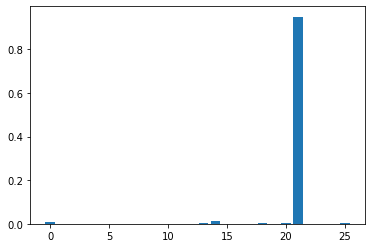

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CB20BEBFD0>]],
      dtype=object)

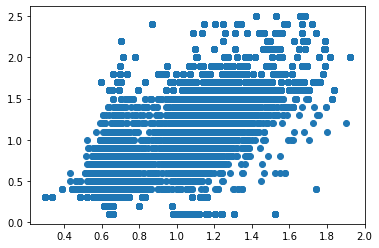

<Figure size 432x288 with 0 Axes>

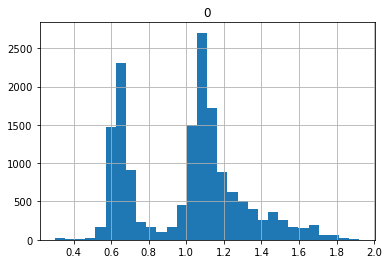

In [44]:
print("R2指数：",model.score(x_holdout_sum, y_holdout_sum))

importances = model.feature_importances_
for col,imp in zip(cols,importances):
    print("%r  with:   %r" % (col,imp))
plt.bar(range(len(cols)), importances)
plt.show()

plt.figure()
holdout_preds = model.predict(x_holdout_sum)
plt.scatter(holdout_preds,y_holdout_sum)

plt.figure()
holdout_preds = model.predict(x_holdout_sum)
temp = pandas.DataFrame(holdout_preds)
temp.hist(bins=30)

In [45]:
print("R2指数：",model.score(x_holdout_1, y_holdout_1))
print("R2指数：",model.score(x_holdout_2, y_holdout_2))
print("R2指数：",model.score(x_holdout_3, y_holdout_3))
print("R2指数：",model.score(x_holdout_4, y_holdout_4))
print("R2指数：",model.score(x_holdout_5, y_holdout_5))
print("R2指数：",model.score(x_holdout_6, y_holdout_6))
print("R2指数：",model.score(x_holdout_7, y_holdout_7))
print("R2指数：",model.score(x_holdout_8, y_holdout_8))
print("R2指数：",model.score(x_holdout_9, y_holdout_9))
print("R2指数：",model.score(x_holdout_10, y_holdout_10))

R2指数： 0.5017878764978299
R2指数： 0.501364202717333
R2指数： 0.5006241211724674
R2指数： 0.48034114900086267
R2指数： 0.5059346096942285
R2指数： 0.4900647277184381
R2指数： 0.49129774987423014
R2指数： 0.5003583407392546
R2指数： 0.4866093110578714
R2指数： 0.49740608192525626


# 实验6

In [95]:
df_1 = df_train.loc[(df["CREATININE "]<0.15)&(df["CREATININE "]>0.05)]
print(df_1.shape)
df_2 = df_train.loc[(df["CREATININE "]<0.25)&(df["CREATININE "]>0.15)]
print(df_2.shape)
df_3 = df_train.loc[(df["CREATININE "]<0.35)&(df["CREATININE "]>0.25)]
print(df_3.shape)
df_4 = df_train.loc[(df["CREATININE "]<0.45)&(df["CREATININE "]>0.35)]
df_4 = df_4.sample(5000)
print(df_4.shape)
df_5 = df_train.loc[(df["CREATININE "]<0.55)&(df["CREATININE "]>0.45)]
df_5 = df_5.sample(5000)
print(df_5.shape)
df_6 = df_train.loc[(df["CREATININE "]<0.65)&(df["CREATININE "]>0.55)]
df_6 = df_6.sample(5000)
print(df_6.shape)
df_7 = df_train.loc[(df["CREATININE "]<0.75)&(df["CREATININE "]>0.65)]
df_7 = df_7.sample(5000)
print(df_7.shape)
df_8 = df_train.loc[(df["CREATININE "]<0.85)&(df["CREATININE "]>0.75)]
df_8 = df_8.sample(5000)
print(df_8.shape)
df_9 = df_train.loc[(df["CREATININE "]<0.95)&(df["CREATININE "]>0.85)]
df_9 = df_9.sample(5000)
print(df_9.shape)
df_10 = df_train.loc[(df["CREATININE "]<1.05)&(df["CREATININE "]>0.95)]
df_10 = df_10.sample(5000)
print(df_10.shape)
df_11 = df_train.loc[(df["CREATININE "]<1.15)&(df["CREATININE "]>1.05)]
df_11 = df_11.sample(5000)
print(df_11.shape)
df_12 = df_train.loc[(df["CREATININE "]<1.25)&(df["CREATININE "]>1.15)]
df_12 = df_12.sample(5000)
print(df_12.shape)
df_13 = df_train.loc[(df["CREATININE "]<1.35)&(df["CREATININE "]>1.25)]
df_13 = df_13.sample(5000)
print(df_13.shape)
df_14 = df_train.loc[(df["CREATININE "]<1.45)&(df["CREATININE "]>1.35)]
df_14 = df_14.sample(5000)
print(df_14.shape)
df_15 = df_train.loc[(df["CREATININE "]<1.55)&(df["CREATININE "]>1.45)]
print(df_15.shape)
df_16 = df_train.loc[(df["CREATININE "]<1.65)&(df["CREATININE "]>1.55)]
print(df_16.shape)
df_17 = df_train.loc[(df["CREATININE "]<1.75)&(df["CREATININE "]>1.65)]
print(df_17.shape)
df_18 = df_train.loc[(df["CREATININE "]<1.85)&(df["CREATININE "]>1.75)]
print(df_18.shape)
df_19 = df_train.loc[(df["CREATININE "]<1.95)&(df["CREATININE "]>1.85)]
print(df_19.shape)
df_20 = df_train.loc[(df["CREATININE "]<2.05)&(df["CREATININE "]>1.95)]
print(df_20.shape)
df_21 = df_train.loc[(df["CREATININE "]<2.15)&(df["CREATININE "]>2.05)]
print(df_21.shape)
df_22 = df_train.loc[(df["CREATININE "]<2.25)&(df["CREATININE "]>2.15)]
print(df_22.shape)
df_23 = df_train.loc[(df["CREATININE "]<2.35)&(df["CREATININE "]>2.25)]
print(df_23.shape)
df_24 = df_train.loc[(df["CREATININE "]<2.45)&(df["CREATININE "]>2.35)]
print(df_24.shape)
df_25 = df_train.loc[(df["CREATININE "]<2.55)&(df["CREATININE "]>2.45)]
print(df_25.shape)

print("#####################################")

temp = pandas.concat([df_25,df_24,df_23,df_22,df_21,df_20,df_19,df_18,df_17,df_16,df_15,df_14,df_13,df_12,df_11,df_10,df_9,df_8,df_7,df_6,df_5,df_4,df_3,df_2,df_1])
temp = shuffle(temp)
print(temp.shape)

df_train = temp
print(df_train.shape)

print("#####################################")

y_train = df_train["CREATININE "].values
y_train = y_train.reshape(y_train.shape[0], 1)

cols = df_train.columns.values.tolist()
cols.remove("id")
cols.remove("sido")
cols.remove("CREATININE ")
cols.remove("GFR")
cols.remove("stage")
cols.remove("height")
cols.remove("weight")

x_train = df_train[cols].values

print(x_train.shape)
print(y_train.shape)

print("#####################################")

(395, 33)
(93, 33)
(549, 33)
(5000, 33)
(5000, 33)
(5000, 33)
(5000, 33)
(5000, 33)
(5000, 33)
(5000, 33)
(5000, 33)
(5000, 33)
(5000, 33)
(5000, 33)
(2224, 33)
(1160, 33)
(687, 33)
(523, 33)
(309, 33)
(235, 33)
(144, 33)
(137, 33)
(92, 33)
(96, 33)
(76, 33)
#####################################
(61720, 33)
(61720, 33)
#####################################
(61720, 26)
(61720, 1)
#####################################


In [48]:
model = xgboost.XGBRegressor(max_depth=10,
                           n_estimators=500, #55
                           learning_rate=0.05,
                           min_child_weight=100,
                           nthread=4,
                           subsample=1, #95
                           colsample_bytree=1, # 95
                           reg_alpha=0,
                           reg_lambda=0,
                           gamma=0,
                           objective=mse,  
                           base_score = mean_sales,
                           seed=10)

#开始训练 x_holdout,y_holdout
model.fit(x_train, y_train, verbose=1, eval_set=[(x_train, y_train),(x_holdout_sum, y_holdout_sum)],  eval_metric=func, early_stopping_rounds=10, )

###########
0 - 0.34 : 0.6366 (1037)
0.34 - 0.58 : 0.3927 (1e+04)
0.58 - 0.82 : 0.1479 (1.5e+04)
0.82 - 1.06 : 0.08923 (1e+04)
1.06 - 1.3 : 0.3339 (1.5e+04)
1.3 - 1.54 : 0.5606 (7224)
1.54 - 1.78 : 0.7627 (1847)
1.78 - 2.02 : 0.9949 (1067)
2.02 - 2.26 : 1.267 (281)
2.26 - 2.5 : 1.511 (264)
###########
###########
0 - 0.34 : 0.6296 (840)
0.34 - 0.58 : 0.3927 (2000)
0.58 - 0.82 : 0.148 (3000)
0.82 - 1.06 : 0.08915 (2000)
1.06 - 1.3 : 0.3339 (3000)
1.3 - 1.54 : 0.5797 (2000)
1.54 - 1.78 : 0.7657 (1710)
1.78 - 2.02 : 1.005 (870)
2.02 - 2.26 : 1.255 (220)
2.26 - 2.5 : 1.484 (280)
###########
[0]	validation_0-rmse:0.39804	validation_1-rmse:0.54038	validation_0-myFeval:0.32375	validation_1-myFeval:0.43801
Multiple eval metrics have been passed: 'validation_1-myFeval' will be used for early stopping.

Will train until validation_1-myFeval hasn't improved in 10 rounds.
###########
0 - 0.34 : 0.6358 (1037)
0.34 - 0.58 : 0.3835 (1e+04)
0.58 - 0.82 : 0.1436 (1.5e+04)
0.82 - 1.06 : 0.08156 (1e+04)


###########
0 - 0.34 : 0.6202 (840)
0.34 - 0.58 : 0.3117 (2000)
0.58 - 0.82 : 0.1279 (3000)
0.82 - 1.06 : 0.07961 (2000)
1.06 - 1.3 : 0.2224 (3000)
1.3 - 1.54 : 0.4305 (2000)
1.54 - 1.78 : 0.5712 (1710)
1.78 - 2.02 : 0.8121 (870)
2.02 - 2.26 : 0.9882 (220)
2.26 - 2.5 : 1.23 (280)
###########
[11]	validation_0-rmse:0.31510	validation_1-rmse:0.43688	validation_0-myFeval:0.24754	validation_1-myFeval:0.34301
###########
0 - 0.34 : 0.6265 (1037)
0.34 - 0.58 : 0.3064 (1e+04)
0.58 - 0.82 : 0.1265 (1.5e+04)
0.82 - 1.06 : 0.07832 (1e+04)
1.06 - 1.3 : 0.2149 (1.5e+04)
1.3 - 1.54 : 0.4036 (7224)
1.54 - 1.78 : 0.5669 (1847)
1.78 - 2.02 : 0.7662 (1067)
2.02 - 2.26 : 1.008 (281)
2.26 - 2.5 : 1.243 (264)
###########
###########
0 - 0.34 : 0.6194 (840)
0.34 - 0.58 : 0.3063 (2000)
0.58 - 0.82 : 0.1275 (3000)
0.82 - 1.06 : 0.08203 (2000)
1.06 - 1.3 : 0.2154 (3000)
1.3 - 1.54 : 0.4206 (2000)
1.54 - 1.78 : 0.5586 (1710)
1.78 - 2.02 : 0.7993 (870)
2.02 - 2.26 : 0.9714 (220)
2.26 - 2.5 : 1.214 (280)
#######

###########
0 - 0.34 : 0.6186 (1037)
0.34 - 0.58 : 0.2617 (1e+04)
0.58 - 0.82 : 0.1282 (1.5e+04)
0.82 - 1.06 : 0.111 (1e+04)
1.06 - 1.3 : 0.1624 (1.5e+04)
1.3 - 1.54 : 0.3238 (7224)
1.54 - 1.78 : 0.4644 (1847)
1.78 - 2.02 : 0.646 (1067)
2.02 - 2.26 : 0.8713 (281)
2.26 - 2.5 : 1.099 (264)
###########
###########
0 - 0.34 : 0.6129 (840)
0.34 - 0.58 : 0.2618 (2000)
0.58 - 0.82 : 0.1304 (3000)
0.82 - 1.06 : 0.1178 (2000)
1.06 - 1.3 : 0.1629 (3000)
1.3 - 1.54 : 0.3391 (2000)
1.54 - 1.78 : 0.4536 (1710)
1.78 - 2.02 : 0.693 (870)
2.02 - 2.26 : 0.8227 (220)
2.26 - 2.5 : 1.072 (280)
###########
[23]	validation_0-rmse:0.27888	validation_1-rmse:0.38723	validation_0-myFeval:0.21301	validation_1-myFeval:0.29472
###########
0 - 0.34 : 0.618 (1037)
0.34 - 0.58 : 0.2586 (1e+04)
0.58 - 0.82 : 0.129 (1.5e+04)
0.82 - 1.06 : 0.114 (1e+04)
1.06 - 1.3 : 0.1594 (1.5e+04)
1.3 - 1.54 : 0.3187 (7224)
1.54 - 1.78 : 0.4575 (1847)
1.78 - 2.02 : 0.6379 (1067)
2.02 - 2.26 : 0.8617 (281)
2.26 - 2.5 : 1.089 (264)
####

###########
0 - 0.34 : 0.6119 (1037)
0.34 - 0.58 : 0.2332 (1e+04)
0.58 - 0.82 : 0.1374 (1.5e+04)
0.82 - 1.06 : 0.1402 (1e+04)
1.06 - 1.3 : 0.1383 (1.5e+04)
1.3 - 1.54 : 0.2791 (7224)
1.54 - 1.78 : 0.3995 (1847)
1.78 - 2.02 : 0.5678 (1067)
2.02 - 2.26 : 0.7792 (281)
2.26 - 2.5 : 0.9998 (264)
###########
###########
0 - 0.34 : 0.6089 (840)
0.34 - 0.58 : 0.2344 (2000)
0.58 - 0.82 : 0.1408 (3000)
0.82 - 1.06 : 0.1485 (2000)
1.06 - 1.3 : 0.1392 (3000)
1.3 - 1.54 : 0.2926 (2000)
1.54 - 1.78 : 0.3885 (1710)
1.78 - 2.02 : 0.6247 (870)
2.02 - 2.26 : 0.7269 (220)
2.26 - 2.5 : 0.9846 (280)
###########
[35]	validation_0-rmse:0.26485	validation_1-rmse:0.36587	validation_0-myFeval:0.20006	validation_1-myFeval:0.27300
###########
0 - 0.34 : 0.6115 (1037)
0.34 - 0.58 : 0.2316 (1e+04)
0.58 - 0.82 : 0.138 (1.5e+04)
0.82 - 1.06 : 0.142 (1e+04)
1.06 - 1.3 : 0.1372 (1.5e+04)
1.3 - 1.54 : 0.2766 (7224)
1.54 - 1.78 : 0.3958 (1847)
1.78 - 2.02 : 0.563 (1067)
2.02 - 2.26 : 0.7733 (281)
2.26 - 2.5 : 0.9933 (264

###########
0 - 0.34 : 0.6061 (1037)
0.34 - 0.58 : 0.2169 (1e+04)
0.58 - 0.82 : 0.1428 (1.5e+04)
0.82 - 1.06 : 0.1561 (1e+04)
1.06 - 1.3 : 0.1288 (1.5e+04)
1.3 - 1.54 : 0.2572 (7224)
1.54 - 1.78 : 0.3636 (1847)
1.78 - 2.02 : 0.5208 (1067)
2.02 - 2.26 : 0.7246 (281)
2.26 - 2.5 : 0.9399 (264)
###########
###########
0 - 0.34 : 0.6053 (840)
0.34 - 0.58 : 0.2194 (2000)
0.58 - 0.82 : 0.1476 (3000)
0.82 - 1.06 : 0.1659 (2000)
1.06 - 1.3 : 0.1309 (3000)
1.3 - 1.54 : 0.271 (2000)
1.54 - 1.78 : 0.354 (1710)
1.78 - 2.02 : 0.5871 (870)
2.02 - 2.26 : 0.6715 (220)
2.26 - 2.5 : 0.9344 (280)
###########
[47]	validation_0-rmse:0.25848	validation_1-rmse:0.35605	validation_0-myFeval:0.19393	validation_1-myFeval:0.26270
###########
0 - 0.34 : 0.6056 (1037)
0.34 - 0.58 : 0.216 (1e+04)
0.58 - 0.82 : 0.1431 (1.5e+04)
0.82 - 1.06 : 0.1571 (1e+04)
1.06 - 1.3 : 0.1283 (1.5e+04)
1.3 - 1.54 : 0.256 (7224)
1.54 - 1.78 : 0.3615 (1847)
1.78 - 2.02 : 0.518 (1067)
2.02 - 2.26 : 0.7212 (281)
2.26 - 2.5 : 0.9355 (264)


###########
0 - 0.34 : 0.601 (1037)
0.34 - 0.58 : 0.2072 (1e+04)
0.58 - 0.82 : 0.146 (1.5e+04)
0.82 - 1.06 : 0.1644 (1e+04)
1.06 - 1.3 : 0.1246 (1.5e+04)
1.3 - 1.54 : 0.2465 (7224)
1.54 - 1.78 : 0.344 (1847)
1.78 - 2.02 : 0.4921 (1067)
2.02 - 2.26 : 0.6907 (281)
2.26 - 2.5 : 0.9008 (264)
###########
###########
0 - 0.34 : 0.6044 (840)
0.34 - 0.58 : 0.2111 (2000)
0.58 - 0.82 : 0.1518 (3000)
0.82 - 1.06 : 0.175 (2000)
1.06 - 1.3 : 0.1279 (3000)
1.3 - 1.54 : 0.2595 (2000)
1.54 - 1.78 : 0.3363 (1710)
1.78 - 2.02 : 0.5655 (870)
2.02 - 2.26 : 0.6417 (220)
2.26 - 2.5 : 0.9067 (280)
###########
[59]	validation_0-rmse:0.25504	validation_1-rmse:0.35136	validation_0-myFeval:0.19071	validation_1-myFeval:0.25754
###########
0 - 0.34 : 0.6008 (1037)
0.34 - 0.58 : 0.2066 (1e+04)
0.58 - 0.82 : 0.1462 (1.5e+04)
0.82 - 1.06 : 0.1649 (1e+04)
1.06 - 1.3 : 0.1244 (1.5e+04)
1.3 - 1.54 : 0.2459 (7224)
1.54 - 1.78 : 0.343 (1847)
1.78 - 2.02 : 0.4906 (1067)
2.02 - 2.26 : 0.6886 (281)
2.26 - 2.5 : 0.8987 (264)


###########
0 - 0.34 : 0.5972 (1037)
0.34 - 0.58 : 0.2014 (1e+04)
0.58 - 0.82 : 0.1479 (1.5e+04)
0.82 - 1.06 : 0.1686 (1e+04)
1.06 - 1.3 : 0.1226 (1.5e+04)
1.3 - 1.54 : 0.241 (7224)
1.54 - 1.78 : 0.3339 (1847)
1.78 - 2.02 : 0.4757 (1067)
2.02 - 2.26 : 0.6705 (281)
2.26 - 2.5 : 0.8768 (264)
###########
###########
0 - 0.34 : 0.6034 (840)
0.34 - 0.58 : 0.2066 (2000)
0.58 - 0.82 : 0.1545 (3000)
0.82 - 1.06 : 0.1801 (2000)
1.06 - 1.3 : 0.1267 (3000)
1.3 - 1.54 : 0.2544 (2000)
1.54 - 1.78 : 0.3276 (1710)
1.78 - 2.02 : 0.5531 (870)
2.02 - 2.26 : 0.626 (220)
2.26 - 2.5 : 0.892 (280)
###########
[71]	validation_0-rmse:0.25308	validation_1-rmse:0.34902	validation_0-myFeval:0.18896	validation_1-myFeval:0.25512
###########
0 - 0.34 : 0.5969 (1037)
0.34 - 0.58 : 0.2011 (1e+04)
0.58 - 0.82 : 0.148 (1.5e+04)
0.82 - 1.06 : 0.1688 (1e+04)
1.06 - 1.3 : 0.1225 (1.5e+04)
1.3 - 1.54 : 0.2406 (7224)
1.54 - 1.78 : 0.3333 (1847)
1.78 - 2.02 : 0.4747 (1067)
2.02 - 2.26 : 0.6691 (281)
2.26 - 2.5 : 0.8752 (264)

###########
0 - 0.34 : 0.5928 (1037)
0.34 - 0.58 : 0.1976 (1e+04)
0.58 - 0.82 : 0.1485 (1.5e+04)
0.82 - 1.06 : 0.1703 (1e+04)
1.06 - 1.3 : 0.1216 (1.5e+04)
1.3 - 1.54 : 0.2373 (7224)
1.54 - 1.78 : 0.3271 (1847)
1.78 - 2.02 : 0.4645 (1067)
2.02 - 2.26 : 0.6552 (281)
2.26 - 2.5 : 0.8582 (264)
###########
###########
0 - 0.34 : 0.6024 (840)
0.34 - 0.58 : 0.2042 (2000)
0.58 - 0.82 : 0.156 (3000)
0.82 - 1.06 : 0.1824 (2000)
1.06 - 1.3 : 0.1263 (3000)
1.3 - 1.54 : 0.2516 (2000)
1.54 - 1.78 : 0.3234 (1710)
1.78 - 2.02 : 0.5454 (870)
2.02 - 2.26 : 0.6162 (220)
2.26 - 2.5 : 0.8826 (280)
###########
[83]	validation_0-rmse:0.25119	validation_1-rmse:0.34763	validation_0-myFeval:0.18746	validation_1-myFeval:0.25373
###########
0 - 0.34 : 0.5925 (1037)
0.34 - 0.58 : 0.1974 (1e+04)
0.58 - 0.82 : 0.1486 (1.5e+04)
0.82 - 1.06 : 0.1703 (1e+04)
1.06 - 1.3 : 0.1215 (1.5e+04)
1.3 - 1.54 : 0.2371 (7224)
1.54 - 1.78 : 0.3267 (1847)
1.78 - 2.02 : 0.4639 (1067)
2.02 - 2.26 : 0.6539 (281)
2.26 - 2.5 : 0.8569 (2

###########
0 - 0.34 : 0.5898 (1037)
0.34 - 0.58 : 0.1956 (1e+04)
0.58 - 0.82 : 0.1487 (1.5e+04)
0.82 - 1.06 : 0.1707 (1e+04)
1.06 - 1.3 : 0.1211 (1.5e+04)
1.3 - 1.54 : 0.2356 (7224)
1.54 - 1.78 : 0.3234 (1847)
1.78 - 2.02 : 0.4578 (1067)
2.02 - 2.26 : 0.6452 (281)
2.26 - 2.5 : 0.8459 (264)
###########
###########
0 - 0.34 : 0.6011 (840)
0.34 - 0.58 : 0.2029 (2000)
0.58 - 0.82 : 0.1567 (3000)
0.82 - 1.06 : 0.1833 (2000)
1.06 - 1.3 : 0.1264 (3000)
1.3 - 1.54 : 0.2504 (2000)
1.54 - 1.78 : 0.3228 (1710)
1.78 - 2.02 : 0.5412 (870)
2.02 - 2.26 : 0.61 (220)
2.26 - 2.5 : 0.8791 (280)
###########
[95]	validation_0-rmse:0.24992	validation_1-rmse:0.34701	validation_0-myFeval:0.18653	validation_1-myFeval:0.25319
###########
0 - 0.34 : 0.5894 (1037)
0.34 - 0.58 : 0.1954 (1e+04)
0.58 - 0.82 : 0.1487 (1.5e+04)
0.82 - 1.06 : 0.1706 (1e+04)
1.06 - 1.3 : 0.121 (1.5e+04)
1.3 - 1.54 : 0.2355 (7224)
1.54 - 1.78 : 0.3233 (1847)
1.78 - 2.02 : 0.4572 (1067)
2.02 - 2.26 : 0.6442 (281)
2.26 - 2.5 : 0.8449 (264

###########
0 - 0.34 : 0.5873 (1037)
0.34 - 0.58 : 0.1943 (1e+04)
0.58 - 0.82 : 0.1487 (1.5e+04)
0.82 - 1.06 : 0.1706 (1e+04)
1.06 - 1.3 : 0.1206 (1.5e+04)
1.3 - 1.54 : 0.2344 (7224)
1.54 - 1.78 : 0.3213 (1847)
1.78 - 2.02 : 0.4533 (1067)
2.02 - 2.26 : 0.6379 (281)
2.26 - 2.5 : 0.8374 (264)
###########
###########
0 - 0.34 : 0.5999 (840)
0.34 - 0.58 : 0.2024 (2000)
0.58 - 0.82 : 0.1573 (3000)
0.82 - 1.06 : 0.1837 (2000)
1.06 - 1.3 : 0.1264 (3000)
1.3 - 1.54 : 0.2501 (2000)
1.54 - 1.78 : 0.3231 (1710)
1.78 - 2.02 : 0.5385 (870)
2.02 - 2.26 : 0.6066 (220)
2.26 - 2.5 : 0.8744 (280)
###########
[107]	validation_0-rmse:0.24894	validation_1-rmse:0.34660	validation_0-myFeval:0.18583	validation_1-myFeval:0.25294
###########
0 - 0.34 : 0.5868 (1037)
0.34 - 0.58 : 0.1941 (1e+04)
0.58 - 0.82 : 0.1487 (1.5e+04)
0.82 - 1.06 : 0.1706 (1e+04)
1.06 - 1.3 : 0.1206 (1.5e+04)
1.3 - 1.54 : 0.2342 (7224)
1.54 - 1.78 : 0.3211 (1847)
1.78 - 2.02 : 0.4529 (1067)
2.02 - 2.26 : 0.6374 (281)
2.26 - 2.5 : 0.8367 

###########
0 - 0.34 : 0.5854 (1037)
0.34 - 0.58 : 0.1934 (1e+04)
0.58 - 0.82 : 0.1486 (1.5e+04)
0.82 - 1.06 : 0.1704 (1e+04)
1.06 - 1.3 : 0.1204 (1.5e+04)
1.3 - 1.54 : 0.2335 (7224)
1.54 - 1.78 : 0.3197 (1847)
1.78 - 2.02 : 0.45 (1067)
2.02 - 2.26 : 0.632 (281)
2.26 - 2.5 : 0.8302 (264)
###########
###########
0 - 0.34 : 0.5995 (840)
0.34 - 0.58 : 0.202 (2000)
0.58 - 0.82 : 0.1575 (3000)
0.82 - 1.06 : 0.1837 (2000)
1.06 - 1.3 : 0.1266 (3000)
1.3 - 1.54 : 0.2499 (2000)
1.54 - 1.78 : 0.3228 (1710)
1.78 - 2.02 : 0.5376 (870)
2.02 - 2.26 : 0.6052 (220)
2.26 - 2.5 : 0.8727 (280)
###########
[119]	validation_0-rmse:0.24811	validation_1-rmse:0.34638	validation_0-myFeval:0.18525	validation_1-myFeval:0.25279
###########
0 - 0.34 : 0.5851 (1037)
0.34 - 0.58 : 0.1933 (1e+04)
0.58 - 0.82 : 0.1486 (1.5e+04)
0.82 - 1.06 : 0.1703 (1e+04)
1.06 - 1.3 : 0.1204 (1.5e+04)
1.3 - 1.54 : 0.2334 (7224)
1.54 - 1.78 : 0.3196 (1847)
1.78 - 2.02 : 0.4497 (1067)
2.02 - 2.26 : 0.6315 (281)
2.26 - 2.5 : 0.8297 (264

###########
0 - 0.34 : 0.5819 (1037)
0.34 - 0.58 : 0.1919 (1e+04)
0.58 - 0.82 : 0.1482 (1.5e+04)
0.82 - 1.06 : 0.1698 (1e+04)
1.06 - 1.3 : 0.12 (1.5e+04)
1.3 - 1.54 : 0.2324 (7224)
1.54 - 1.78 : 0.3177 (1847)
1.78 - 2.02 : 0.4458 (1067)
2.02 - 2.26 : 0.6254 (281)
2.26 - 2.5 : 0.8219 (264)
###########
###########
0 - 0.34 : 0.5986 (840)
0.34 - 0.58 : 0.2014 (2000)
0.58 - 0.82 : 0.1575 (3000)
0.82 - 1.06 : 0.1839 (2000)
1.06 - 1.3 : 0.127 (3000)
1.3 - 1.54 : 0.2497 (2000)
1.54 - 1.78 : 0.3217 (1710)
1.78 - 2.02 : 0.5356 (870)
2.02 - 2.26 : 0.6011 (220)
2.26 - 2.5 : 0.8707 (280)
###########
[131]	validation_0-rmse:0.24686	validation_1-rmse:0.34595	validation_0-myFeval:0.18433	validation_1-myFeval:0.25242
###########
0 - 0.34 : 0.5816 (1037)
0.34 - 0.58 : 0.1917 (1e+04)
0.58 - 0.82 : 0.1482 (1.5e+04)
0.82 - 1.06 : 0.1698 (1e+04)
1.06 - 1.3 : 0.1199 (1.5e+04)
1.3 - 1.54 : 0.2322 (7224)
1.54 - 1.78 : 0.3174 (1847)
1.78 - 2.02 : 0.4453 (1067)
2.02 - 2.26 : 0.6245 (281)
2.26 - 2.5 : 0.8208 (26

###########
0 - 0.34 : 0.579 (1037)
0.34 - 0.58 : 0.191 (1e+04)
0.58 - 0.82 : 0.1478 (1.5e+04)
0.82 - 1.06 : 0.1691 (1e+04)
1.06 - 1.3 : 0.1197 (1.5e+04)
1.3 - 1.54 : 0.2312 (7224)
1.54 - 1.78 : 0.3156 (1847)
1.78 - 2.02 : 0.4422 (1067)
2.02 - 2.26 : 0.6193 (281)
2.26 - 2.5 : 0.8149 (264)
###########
###########
0 - 0.34 : 0.5985 (840)
0.34 - 0.58 : 0.201 (2000)
0.58 - 0.82 : 0.1577 (3000)
0.82 - 1.06 : 0.1837 (2000)
1.06 - 1.3 : 0.1273 (3000)
1.3 - 1.54 : 0.2495 (2000)
1.54 - 1.78 : 0.3208 (1710)
1.78 - 2.02 : 0.5354 (870)
2.02 - 2.26 : 0.6001 (220)
2.26 - 2.5 : 0.8687 (280)
###########
[143]	validation_0-rmse:0.24570	validation_1-rmse:0.34582	validation_0-myFeval:0.18352	validation_1-myFeval:0.25226
###########
0 - 0.34 : 0.5786 (1037)
0.34 - 0.58 : 0.1907 (1e+04)
0.58 - 0.82 : 0.1477 (1.5e+04)
0.82 - 1.06 : 0.1691 (1e+04)
1.06 - 1.3 : 0.1196 (1.5e+04)
1.3 - 1.54 : 0.2311 (7224)
1.54 - 1.78 : 0.3153 (1847)
1.78 - 2.02 : 0.4416 (1067)
2.02 - 2.26 : 0.6183 (281)
2.26 - 2.5 : 0.813 (264

###########
0 - 0.34 : 0.5762 (1037)
0.34 - 0.58 : 0.1899 (1e+04)
0.58 - 0.82 : 0.1474 (1.5e+04)
0.82 - 1.06 : 0.1686 (1e+04)
1.06 - 1.3 : 0.1195 (1.5e+04)
1.3 - 1.54 : 0.2302 (7224)
1.54 - 1.78 : 0.3139 (1847)
1.78 - 2.02 : 0.4391 (1067)
2.02 - 2.26 : 0.6144 (281)
2.26 - 2.5 : 0.8077 (264)
###########
###########
0 - 0.34 : 0.5978 (840)
0.34 - 0.58 : 0.2006 (2000)
0.58 - 0.82 : 0.1579 (3000)
0.82 - 1.06 : 0.1837 (2000)
1.06 - 1.3 : 0.1276 (3000)
1.3 - 1.54 : 0.2495 (2000)
1.54 - 1.78 : 0.321 (1710)
1.78 - 2.02 : 0.534 (870)
2.02 - 2.26 : 0.6 (220)
2.26 - 2.5 : 0.8683 (280)
###########
[155]	validation_0-rmse:0.24469	validation_1-rmse:0.34567	validation_0-myFeval:0.18282	validation_1-myFeval:0.25220
###########
0 - 0.34 : 0.5757 (1037)
0.34 - 0.58 : 0.1897 (1e+04)
0.58 - 0.82 : 0.1474 (1.5e+04)
0.82 - 1.06 : 0.1685 (1e+04)
1.06 - 1.3 : 0.1194 (1.5e+04)
1.3 - 1.54 : 0.2301 (7224)
1.54 - 1.78 : 0.3136 (1847)
1.78 - 2.02 : 0.4386 (1067)
2.02 - 2.26 : 0.6135 (281)
2.26 - 2.5 : 0.8068 (264)

###########
0 - 0.34 : 0.5738 (1037)
0.34 - 0.58 : 0.189 (1e+04)
0.58 - 0.82 : 0.1471 (1.5e+04)
0.82 - 1.06 : 0.1681 (1e+04)
1.06 - 1.3 : 0.1192 (1.5e+04)
1.3 - 1.54 : 0.2294 (7224)
1.54 - 1.78 : 0.3126 (1847)
1.78 - 2.02 : 0.4365 (1067)
2.02 - 2.26 : 0.6095 (281)
2.26 - 2.5 : 0.802 (264)
###########
###########
0 - 0.34 : 0.5979 (840)
0.34 - 0.58 : 0.2007 (2000)
0.58 - 0.82 : 0.158 (3000)
0.82 - 1.06 : 0.1836 (2000)
1.06 - 1.3 : 0.1278 (3000)
1.3 - 1.54 : 0.2497 (2000)
1.54 - 1.78 : 0.3209 (1710)
1.78 - 2.02 : 0.5325 (870)
2.02 - 2.26 : 0.597 (220)
2.26 - 2.5 : 0.8686 (280)
###########
[167]	validation_0-rmse:0.24380	validation_1-rmse:0.34561	validation_0-myFeval:0.18220	validation_1-myFeval:0.25216
###########
0 - 0.34 : 0.5735 (1037)
0.34 - 0.58 : 0.189 (1e+04)
0.58 - 0.82 : 0.1471 (1.5e+04)
0.82 - 1.06 : 0.1681 (1e+04)
1.06 - 1.3 : 0.1192 (1.5e+04)
1.3 - 1.54 : 0.2294 (7224)
1.54 - 1.78 : 0.3124 (1847)
1.78 - 2.02 : 0.4361 (1067)
2.02 - 2.26 : 0.6089 (281)
2.26 - 2.5 : 0.8012 (264)

###########
0 - 0.34 : 0.572 (1037)
0.34 - 0.58 : 0.1885 (1e+04)
0.58 - 0.82 : 0.1468 (1.5e+04)
0.82 - 1.06 : 0.1677 (1e+04)
1.06 - 1.3 : 0.1191 (1.5e+04)
1.3 - 1.54 : 0.2288 (7224)
1.54 - 1.78 : 0.3115 (1847)
1.78 - 2.02 : 0.4344 (1067)
2.02 - 2.26 : 0.6056 (281)
2.26 - 2.5 : 0.797 (264)
###########
###########
0 - 0.34 : 0.5972 (840)
0.34 - 0.58 : 0.2006 (2000)
0.58 - 0.82 : 0.1581 (3000)
0.82 - 1.06 : 0.1837 (2000)
1.06 - 1.3 : 0.1279 (3000)
1.3 - 1.54 : 0.2496 (2000)
1.54 - 1.78 : 0.3207 (1710)
1.78 - 2.02 : 0.5315 (870)
2.02 - 2.26 : 0.5977 (220)
2.26 - 2.5 : 0.868 (280)
###########
[179]	validation_0-rmse:0.24310	validation_1-rmse:0.34556	validation_0-myFeval:0.18173	validation_1-myFeval:0.25206
###########
0 - 0.34 : 0.572 (1037)
0.34 - 0.58 : 0.1885 (1e+04)
0.58 - 0.82 : 0.1468 (1.5e+04)
0.82 - 1.06 : 0.1677 (1e+04)
1.06 - 1.3 : 0.1191 (1.5e+04)
1.3 - 1.54 : 0.2288 (7224)
1.54 - 1.78 : 0.3115 (1847)
1.78 - 2.02 : 0.4344 (1067)
2.02 - 2.26 : 0.6056 (281)
2.26 - 2.5 : 0.7969 (264

###########
0 - 0.34 : 0.5708 (1037)
0.34 - 0.58 : 0.1881 (1e+04)
0.58 - 0.82 : 0.1467 (1.5e+04)
0.82 - 1.06 : 0.1675 (1e+04)
1.06 - 1.3 : 0.119 (1.5e+04)
1.3 - 1.54 : 0.2285 (7224)
1.54 - 1.78 : 0.3109 (1847)
1.78 - 2.02 : 0.4331 (1067)
2.02 - 2.26 : 0.6031 (281)
2.26 - 2.5 : 0.7931 (264)
###########
###########
0 - 0.34 : 0.5974 (840)
0.34 - 0.58 : 0.2005 (2000)
0.58 - 0.82 : 0.1581 (3000)
0.82 - 1.06 : 0.1837 (2000)
1.06 - 1.3 : 0.1279 (3000)
1.3 - 1.54 : 0.2497 (2000)
1.54 - 1.78 : 0.3207 (1710)
1.78 - 2.02 : 0.5305 (870)
2.02 - 2.26 : 0.5976 (220)
2.26 - 2.5 : 0.8683 (280)
###########
[191]	validation_0-rmse:0.24269	validation_1-rmse:0.34552	validation_0-myFeval:0.18145	validation_1-myFeval:0.25203
###########
0 - 0.34 : 0.5707 (1037)
0.34 - 0.58 : 0.188 (1e+04)
0.58 - 0.82 : 0.1467 (1.5e+04)
0.82 - 1.06 : 0.1675 (1e+04)
1.06 - 1.3 : 0.119 (1.5e+04)
1.3 - 1.54 : 0.2285 (7224)
1.54 - 1.78 : 0.3108 (1847)
1.78 - 2.02 : 0.4329 (1067)
2.02 - 2.26 : 0.6029 (281)
2.26 - 2.5 : 0.7927 (26

###########
0 - 0.34 : 0.5682 (1037)
0.34 - 0.58 : 0.1871 (1e+04)
0.58 - 0.82 : 0.1463 (1.5e+04)
0.82 - 1.06 : 0.167 (1e+04)
1.06 - 1.3 : 0.1186 (1.5e+04)
1.3 - 1.54 : 0.2275 (7224)
1.54 - 1.78 : 0.3093 (1847)
1.78 - 2.02 : 0.4302 (1067)
2.02 - 2.26 : 0.5982 (281)
2.26 - 2.5 : 0.7864 (264)
###########
###########
0 - 0.34 : 0.5969 (840)
0.34 - 0.58 : 0.2002 (2000)
0.58 - 0.82 : 0.1582 (3000)
0.82 - 1.06 : 0.1837 (2000)
1.06 - 1.3 : 0.1281 (3000)
1.3 - 1.54 : 0.2496 (2000)
1.54 - 1.78 : 0.3207 (1710)
1.78 - 2.02 : 0.5289 (870)
2.02 - 2.26 : 0.5984 (220)
2.26 - 2.5 : 0.8668 (280)
###########
[203]	validation_0-rmse:0.24165	validation_1-rmse:0.34536	validation_0-myFeval:0.18071	validation_1-myFeval:0.25189
###########
0 - 0.34 : 0.5681 (1037)
0.34 - 0.58 : 0.187 (1e+04)
0.58 - 0.82 : 0.1463 (1.5e+04)
0.82 - 1.06 : 0.167 (1e+04)
1.06 - 1.3 : 0.1186 (1.5e+04)
1.3 - 1.54 : 0.2274 (7224)
1.54 - 1.78 : 0.3093 (1847)
1.78 - 2.02 : 0.4301 (1067)
2.02 - 2.26 : 0.598 (281)
2.26 - 2.5 : 0.786 (264)

###########
0 - 0.34 : 0.5673 (1037)
0.34 - 0.58 : 0.1867 (1e+04)
0.58 - 0.82 : 0.1462 (1.5e+04)
0.82 - 1.06 : 0.1668 (1e+04)
1.06 - 1.3 : 0.1185 (1.5e+04)
1.3 - 1.54 : 0.2271 (7224)
1.54 - 1.78 : 0.3088 (1847)
1.78 - 2.02 : 0.4293 (1067)
2.02 - 2.26 : 0.5965 (281)
2.26 - 2.5 : 0.7839 (264)
###########
###########
0 - 0.34 : 0.5967 (840)
0.34 - 0.58 : 0.2001 (2000)
0.58 - 0.82 : 0.1583 (3000)
0.82 - 1.06 : 0.1837 (2000)
1.06 - 1.3 : 0.1281 (3000)
1.3 - 1.54 : 0.2496 (2000)
1.54 - 1.78 : 0.3209 (1710)
1.78 - 2.02 : 0.5281 (870)
2.02 - 2.26 : 0.5981 (220)
2.26 - 2.5 : 0.8664 (280)
###########
[215]	validation_0-rmse:0.24130	validation_1-rmse:0.34530	validation_0-myFeval:0.18046	validation_1-myFeval:0.25185
###########
0 - 0.34 : 0.5672 (1037)
0.34 - 0.58 : 0.1867 (1e+04)
0.58 - 0.82 : 0.1461 (1.5e+04)
0.82 - 1.06 : 0.1667 (1e+04)
1.06 - 1.3 : 0.1185 (1.5e+04)
1.3 - 1.54 : 0.2271 (7224)
1.54 - 1.78 : 0.3087 (1847)
1.78 - 2.02 : 0.4292 (1067)
2.02 - 2.26 : 0.5964 (281)
2.26 - 2.5 : 0.7837 

###########
0 - 0.34 : 0.5649 (1037)
0.34 - 0.58 : 0.186 (1e+04)
0.58 - 0.82 : 0.1458 (1.5e+04)
0.82 - 1.06 : 0.1662 (1e+04)
1.06 - 1.3 : 0.1182 (1.5e+04)
1.3 - 1.54 : 0.2263 (7224)
1.54 - 1.78 : 0.3076 (1847)
1.78 - 2.02 : 0.4274 (1067)
2.02 - 2.26 : 0.5931 (281)
2.26 - 2.5 : 0.779 (264)
###########
###########
0 - 0.34 : 0.5963 (840)
0.34 - 0.58 : 0.2 (2000)
0.58 - 0.82 : 0.1583 (3000)
0.82 - 1.06 : 0.1836 (2000)
1.06 - 1.3 : 0.1282 (3000)
1.3 - 1.54 : 0.2498 (2000)
1.54 - 1.78 : 0.3215 (1710)
1.78 - 2.02 : 0.5289 (870)
2.02 - 2.26 : 0.5985 (220)
2.26 - 2.5 : 0.8675 (280)
###########
[227]	validation_0-rmse:0.24042	validation_1-rmse:0.34555	validation_0-myFeval:0.17983	validation_1-myFeval:0.25200
###########
0 - 0.34 : 0.5648 (1037)
0.34 - 0.58 : 0.1859 (1e+04)
0.58 - 0.82 : 0.1458 (1.5e+04)
0.82 - 1.06 : 0.1662 (1e+04)
1.06 - 1.3 : 0.1182 (1.5e+04)
1.3 - 1.54 : 0.2263 (7224)
1.54 - 1.78 : 0.3075 (1847)
1.78 - 2.02 : 0.4274 (1067)
2.02 - 2.26 : 0.5929 (281)
2.26 - 2.5 : 0.779 (264)


XGBRegressor(base_score=0.8524442689311917, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=10, min_child_weight=100, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4, nthread=4,
             num_parallel_tree=1,
             objective=<function mse at 0x00000203123C3950>, random_state=10,
             reg_alpha=0, reg_lambda=0, scale_pos_weight=1, seed=10,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [49]:
pickle.dump(model, open("models\model_5000.pickle.dat", "wb"))

In [46]:
model = pickle.load(open("models\model_5000.pickle.dat", "rb"))

R2指数： 0.5303516398707051
'age'  with:   0.014537058
'waist'  with:   0.0017613083
'vision_left'  with:   0.0013355883
'vision_right'  with:   0.0016704722
'listen_left'  with:   0.0013866482
'listen_right'  with:   0.0014835966
'BP_HIGH '  with:   0.0012968282
'BP_LWST '  with:   0.0012723601
'BLDS'  with:   0.0016619607
'TOT_CHOLE '  with:   0.0013648353
'TRIGLYCERIDE'  with:   0.0018984464
'HDL_CHOLE '  with:   0.001949199
'LDL_CHOLE '  with:   0.0014531394
'HMG '  with:   0.009316799
'OLIG_PROTE_CD'  with:   0.018768206
'SGOT_AST '  with:   0.0014725269
'SGPT_ALT '  with:   0.0015556181
'GAMMA_GTP '  with:   0.0015459042
'DRINK_OR_NOT'  with:   0.0022524209
'MOUTH_CHECK'  with:   0.00137028
'BMI'  with:   0.0023557127
'sex_1'  with:   0.92362875
'sex_2'  with:   0.0
'SMK_STAT_TYPE_RSPS_CD_1.0'  with:   0.0012068716
'SMK_STAT_TYPE_RSPS_CD_2.0'  with:   0.0012780189
'SMK_STAT_TYPE_RSPS_CD_3.0'  with:   0.0021774592


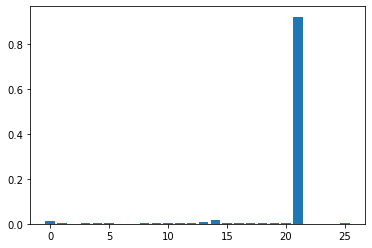

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CB1F0086D8>]],
      dtype=object)

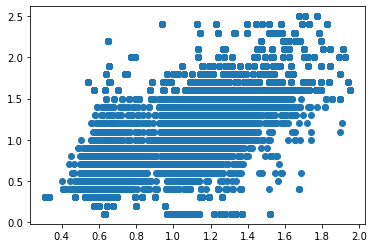

<Figure size 432x288 with 0 Axes>

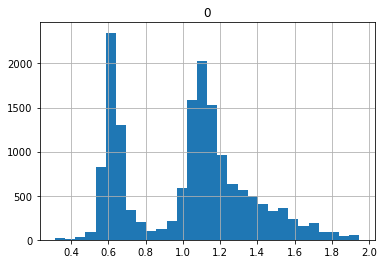

In [47]:
print("R2指数：",model.score(x_holdout_sum, y_holdout_sum))

importances = model.feature_importances_
for col,imp in zip(cols,importances):
    print("%r  with:   %r" % (col,imp))
plt.bar(range(len(cols)), importances)
plt.show()

plt.figure()
holdout_preds = model.predict(x_holdout_sum)
plt.scatter(holdout_preds,y_holdout_sum)

plt.figure()
holdout_preds = model.predict(x_holdout_sum)
temp = pandas.DataFrame(holdout_preds)
temp.hist(bins=30)

In [48]:
print("R2指数：",model.score(x_holdout_1, y_holdout_1))
print("R2指数：",model.score(x_holdout_2, y_holdout_2))
print("R2指数：",model.score(x_holdout_3, y_holdout_3))
print("R2指数：",model.score(x_holdout_4, y_holdout_4))
print("R2指数：",model.score(x_holdout_5, y_holdout_5))
print("R2指数：",model.score(x_holdout_6, y_holdout_6))
print("R2指数：",model.score(x_holdout_7, y_holdout_7))
print("R2指数：",model.score(x_holdout_8, y_holdout_8))
print("R2指数：",model.score(x_holdout_9, y_holdout_9))
print("R2指数：",model.score(x_holdout_10, y_holdout_10))

R2指数： 0.5364375827298098
R2指数： 0.5363486366118391
R2指数： 0.5368026965066741
R2指数： 0.5141326464531215
R2指数： 0.5416516711769379
R2指数： 0.5252735655215404
R2指数： 0.5237008796870195
R2指数： 0.5360192602460518
R2指数： 0.5185616325886042
R2指数： 0.5345878271854521


# 实验7

In [85]:
df_1 = df_train.loc[(df["CREATININE "]<0.15)&(df["CREATININE "]>0.05)]
print(df_1.shape)
df_2 = df_train.loc[(df["CREATININE "]<0.25)&(df["CREATININE "]>0.15)]
print(df_2.shape)
df_3 = df_train.loc[(df["CREATININE "]<0.35)&(df["CREATININE "]>0.25)]
print(df_3.shape)
df_4 = df_train.loc[(df["CREATININE "]<0.45)&(df["CREATININE "]>0.35)]
df_4 = df_4.sample(2500)
print(df_4.shape)
df_5 = df_train.loc[(df["CREATININE "]<0.55)&(df["CREATININE "]>0.45)]
df_5 = df_5.sample(2500)
print(df_5.shape)
df_6 = df_train.loc[(df["CREATININE "]<0.65)&(df["CREATININE "]>0.55)]
df_6 = df_6.sample(2500)
print(df_6.shape)
df_7 = df_train.loc[(df["CREATININE "]<0.75)&(df["CREATININE "]>0.65)]
df_7 = df_7.sample(2500)
print(df_7.shape)
df_8 = df_train.loc[(df["CREATININE "]<0.85)&(df["CREATININE "]>0.75)]
df_8 = df_8.sample(2500)
print(df_8.shape)
df_9 = df_train.loc[(df["CREATININE "]<0.95)&(df["CREATININE "]>0.85)]
df_9 = df_9.sample(2500)
print(df_9.shape)
df_10 = df_train.loc[(df["CREATININE "]<1.05)&(df["CREATININE "]>0.95)]
df_10 = df_10.sample(2500)
print(df_10.shape)
df_11 = df_train.loc[(df["CREATININE "]<1.15)&(df["CREATININE "]>1.05)]
df_11 = df_11.sample(2500)
print(df_11.shape)
df_12 = df_train.loc[(df["CREATININE "]<1.25)&(df["CREATININE "]>1.15)]
df_12 = df_12.sample(2500)
print(df_12.shape)
df_13 = df_train.loc[(df["CREATININE "]<1.35)&(df["CREATININE "]>1.25)]
df_13 = df_13.sample(2500)
print(df_13.shape)
df_14 = df_train.loc[(df["CREATININE "]<1.45)&(df["CREATININE "]>1.35)]
df_14 = df_14.sample(2500)
print(df_14.shape)
df_15 = df_train.loc[(df["CREATININE "]<1.55)&(df["CREATININE "]>1.45)]
print(df_15.shape)
df_16 = df_train.loc[(df["CREATININE "]<1.65)&(df["CREATININE "]>1.55)]
print(df_16.shape)
df_17 = df_train.loc[(df["CREATININE "]<1.75)&(df["CREATININE "]>1.65)]
print(df_17.shape)
df_18 = df_train.loc[(df["CREATININE "]<1.85)&(df["CREATININE "]>1.75)]
print(df_18.shape)
df_19 = df_train.loc[(df["CREATININE "]<1.95)&(df["CREATININE "]>1.85)]
print(df_19.shape)
df_20 = df_train.loc[(df["CREATININE "]<2.05)&(df["CREATININE "]>1.95)]
print(df_20.shape)
df_21 = df_train.loc[(df["CREATININE "]<2.15)&(df["CREATININE "]>2.05)]
print(df_21.shape)
df_22 = df_train.loc[(df["CREATININE "]<2.25)&(df["CREATININE "]>2.15)]
print(df_22.shape)
df_23 = df_train.loc[(df["CREATININE "]<2.35)&(df["CREATININE "]>2.25)]
print(df_23.shape)
df_24 = df_train.loc[(df["CREATININE "]<2.45)&(df["CREATININE "]>2.35)]
print(df_24.shape)
df_25 = df_train.loc[(df["CREATININE "]<2.55)&(df["CREATININE "]>2.45)]
print(df_25.shape)

print("#####################################")

temp = pandas.concat([df_25,df_24,df_23,df_22,df_21,df_20,df_19,df_18,df_17,df_16,df_15,df_14,df_13,df_12,df_11,df_10,df_9,df_8,df_7,df_6,df_5,df_4,df_3,df_2,df_1])
temp = shuffle(temp)
print(temp.shape)

df_train = temp
print(df_train.shape)

print("#####################################")

y_train = df_train["CREATININE "].values
y_train_stage = df_train["stage"]
print("y_train_stage: ", y_train_stage.shape)
y_train = y_train.reshape(y_train.shape[0], 1)

cols = df_train.columns.values.tolist()
cols.remove("id")
cols.remove("sido")
cols.remove("CREATININE ")
cols.remove("GFR")
cols.remove("stage")
cols.remove("height")
cols.remove("weight")

x_train = df_train[cols].values

print(x_train.shape)
print(y_train.shape)

print("#####################################")

(395, 33)
(93, 33)
(549, 33)
(2500, 33)
(2500, 33)
(2500, 33)
(2500, 33)
(2500, 33)
(2500, 33)
(2500, 33)
(2500, 33)
(2500, 33)
(2500, 33)
(2500, 33)
(2224, 33)
(1160, 33)
(687, 33)
(523, 33)
(309, 33)
(235, 33)
(144, 33)
(137, 33)
(92, 33)
(96, 33)
(76, 33)
#####################################
(34220, 33)
(34220, 33)
#####################################
y_train_stage:  (34220,)
(34220, 26)
(34220, 1)
#####################################


In [525]:
model = xgboost.XGBRegressor(max_depth=10,
                           n_estimators=500, #55
                           learning_rate=0.05,
                           min_child_weight=100,
                           nthread=4,
                           subsample=1, #95
                           colsample_bytree=1, # 95
                           reg_alpha=0,
                           reg_lambda=0,
                           gamma=0,
                           objective=mse,  
                           base_score = mean_sales,
                           seed=10)

#开始训练 x_holdout,y_holdout
model.fit(x_train, y_train, verbose=1, eval_set=[(x_train, y_train),(x_holdout_sum, y_holdout_sum)],  eval_metric=func, early_stopping_rounds=10, )

weight10:  1
weight_a:  1.0


KeyboardInterrupt: 

In [64]:
pickle.dump(model, open("models\model_2500.pickle.dat", "wb"))

In [231]:
model = pickle.load(open("models\model_2500.pickle.dat", "rb"))

In [50]:
print("R2指数：",model.score(x_holdout_1, y_holdout_1))
print("R2指数：",model.score(x_holdout_2, y_holdout_2))
print("R2指数：",model.score(x_holdout_3, y_holdout_3))
print("R2指数：",model.score(x_holdout_4, y_holdout_4))
print("R2指数：",model.score(x_holdout_5, y_holdout_5))
print("R2指数：",model.score(x_holdout_6, y_holdout_6))
print("R2指数：",model.score(x_holdout_7, y_holdout_7))
print("R2指数：",model.score(x_holdout_8, y_holdout_8))
print("R2指数：",model.score(x_holdout_9, y_holdout_9))
print("R2指数：",model.score(x_holdout_10, y_holdout_10))

R2指数： 0.5549109206962466
R2指数： 0.5546104098576532
R2指数： 0.5570207265997359
R2指数： 0.5356788665906349
R2指数： 0.5620327189187713
R2指数： 0.5421241073044946
R2指数： 0.5374447278152116
R2指数： 0.5548764307199909
R2指数： 0.5374201544517371
R2指数： 0.5557576862634326


R2指数： 0.549187674921791
'age'  with:   0.02772199
'waist'  with:   0.0030427827
'vision_left'  with:   0.002273304
'vision_right'  with:   0.0024851726
'listen_left'  with:   0.0022629036
'listen_right'  with:   0.002445262
'BP_HIGH '  with:   0.0024090088
'BP_LWST '  with:   0.0021487179
'BLDS'  with:   0.002743231
'TOT_CHOLE '  with:   0.0022281895
'TRIGLYCERIDE'  with:   0.0033429395
'HDL_CHOLE '  with:   0.0029212264
'LDL_CHOLE '  with:   0.0024931887
'HMG '  with:   0.019529859
'OLIG_PROTE_CD'  with:   0.032696553
'SGOT_AST '  with:   0.0024595335
'SGPT_ALT '  with:   0.0024247284
'GAMMA_GTP '  with:   0.0024454368
'DRINK_OR_NOT'  with:   0.0032900968
'MOUTH_CHECK'  with:   0.0021160806
'BMI'  with:   0.0033145698
'sex_1'  with:   0.865668
'sex_2'  with:   0.0
'SMK_STAT_TYPE_RSPS_CD_1.0'  with:   0.0020902238
'SMK_STAT_TYPE_RSPS_CD_2.0'  with:   0.0022129407
'SMK_STAT_TYPE_RSPS_CD_3.0'  with:   0.0032340046


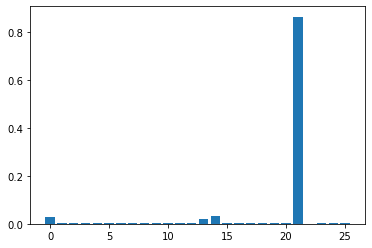

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CB63EF9860>]],
      dtype=object)

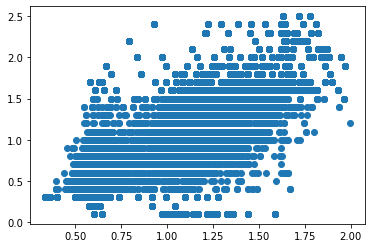

<Figure size 432x288 with 0 Axes>

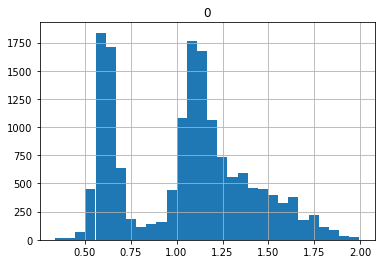

In [232]:
print("R2指数：",model.score(x_holdout_sum, y_holdout_sum))

importances = model.feature_importances_
for col,imp in zip(cols,importances):
    print("%r  with:   %r" % (col,imp))
plt.bar(range(len(cols)), importances)
plt.show()

plt.figure()
holdout_preds = model.predict(x_holdout_sum)
plt.scatter(holdout_preds,y_holdout_sum)

plt.figure()
holdout_preds = model.predict(x_holdout_sum)
temp = pandas.DataFrame(holdout_preds)
temp.hist(bins=30)

# 实验8

In [87]:
df_1 = df_train.loc[(df["CREATININE "]<0.15)&(df["CREATININE "]>0.05)]
print(df_1.shape)
df_2 = df_train.loc[(df["CREATININE "]<0.25)&(df["CREATININE "]>0.15)]
print(df_2.shape)
df_3 = df_train.loc[(df["CREATININE "]<0.35)&(df["CREATININE "]>0.25)]
print(df_3.shape)
df_4 = df_train.loc[(df["CREATININE "]<0.45)&(df["CREATININE "]>0.35)]
df_4 = df_4.sample(1200)
print(df_4.shape)
df_5 = df_train.loc[(df["CREATININE "]<0.55)&(df["CREATININE "]>0.45)]
df_5 = df_5.sample(1200)
print(df_5.shape)
df_6 = df_train.loc[(df["CREATININE "]<0.65)&(df["CREATININE "]>0.55)]
df_6 = df_6.sample(1200)
print(df_6.shape)
df_7 = df_train.loc[(df["CREATININE "]<0.75)&(df["CREATININE "]>0.65)]
df_7 = df_7.sample(1200)
print(df_7.shape)
df_8 = df_train.loc[(df["CREATININE "]<0.85)&(df["CREATININE "]>0.75)]
df_8 = df_8.sample(1200)
print(df_8.shape)
df_9 = df_train.loc[(df["CREATININE "]<0.95)&(df["CREATININE "]>0.85)]
df_9 = df_9.sample(1200)
print(df_9.shape)
df_10 = df_train.loc[(df["CREATININE "]<1.05)&(df["CREATININE "]>0.95)]
df_10 = df_10.sample(1200)
print(df_10.shape)
df_11 = df_train.loc[(df["CREATININE "]<1.15)&(df["CREATININE "]>1.05)]
df_11 = df_11.sample(1200)
print(df_11.shape)
df_12 = df_train.loc[(df["CREATININE "]<1.25)&(df["CREATININE "]>1.15)]
df_12 = df_12.sample(1200)
print(df_12.shape)
df_13 = df_train.loc[(df["CREATININE "]<1.35)&(df["CREATININE "]>1.25)]
df_13 = df_13.sample(1200)
print(df_13.shape)
df_14 = df_train.loc[(df["CREATININE "]<1.45)&(df["CREATININE "]>1.35)]
df_14 = df_14.sample(1200)
print(df_14.shape)
df_15 = df_train.loc[(df["CREATININE "]<1.55)&(df["CREATININE "]>1.45)]
df_15 = df_15.sample(1200)
print(df_15.shape)
df_16 = df_train.loc[(df["CREATININE "]<1.65)&(df["CREATININE "]>1.55)]
print(df_16.shape)
df_17 = df_train.loc[(df["CREATININE "]<1.75)&(df["CREATININE "]>1.65)]
print(df_17.shape)
df_18 = df_train.loc[(df["CREATININE "]<1.85)&(df["CREATININE "]>1.75)]
print(df_18.shape)
df_19 = df_train.loc[(df["CREATININE "]<1.95)&(df["CREATININE "]>1.85)]
print(df_19.shape)
df_20 = df_train.loc[(df["CREATININE "]<2.05)&(df["CREATININE "]>1.95)]
print(df_20.shape)
df_21 = df_train.loc[(df["CREATININE "]<2.15)&(df["CREATININE "]>2.05)]
print(df_21.shape)
df_22 = df_train.loc[(df["CREATININE "]<2.25)&(df["CREATININE "]>2.15)]
print(df_22.shape)
df_23 = df_train.loc[(df["CREATININE "]<2.35)&(df["CREATININE "]>2.25)]
print(df_23.shape)
df_24 = df_train.loc[(df["CREATININE "]<2.45)&(df["CREATININE "]>2.35)]
print(df_24.shape)
df_25 = df_train.loc[(df["CREATININE "]<2.55)&(df["CREATININE "]>2.45)]
print(df_25.shape)

print("#####################################")

temp = pandas.concat([df_25,df_24,df_23,df_22,df_21,df_20,df_19,df_18,df_17,df_16,df_15,df_14,df_13,df_12,df_11,df_10,df_9,df_8,df_7,df_6,df_5,df_4,df_3,df_2,df_1])
temp = shuffle(temp)
print(temp.shape)

df_train = temp
print(df_train.shape)

print("#####################################")

y_train = df_train["CREATININE "].values
y_train = y_train.reshape(y_train.shape[0], 1)

cols = df_train.columns.values.tolist()
cols.remove("id")
cols.remove("sido")
cols.remove("CREATININE ")
cols.remove("GFR")
cols.remove("stage")
cols.remove("height")
cols.remove("weight")

x_train = df_train[cols].values

print(x_train.shape)
print(y_train.shape)

print("#####################################")

(395, 33)
(93, 33)
(549, 33)
(1200, 33)
(1200, 33)
(1200, 33)
(1200, 33)
(1200, 33)
(1200, 33)
(1200, 33)
(1200, 33)
(1200, 33)
(1200, 33)
(1200, 33)
(1200, 33)
(1160, 33)
(687, 33)
(523, 33)
(309, 33)
(235, 33)
(144, 33)
(137, 33)
(92, 33)
(96, 33)
(76, 33)
#####################################
(18896, 33)
(18896, 33)
#####################################
(18896, 26)
(18896, 1)
#####################################


In [104]:
model = xgboost.XGBRegressor(max_depth=10,
                           n_estimators=500, #55
                           learning_rate=0.05,
                           min_child_weight=100,
                           nthread=4,
                           subsample=1, #95
                           colsample_bytree=1, # 95
                           reg_alpha=0,
                           reg_lambda=0,
                           gamma=0,
                           objective=mse,  
                           base_score = mean_sales,
                           seed=10)

#开始训练 x_holdout,y_holdout
model.fit(x_train, y_train, verbose=1, eval_set=[(x_train, y_train),(x_holdout_sum, y_holdout_sum)],  eval_metric=func, early_stopping_rounds=10, )

###########
0 - 0.34 : 0.6374 (1037)
0.34 - 0.58 : 0.3931 (2400)
0.58 - 0.82 : 0.1484 (3600)
0.82 - 1.06 : 0.0881 (2400)
1.06 - 1.3 : 0.3318 (3600)
1.3 - 1.54 : 0.5749 (2400)
1.54 - 1.78 : 0.7568 (1847)
1.78 - 2.02 : 0.988 (1067)
2.02 - 2.26 : 1.26 (281)
2.26 - 2.5 : 1.505 (264)
###########
###########
0 - 0.34 : 0.6301 (840)
0.34 - 0.58 : 0.3931 (2000)
0.58 - 0.82 : 0.1487 (3000)
0.82 - 1.06 : 0.08786 (2000)
1.06 - 1.3 : 0.3321 (3000)
1.3 - 1.54 : 0.576 (2000)
1.54 - 1.78 : 0.7596 (1710)
1.78 - 2.02 : 0.9968 (870)
2.02 - 2.26 : 1.251 (220)
2.26 - 2.5 : 1.476 (280)
###########
[0]	validation_0-rmse:0.53018	validation_1-rmse:0.53748	validation_0-myFeval:0.43013	validation_1-myFeval:0.43596
Multiple eval metrics have been passed: 'validation_1-myFeval' will be used for early stopping.

Will train until validation_1-myFeval hasn't improved in 10 rounds.
###########
0 - 0.34 : 0.6368 (1037)
0.34 - 0.58 : 0.384 (2400)
0.58 - 0.82 : 0.1447 (3600)
0.82 - 1.06 : 0.07988 (2400)
1.06 - 1.3 : 0.3

###########
0 - 0.34 : 0.6312 (1037)
0.34 - 0.58 : 0.3098 (2400)
0.58 - 0.82 : 0.1326 (3600)
0.82 - 1.06 : 0.08708 (2400)
1.06 - 1.3 : 0.1992 (3600)
1.3 - 1.54 : 0.3764 (2400)
1.54 - 1.78 : 0.5107 (1847)
1.78 - 2.02 : 0.7027 (1067)
2.02 - 2.26 : 0.9442 (281)
2.26 - 2.5 : 1.175 (264)
###########
###########
0 - 0.34 : 0.628 (840)
0.34 - 0.58 : 0.3116 (2000)
0.58 - 0.82 : 0.1362 (3000)
0.82 - 1.06 : 0.09194 (2000)
1.06 - 1.3 : 0.2034 (3000)
1.3 - 1.54 : 0.3856 (2000)
1.54 - 1.78 : 0.5018 (1710)
1.78 - 2.02 : 0.7303 (870)
2.02 - 2.26 : 0.9137 (220)
2.26 - 2.5 : 1.136 (280)
###########
[12]	validation_0-rmse:0.40371	validation_1-rmse:0.41093	validation_0-myFeval:0.31612	validation_1-myFeval:0.32268
###########
0 - 0.34 : 0.6308 (1037)
0.34 - 0.58 : 0.3049 (2400)
0.58 - 0.82 : 0.1325 (3600)
0.82 - 1.06 : 0.09039 (2400)
1.06 - 1.3 : 0.1927 (3600)
1.3 - 1.54 : 0.3648 (2400)
1.54 - 1.78 : 0.496 (1847)
1.78 - 2.02 : 0.6858 (1067)
2.02 - 2.26 : 0.9256 (281)
2.26 - 2.5 : 1.155 (264)
###########
#

###########
0 - 0.34 : 0.6238 (1037)
0.34 - 0.58 : 0.2632 (2400)
0.58 - 0.82 : 0.14 (3600)
0.82 - 1.06 : 0.1277 (2400)
1.06 - 1.3 : 0.1532 (3600)
1.3 - 1.54 : 0.2737 (2400)
1.54 - 1.78 : 0.3741 (1847)
1.78 - 2.02 : 0.5424 (1067)
2.02 - 2.26 : 0.765 (281)
2.26 - 2.5 : 0.9871 (264)
###########
###########
0 - 0.34 : 0.6305 (840)
0.34 - 0.58 : 0.2666 (2000)
0.58 - 0.82 : 0.1474 (3000)
0.82 - 1.06 : 0.1384 (2000)
1.06 - 1.3 : 0.1607 (3000)
1.3 - 1.54 : 0.2868 (2000)
1.54 - 1.78 : 0.361 (1710)
1.78 - 2.02 : 0.5826 (870)
2.02 - 2.26 : 0.7254 (220)
2.26 - 2.5 : 0.9524 (280)
###########
[24]	validation_0-rmse:0.35336	validation_1-rmse:0.36420	validation_0-myFeval:0.26685	validation_1-myFeval:0.27562
###########
0 - 0.34 : 0.6231 (1037)
0.34 - 0.58 : 0.2601 (2400)
0.58 - 0.82 : 0.141 (3600)
0.82 - 1.06 : 0.1306 (2400)
1.06 - 1.3 : 0.1514 (3600)
1.3 - 1.54 : 0.2685 (2400)
1.54 - 1.78 : 0.366 (1847)
1.78 - 2.02 : 0.5327 (1067)
2.02 - 2.26 : 0.7539 (281)
2.26 - 2.5 : 0.9755 (264)
###########
#####

###########
0 - 0.34 : 0.6148 (1037)
0.34 - 0.58 : 0.2349 (2400)
0.58 - 0.82 : 0.1493 (3600)
0.82 - 1.06 : 0.1546 (2400)
1.06 - 1.3 : 0.1414 (3600)
1.3 - 1.54 : 0.2346 (2400)
1.54 - 1.78 : 0.3038 (1847)
1.78 - 2.02 : 0.4507 (1067)
2.02 - 2.26 : 0.6599 (281)
2.26 - 2.5 : 0.8769 (264)
###########
###########
0 - 0.34 : 0.6289 (840)
0.34 - 0.58 : 0.241 (2000)
0.58 - 0.82 : 0.1597 (3000)
0.82 - 1.06 : 0.1698 (2000)
1.06 - 1.3 : 0.1508 (3000)
1.3 - 1.54 : 0.2487 (2000)
1.54 - 1.78 : 0.2944 (1710)
1.78 - 2.02 : 0.5026 (870)
2.02 - 2.26 : 0.6261 (220)
2.26 - 2.5 : 0.8466 (280)
###########
[36]	validation_0-rmse:0.33251	validation_1-rmse:0.34805	validation_0-myFeval:0.24561	validation_1-myFeval:0.25717
###########
0 - 0.34 : 0.614 (1037)
0.34 - 0.58 : 0.2333 (2400)
0.58 - 0.82 : 0.1499 (3600)
0.82 - 1.06 : 0.1562 (2400)
1.06 - 1.3 : 0.1409 (3600)
1.3 - 1.54 : 0.2328 (2400)
1.54 - 1.78 : 0.3 (1847)
1.78 - 2.02 : 0.445 (1067)
2.02 - 2.26 : 0.6536 (281)
2.26 - 2.5 : 0.8703 (264)
###########
#####

###########
0 - 0.34 : 0.6046 (1037)
0.34 - 0.58 : 0.2178 (2400)
0.58 - 0.82 : 0.1554 (3600)
0.82 - 1.06 : 0.1689 (2400)
1.06 - 1.3 : 0.1386 (3600)
1.3 - 1.54 : 0.2209 (2400)
1.54 - 1.78 : 0.2717 (1847)
1.78 - 2.02 : 0.3974 (1067)
2.02 - 2.26 : 0.5984 (281)
2.26 - 2.5 : 0.811 (264)
###########
###########
0 - 0.34 : 0.6291 (840)
0.34 - 0.58 : 0.2267 (2000)
0.58 - 0.82 : 0.1682 (3000)
0.82 - 1.06 : 0.1877 (2000)
1.06 - 1.3 : 0.1494 (3000)
1.3 - 1.54 : 0.2362 (2000)
1.54 - 1.78 : 0.2718 (1710)
1.78 - 2.02 : 0.4571 (870)
2.02 - 2.26 : 0.5667 (220)
2.26 - 2.5 : 0.7936 (280)
###########
[48]	validation_0-rmse:0.32208	validation_1-rmse:0.34265	validation_0-myFeval:0.23559	validation_1-myFeval:0.25075
###########
0 - 0.34 : 0.6039 (1037)
0.34 - 0.58 : 0.2165 (2400)
0.58 - 0.82 : 0.1557 (3600)
0.82 - 1.06 : 0.1699 (2400)
1.06 - 1.3 : 0.1384 (3600)
1.3 - 1.54 : 0.2203 (2400)
1.54 - 1.78 : 0.27 (1847)
1.78 - 2.02 : 0.394 (1067)
2.02 - 2.26 : 0.5941 (281)
2.26 - 2.5 : 0.8064 (264)
###########
###

###########
0 - 0.34 : 0.5959 (1037)
0.34 - 0.58 : 0.2062 (2400)
0.58 - 0.82 : 0.1592 (3600)
0.82 - 1.06 : 0.1759 (2400)
1.06 - 1.3 : 0.1379 (3600)
1.3 - 1.54 : 0.2151 (2400)
1.54 - 1.78 : 0.2568 (1847)
1.78 - 2.02 : 0.3668 (1067)
2.02 - 2.26 : 0.5601 (281)
2.26 - 2.5 : 0.7687 (264)
###########
###########
0 - 0.34 : 0.6262 (840)
0.34 - 0.58 : 0.2177 (2000)
0.58 - 0.82 : 0.1743 (3000)
0.82 - 1.06 : 0.1975 (2000)
1.06 - 1.3 : 0.1501 (3000)
1.3 - 1.54 : 0.2318 (2000)
1.54 - 1.78 : 0.2652 (1710)
1.78 - 2.02 : 0.4331 (870)
2.02 - 2.26 : 0.5306 (220)
2.26 - 2.5 : 0.7652 (280)
###########
[60]	validation_0-rmse:0.31588	validation_1-rmse:0.34037	validation_0-myFeval:0.23004	validation_1-myFeval:0.24840
###########
0 - 0.34 : 0.5952 (1037)
0.34 - 0.58 : 0.2056 (2400)
0.58 - 0.82 : 0.1595 (3600)
0.82 - 1.06 : 0.1762 (2400)
1.06 - 1.3 : 0.1379 (3600)
1.3 - 1.54 : 0.2148 (2400)
1.54 - 1.78 : 0.256 (1847)
1.78 - 2.02 : 0.3649 (1067)
2.02 - 2.26 : 0.5578 (281)
2.26 - 2.5 : 0.7651 (264)
###########


###########
0 - 0.34 : 0.5889 (1037)
0.34 - 0.58 : 0.1991 (2400)
0.58 - 0.82 : 0.1611 (3600)
0.82 - 1.06 : 0.1787 (2400)
1.06 - 1.3 : 0.1374 (3600)
1.3 - 1.54 : 0.212 (2400)
1.54 - 1.78 : 0.2497 (1847)
1.78 - 2.02 : 0.3497 (1067)
2.02 - 2.26 : 0.537 (281)
2.26 - 2.5 : 0.739 (264)
###########
###########
0 - 0.34 : 0.6243 (840)
0.34 - 0.58 : 0.2136 (2000)
0.58 - 0.82 : 0.1778 (3000)
0.82 - 1.06 : 0.2025 (2000)
1.06 - 1.3 : 0.1506 (3000)
1.3 - 1.54 : 0.2303 (2000)
1.54 - 1.78 : 0.2634 (1710)
1.78 - 2.02 : 0.4184 (870)
2.02 - 2.26 : 0.5138 (220)
2.26 - 2.5 : 0.7484 (280)
###########
[72]	validation_0-rmse:0.31148	validation_1-rmse:0.33946	validation_0-myFeval:0.22656	validation_1-myFeval:0.24745
###########
0 - 0.34 : 0.5884 (1037)
0.34 - 0.58 : 0.1988 (2400)
0.58 - 0.82 : 0.1611 (3600)
0.82 - 1.06 : 0.1787 (2400)
1.06 - 1.3 : 0.1374 (3600)
1.3 - 1.54 : 0.2118 (2400)
1.54 - 1.78 : 0.2494 (1847)
1.78 - 2.02 : 0.3488 (1067)
2.02 - 2.26 : 0.5357 (281)
2.26 - 2.5 : 0.7371 (264)
###########
##

###########
0 - 0.34 : 0.5836 (1037)
0.34 - 0.58 : 0.1956 (2400)
0.58 - 0.82 : 0.1619 (3600)
0.82 - 1.06 : 0.1793 (2400)
1.06 - 1.3 : 0.1371 (3600)
1.3 - 1.54 : 0.2105 (2400)
1.54 - 1.78 : 0.2463 (1847)
1.78 - 2.02 : 0.34 (1067)
2.02 - 2.26 : 0.5213 (281)
2.26 - 2.5 : 0.7204 (264)
###########
###########
0 - 0.34 : 0.6228 (840)
0.34 - 0.58 : 0.2118 (2000)
0.58 - 0.82 : 0.1797 (3000)
0.82 - 1.06 : 0.2046 (2000)
1.06 - 1.3 : 0.1514 (3000)
1.3 - 1.54 : 0.2298 (2000)
1.54 - 1.78 : 0.2637 (1710)
1.78 - 2.02 : 0.4129 (870)
2.02 - 2.26 : 0.5032 (220)
2.26 - 2.5 : 0.7397 (280)
###########
[84]	validation_0-rmse:0.30857	validation_1-rmse:0.33924	validation_0-myFeval:0.22443	validation_1-myFeval:0.24726
###########
0 - 0.34 : 0.5833 (1037)
0.34 - 0.58 : 0.1954 (2400)
0.58 - 0.82 : 0.1619 (3600)
0.82 - 1.06 : 0.1794 (2400)
1.06 - 1.3 : 0.137 (3600)
1.3 - 1.54 : 0.2105 (2400)
1.54 - 1.78 : 0.2462 (1847)
1.78 - 2.02 : 0.3395 (1067)
2.02 - 2.26 : 0.5206 (281)
2.26 - 2.5 : 0.7193 (264)
###########
##

XGBRegressor(base_score=0.8524442689311917, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=10, min_child_weight=100, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4, nthread=4,
             num_parallel_tree=1,
             objective=<function mse at 0x000002CB75221950>, random_state=10,
             reg_alpha=0, reg_lambda=0, scale_pos_weight=1, seed=10,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [70]:
pickle.dump(model, open("models\model_1200.pickle.dat", "wb"))

In [52]:
model = pickle.load(open("models\model_1200.pickle.dat", "rb"))

In [53]:
print("R2指数：",model.score(x_holdout_1, y_holdout_1))
print("R2指数：",model.score(x_holdout_2, y_holdout_2))
print("R2指数：",model.score(x_holdout_3, y_holdout_3))
print("R2指数：",model.score(x_holdout_4, y_holdout_4))
print("R2指数：",model.score(x_holdout_5, y_holdout_5))
print("R2指数：",model.score(x_holdout_6, y_holdout_6))
print("R2指数：",model.score(x_holdout_7, y_holdout_7))
print("R2指数：",model.score(x_holdout_8, y_holdout_8))
print("R2指数：",model.score(x_holdout_9, y_holdout_9))
print("R2指数：",model.score(x_holdout_10, y_holdout_10))

R2指数： 0.5643202917311269
R2指数： 0.5623890900976176
R2指数： 0.5623902947538706
R2指数： 0.5377955727207675
R2指数： 0.5694460245585289
R2指数： 0.5546520156985226
R2指数： 0.5438961089809162
R2指数： 0.5625033583470324
R2指数： 0.5430003942767354
R2指数： 0.5654482548191841


R2指数： 0.5565841405984303
'age'  with:   0.041640297
'waist'  with:   0.004466169
'vision_left'  with:   0.0035580962
'vision_right'  with:   0.0035690689
'listen_left'  with:   0.0030846905
'listen_right'  with:   0.0019781638
'BP_HIGH '  with:   0.0034106444
'BP_LWST '  with:   0.0033872034
'BLDS'  with:   0.004013899
'TOT_CHOLE '  with:   0.0035041797
'TRIGLYCERIDE'  with:   0.0056552244
'HDL_CHOLE '  with:   0.0050503905
'LDL_CHOLE '  with:   0.0033644352
'HMG '  with:   0.030736547
'OLIG_PROTE_CD'  with:   0.053939465
'SGOT_AST '  with:   0.0036240218
'SGPT_ALT '  with:   0.0037706562
'GAMMA_GTP '  with:   0.0037227243
'DRINK_OR_NOT'  with:   0.0049430863
'MOUTH_CHECK'  with:   0.0032001073
'BMI'  with:   0.00514042
'sex_1'  with:   0.79408574
'sex_2'  with:   0.0
'SMK_STAT_TYPE_RSPS_CD_1.0'  with:   0.0030829192
'SMK_STAT_TYPE_RSPS_CD_2.0'  with:   0.0032659015
'SMK_STAT_TYPE_RSPS_CD_3.0'  with:   0.003805989


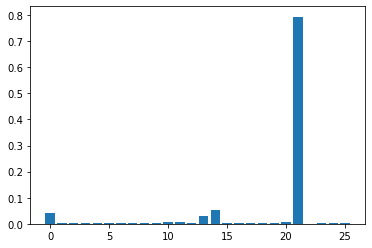

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CB33AD8208>]],
      dtype=object)

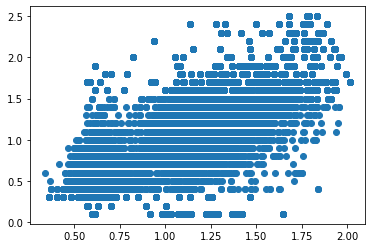

<Figure size 432x288 with 0 Axes>

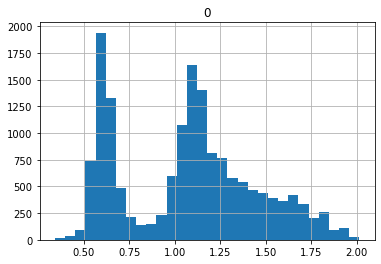

In [54]:
print("R2指数：",model.score(x_holdout_sum, y_holdout_sum))

importances = model.feature_importances_
for col,imp in zip(cols,importances):
    print("%r  with:   %r" % (col,imp))
plt.bar(range(len(cols)), importances)
plt.show()

plt.figure()
holdout_preds = model.predict(x_holdout_sum)
plt.scatter(holdout_preds,y_holdout_sum)

plt.figure()
holdout_preds = model.predict(x_holdout_sum)
temp = pandas.DataFrame(holdout_preds)
temp.hist(bins=30)

# 实验9

In [8]:
df_1 = df_train.loc[(df["CREATININE "]<0.15)&(df["CREATININE "]>0.05)]
print(df_1.shape)
df_2 = df_train.loc[(df["CREATININE "]<0.25)&(df["CREATININE "]>0.15)]
print(df_2.shape)
df_3 = df_train.loc[(df["CREATININE "]<0.35)&(df["CREATININE "]>0.25)]
print(df_3.shape)
df_4 = df_train.loc[(df["CREATININE "]<0.45)&(df["CREATININE "]>0.35)]
df_4 = df_4.sample(600)
print(df_4.shape)
df_5 = df_train.loc[(df["CREATININE "]<0.55)&(df["CREATININE "]>0.45)]
df_5 = df_5.sample(600)
print(df_5.shape)
df_6 = df_train.loc[(df["CREATININE "]<0.65)&(df["CREATININE "]>0.55)]
df_6 = df_6.sample(600)
print(df_6.shape)
df_7 = df_train.loc[(df["CREATININE "]<0.75)&(df["CREATININE "]>0.65)]
df_7 = df_7.sample(600)
print(df_7.shape)
df_8 = df_train.loc[(df["CREATININE "]<0.85)&(df["CREATININE "]>0.75)]
df_8 = df_8.sample(600)
print(df_8.shape)
df_9 = df_train.loc[(df["CREATININE "]<0.95)&(df["CREATININE "]>0.85)]
df_9 = df_9.sample(600)
print(df_9.shape)
df_10 = df_train.loc[(df["CREATININE "]<1.05)&(df["CREATININE "]>0.95)]
df_10 = df_10.sample(600)
print(df_10.shape)
df_11 = df_train.loc[(df["CREATININE "]<1.15)&(df["CREATININE "]>1.05)]
df_11 = df_11.sample(600)
print(df_11.shape)
df_12 = df_train.loc[(df["CREATININE "]<1.25)&(df["CREATININE "]>1.15)]
df_12 = df_12.sample(600)
print(df_12.shape)
df_13 = df_train.loc[(df["CREATININE "]<1.35)&(df["CREATININE "]>1.25)]
df_13 = df_13.sample(600)
print(df_13.shape)
df_14 = df_train.loc[(df["CREATININE "]<1.45)&(df["CREATININE "]>1.35)]
df_14 = df_14.sample(600)
print(df_14.shape)
df_15 = df_train.loc[(df["CREATININE "]<1.55)&(df["CREATININE "]>1.45)]
df_15 = df_15.sample(600)
print(df_15.shape)
df_16 = df_train.loc[(df["CREATININE "]<1.65)&(df["CREATININE "]>1.55)]
df_16 = df_16.sample(600)
print(df_16.shape)
df_17 = df_train.loc[(df["CREATININE "]<1.75)&(df["CREATININE "]>1.65)]
df_17 = df_17.sample(600)
print(df_17.shape)
df_18 = df_train.loc[(df["CREATININE "]<1.85)&(df["CREATININE "]>1.75)]
print(df_18.shape)
df_19 = df_train.loc[(df["CREATININE "]<1.95)&(df["CREATININE "]>1.85)]
print(df_19.shape)
df_20 = df_train.loc[(df["CREATININE "]<2.05)&(df["CREATININE "]>1.95)]
print(df_20.shape)
df_21 = df_train.loc[(df["CREATININE "]<2.15)&(df["CREATININE "]>2.05)]
print(df_21.shape)
df_22 = df_train.loc[(df["CREATININE "]<2.25)&(df["CREATININE "]>2.15)]
print(df_22.shape)
df_23 = df_train.loc[(df["CREATININE "]<2.35)&(df["CREATININE "]>2.25)]
print(df_23.shape)
df_24 = df_train.loc[(df["CREATININE "]<2.45)&(df["CREATININE "]>2.35)]
print(df_24.shape)
df_25 = df_train.loc[(df["CREATININE "]<2.55)&(df["CREATININE "]>2.45)]
print(df_25.shape)

print("#####################################")

temp = pandas.concat([df_25,df_24,df_23,df_22,df_21,df_20,df_19,df_18,df_17,df_16,df_15,df_14,df_13,df_12,df_11,df_10,df_9,df_8,df_7,df_6,df_5,df_4,df_3,df_2,df_1])
temp = shuffle(temp)
print(temp.shape)

df_train = temp
print(df_train.shape)

print("#####################################")

y_train = df_train["CREATININE "].values
y_train = y_train.reshape(y_train.shape[0], 1)

cols = df_train.columns.values.tolist()
cols.remove("id")
cols.remove("sido")
cols.remove("CREATININE ")
cols.remove("GFR")
cols.remove("stage")
cols.remove("height")
cols.remove("weight")

x_train = df_train[cols].values

print(x_train.shape)
print(y_train.shape)

print("#####################################")

(395, 33)
(93, 33)
(549, 33)
(600, 33)
(600, 33)
(600, 33)
(600, 33)
(600, 33)
(600, 33)
(600, 33)
(600, 33)
(600, 33)
(600, 33)
(600, 33)
(600, 33)
(600, 33)
(600, 33)
(523, 33)
(309, 33)
(235, 33)
(144, 33)
(137, 33)
(92, 33)
(96, 33)
(76, 33)
#####################################
(11049, 33)
(11049, 33)
#####################################
(11049, 26)
(11049, 1)
#####################################


# 随机森林测试under-sampling

model = RandomForestRegressor(criterion="mse",n_estimators=100,max_depth=10, min_samples_split=40,min_samples_leaf=7,max_features=7,oob_score=True, random_state=10)  
model.fit(x_train, y_train)

print("R2指数：",model.score(x_holdout_1, y_holdout_1))
print("R2指数：",model.score(x_holdout_2, y_holdout_2))
print("R2指数：",model.score(x_holdout_3, y_holdout_3))
print("R2指数：",model.score(x_holdout_4, y_holdout_4))
print("R2指数：",model.score(x_holdout_5, y_holdout_5))
print("R2指数：",model.score(x_holdout_6, y_holdout_6))
print("R2指数：",model.score(x_holdout_7, y_holdout_7))
print("R2指数：",model.score(x_holdout_8, y_holdout_8))
print("R2指数：",model.score(x_holdout_9, y_holdout_9))
print("R2指数：",model.score(x_holdout_10, y_holdout_10))

print("R2指数：",model.score(x_holdout_sum, y_holdout_sum))

importances = model.feature_importances_
for col,imp in zip(cols,importances):
    print("%r  with:   %r" % (col,imp))
plt.bar(range(len(cols)), importances)
plt.show()

plt.figure()
holdout_preds = model.predict(x_holdout_sum)
plt.scatter(holdout_preds,y_holdout_sum)

plt.figure()
holdout_preds = model.predict(x_holdout_sum)
temp = pandas.DataFrame(holdout_preds)
temp.hist(bins=30)

In [74]:
model = xgboost.XGBRegressor(max_depth=10,
                           n_estimators=500, #55
                           learning_rate=0.05,
                           min_child_weight=100,
                           nthread=4,
                           subsample=1, #95
                           colsample_bytree=1, # 95
                           reg_alpha=0,
                           reg_lambda=0,
                           gamma=0,
                           objective=mse,  
                           base_score = mean_sales,
                           seed=10)

#开始训练 x_holdout,y_holdout
model.fit(x_train, y_train, verbose=1, eval_set=[(x_train, y_train),(x_holdout_sum, y_holdout_sum)],  eval_metric=func, early_stopping_rounds=10, )

###########
0 - 0.34 : 0.6371 (1037)
0.34 - 0.58 : 0.393 (1200)
0.58 - 0.82 : 0.1486 (1800)
0.82 - 1.06 : 0.08875 (1200)
1.06 - 1.3 : 0.3319 (1800)
1.3 - 1.54 : 0.574 (1200)
1.54 - 1.78 : 0.7674 (1200)
1.78 - 2.02 : 0.9858 (1067)
2.02 - 2.26 : 1.257 (281)
2.26 - 2.5 : 1.502 (264)
###########
###########
0 - 0.34 : 0.6302 (840)
0.34 - 0.58 : 0.393 (2000)
0.58 - 0.82 : 0.1485 (3000)
0.82 - 1.06 : 0.08841 (2000)
1.06 - 1.3 : 0.3322 (3000)
1.3 - 1.54 : 0.5736 (2000)
1.54 - 1.78 : 0.757 (1710)
1.78 - 2.02 : 0.9962 (870)
2.02 - 2.26 : 1.246 (220)
2.26 - 2.5 : 1.472 (280)
###########
[0]	validation_0-rmse:0.60826	validation_1-rmse:0.53634	validation_0-myFeval:0.49915	validation_1-myFeval:0.43524
Multiple eval metrics have been passed: 'validation_1-myFeval' will be used for early stopping.

Will train until validation_1-myFeval hasn't improved in 10 rounds.
###########
0 - 0.34 : 0.6365 (1037)
0.34 - 0.58 : 0.3841 (1200)
0.58 - 0.82 : 0.1451 (1800)
0.82 - 1.06 : 0.08159 (1200)
1.06 - 1.3 : 0.

###########
0 - 0.34 : 0.6287 (1037)
0.34 - 0.58 : 0.3096 (1200)
0.58 - 0.82 : 0.1332 (1800)
0.82 - 1.06 : 0.09586 (1200)
1.06 - 1.3 : 0.2003 (1800)
1.3 - 1.54 : 0.3664 (1200)
1.54 - 1.78 : 0.5033 (1200)
1.78 - 2.02 : 0.6801 (1067)
2.02 - 2.26 : 0.9153 (281)
2.26 - 2.5 : 1.153 (264)
###########
###########
0 - 0.34 : 0.6278 (840)
0.34 - 0.58 : 0.3087 (2000)
0.58 - 0.82 : 0.1369 (3000)
0.82 - 1.06 : 0.09992 (2000)
1.06 - 1.3 : 0.2061 (3000)
1.3 - 1.54 : 0.3664 (2000)
1.54 - 1.78 : 0.4793 (1710)
1.78 - 2.02 : 0.7177 (870)
2.02 - 2.26 : 0.8763 (220)
2.26 - 2.5 : 1.101 (280)
###########
[12]	validation_0-rmse:0.46356	validation_1-rmse:0.40461	validation_0-myFeval:0.36833	validation_1-myFeval:0.31730
###########
0 - 0.34 : 0.6279 (1037)
0.34 - 0.58 : 0.3047 (1200)
0.58 - 0.82 : 0.1331 (1800)
0.82 - 1.06 : 0.09969 (1200)
1.06 - 1.3 : 0.1947 (1800)
1.3 - 1.54 : 0.3539 (1200)
1.54 - 1.78 : 0.4876 (1200)
1.78 - 2.02 : 0.6619 (1067)
2.02 - 2.26 : 0.8951 (281)
2.26 - 2.5 : 1.132 (264)
###########

###########
0 - 0.34 : 0.6171 (1037)
0.34 - 0.58 : 0.2593 (1200)
0.58 - 0.82 : 0.1423 (1800)
0.82 - 1.06 : 0.1359 (1200)
1.06 - 1.3 : 0.1652 (1800)
1.3 - 1.54 : 0.2661 (1200)
1.54 - 1.78 : 0.3564 (1200)
1.78 - 2.02 : 0.5076 (1067)
2.02 - 2.26 : 0.7209 (281)
2.26 - 2.5 : 0.9531 (264)
###########
###########
0 - 0.34 : 0.6261 (840)
0.34 - 0.58 : 0.2587 (2000)
0.58 - 0.82 : 0.1521 (3000)
0.82 - 1.06 : 0.1463 (2000)
1.06 - 1.3 : 0.1722 (3000)
1.3 - 1.54 : 0.2659 (2000)
1.54 - 1.78 : 0.3283 (1710)
1.78 - 2.02 : 0.557 (870)
2.02 - 2.26 : 0.6719 (220)
2.26 - 2.5 : 0.9014 (280)
###########
[24]	validation_0-rmse:0.40405	validation_1-rmse:0.35812	validation_0-myFeval:0.30867	validation_1-myFeval:0.26929
###########
0 - 0.34 : 0.6159 (1037)
0.34 - 0.58 : 0.2561 (1200)
0.58 - 0.82 : 0.1431 (1800)
0.82 - 1.06 : 0.1385 (1200)
1.06 - 1.3 : 0.1644 (1800)
1.3 - 1.54 : 0.2622 (1200)
1.54 - 1.78 : 0.3478 (1200)
1.78 - 2.02 : 0.4969 (1067)
2.02 - 2.26 : 0.7092 (281)
2.26 - 2.5 : 0.941 (264)
###########
#

###########
0 - 0.34 : 0.6051 (1037)
0.34 - 0.58 : 0.2291 (1200)
0.58 - 0.82 : 0.1533 (1800)
0.82 - 1.06 : 0.1615 (1200)
1.06 - 1.3 : 0.1604 (1800)
1.3 - 1.54 : 0.2393 (1200)
1.54 - 1.78 : 0.2854 (1200)
1.78 - 2.02 : 0.4091 (1067)
2.02 - 2.26 : 0.611 (281)
2.26 - 2.5 : 0.8363 (264)
###########
###########
0 - 0.34 : 0.6248 (840)
0.34 - 0.58 : 0.23 (2000)
0.58 - 0.82 : 0.1685 (3000)
0.82 - 1.06 : 0.1758 (2000)
1.06 - 1.3 : 0.1681 (3000)
1.3 - 1.54 : 0.238 (2000)
1.54 - 1.78 : 0.2733 (1710)
1.78 - 2.02 : 0.4651 (870)
2.02 - 2.26 : 0.5585 (220)
2.26 - 2.5 : 0.792 (280)
###########
[36]	validation_0-rmse:0.37899	validation_1-rmse:0.34446	validation_0-myFeval:0.28233	validation_1-myFeval:0.25371
###########
0 - 0.34 : 0.6042 (1037)
0.34 - 0.58 : 0.2272 (1200)
0.58 - 0.82 : 0.154 (1800)
0.82 - 1.06 : 0.1629 (1200)
1.06 - 1.3 : 0.1604 (1800)
1.3 - 1.54 : 0.2382 (1200)
1.54 - 1.78 : 0.2821 (1200)
1.78 - 2.02 : 0.403 (1067)
2.02 - 2.26 : 0.6041 (281)
2.26 - 2.5 : 0.8294 (264)
###########
######

###########
0 - 0.34 : 0.5931 (1037)
0.34 - 0.58 : 0.2106 (1200)
0.58 - 0.82 : 0.1606 (1800)
0.82 - 1.06 : 0.1753 (1200)
1.06 - 1.3 : 0.1606 (1800)
1.3 - 1.54 : 0.233 (1200)
1.54 - 1.78 : 0.2575 (1200)
1.78 - 2.02 : 0.3545 (1067)
2.02 - 2.26 : 0.5449 (281)
2.26 - 2.5 : 0.7656 (264)
###########
###########
0 - 0.34 : 0.6238 (840)
0.34 - 0.58 : 0.2136 (2000)
0.58 - 0.82 : 0.1804 (3000)
0.82 - 1.06 : 0.1924 (2000)
1.06 - 1.3 : 0.1709 (3000)
1.3 - 1.54 : 0.2359 (2000)
1.54 - 1.78 : 0.2626 (1710)
1.78 - 2.02 : 0.4155 (870)
2.02 - 2.26 : 0.494 (220)
2.26 - 2.5 : 0.7356 (280)
###########
[48]	validation_0-rmse:0.36639	validation_1-rmse:0.34153	validation_0-myFeval:0.26955	validation_1-myFeval:0.25044
###########
0 - 0.34 : 0.5919 (1037)
0.34 - 0.58 : 0.2091 (1200)
0.58 - 0.82 : 0.161 (1800)
0.82 - 1.06 : 0.176 (1200)
1.06 - 1.3 : 0.1605 (1800)
1.3 - 1.54 : 0.2327 (1200)
1.54 - 1.78 : 0.256 (1200)
1.78 - 2.02 : 0.3514 (1067)
2.02 - 2.26 : 0.5408 (281)
2.26 - 2.5 : 0.7612 (264)
###########
####

###########
0 - 0.34 : 0.5818 (1037)
0.34 - 0.58 : 0.1988 (1200)
0.58 - 0.82 : 0.165 (1800)
0.82 - 1.06 : 0.1821 (1200)
1.06 - 1.3 : 0.1601 (1800)
1.3 - 1.54 : 0.2304 (1200)
1.54 - 1.78 : 0.2467 (1200)
1.78 - 2.02 : 0.3271 (1067)
2.02 - 2.26 : 0.5037 (281)
2.26 - 2.5 : 0.7207 (264)
###########
###########
0 - 0.34 : 0.6205 (840)
0.34 - 0.58 : 0.2057 (2000)
0.58 - 0.82 : 0.1873 (3000)
0.82 - 1.06 : 0.2019 (2000)
1.06 - 1.3 : 0.1735 (3000)
1.3 - 1.54 : 0.2349 (2000)
1.54 - 1.78 : 0.2603 (1710)
1.78 - 2.02 : 0.3941 (870)
2.02 - 2.26 : 0.4583 (220)
2.26 - 2.5 : 0.7006 (280)
###########
[60]	validation_0-rmse:0.35840	validation_1-rmse:0.34118	validation_0-myFeval:0.26237	validation_1-myFeval:0.24959
###########
0 - 0.34 : 0.5809 (1037)
0.34 - 0.58 : 0.1984 (1200)
0.58 - 0.82 : 0.1652 (1800)
0.82 - 1.06 : 0.1823 (1200)
1.06 - 1.3 : 0.16 (1800)
1.3 - 1.54 : 0.2302 (1200)
1.54 - 1.78 : 0.2463 (1200)
1.78 - 2.02 : 0.3253 (1067)
2.02 - 2.26 : 0.5015 (281)
2.26 - 2.5 : 0.7175 (264)
###########
##

XGBRegressor(base_score=0.8524442689311917, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=10, min_child_weight=100, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4, nthread=4,
             num_parallel_tree=1,
             objective=<function mse at 0x00000203123C3950>, random_state=10,
             reg_alpha=0, reg_lambda=0, scale_pos_weight=1, seed=10,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [75]:
pickle.dump(model, open("models\model_600.pickle.dat", "wb"))

In [55]:
model = pickle.load(open("models\model_600.pickle.dat", "rb"))

In [56]:
print("R2指数：",model.score(x_holdout_1, y_holdout_1))
print("R2指数：",model.score(x_holdout_2, y_holdout_2))
print("R2指数：",model.score(x_holdout_3, y_holdout_3))
print("R2指数：",model.score(x_holdout_4, y_holdout_4))
print("R2指数：",model.score(x_holdout_5, y_holdout_5))
print("R2指数：",model.score(x_holdout_6, y_holdout_6))
print("R2指数：",model.score(x_holdout_7, y_holdout_7))
print("R2指数：",model.score(x_holdout_8, y_holdout_8))
print("R2指数：",model.score(x_holdout_9, y_holdout_9))
print("R2指数：",model.score(x_holdout_10, y_holdout_10))

R2指数： 0.5495172614936552
R2指数： 0.5490213208090482
R2指数： 0.548016054268905
R2指数： 0.5219448227862309
R2指数： 0.5542145138132013
R2指数： 0.5399621664881415
R2指数： 0.5268427351310946
R2指数： 0.555461822094551
R2指数： 0.5205683639656914
R2指数： 0.5560412561578203


R2指数： 0.542159031700834
'age'  with:   0.051675532
'waist'  with:   0.00771929
'vision_left'  with:   0.0048137982
'vision_right'  with:   0.0054161693
'listen_left'  with:   0.0043830257
'listen_right'  with:   0.0
'BP_HIGH '  with:   0.0053074635
'BP_LWST '  with:   0.004958512
'BLDS'  with:   0.006892632
'TOT_CHOLE '  with:   0.0055823633
'TRIGLYCERIDE'  with:   0.0076468363
'HDL_CHOLE '  with:   0.0056507406
'LDL_CHOLE '  with:   0.0053169793
'HMG '  with:   0.06741408
'OLIG_PROTE_CD'  with:   0.05787937
'SGOT_AST '  with:   0.005147214
'SGPT_ALT '  with:   0.0050683795
'GAMMA_GTP '  with:   0.004998219
'DRINK_OR_NOT'  with:   0.0070191678
'MOUTH_CHECK'  with:   0.005719986
'BMI'  with:   0.0072308723
'sex_1'  with:   0.7062794
'sex_2'  with:   0.0
'SMK_STAT_TYPE_RSPS_CD_1.0'  with:   0.006956033
'SMK_STAT_TYPE_RSPS_CD_2.0'  with:   0.0056579774
'SMK_STAT_TYPE_RSPS_CD_3.0'  with:   0.0052660704


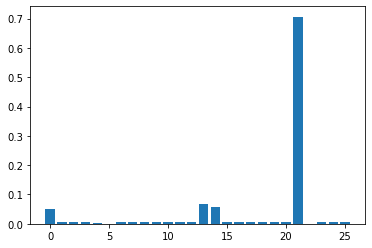

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CB339026D8>]],
      dtype=object)

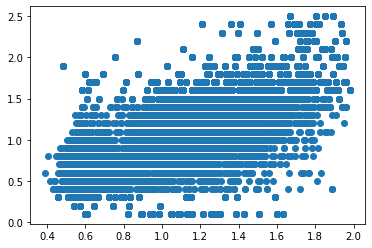

<Figure size 432x288 with 0 Axes>

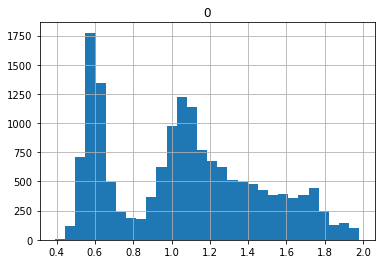

In [57]:
print("R2指数：",model.score(x_holdout_sum, y_holdout_sum))

importances = model.feature_importances_
for col,imp in zip(cols,importances):
    print("%r  with:   %r" % (col,imp))
plt.bar(range(len(cols)), importances)
plt.show()

plt.figure()
holdout_preds = model.predict(x_holdout_sum)
plt.scatter(holdout_preds,y_holdout_sum)

plt.figure()
holdout_preds = model.predict(x_holdout_sum)
temp = pandas.DataFrame(holdout_preds)
temp.hist(bins=30)

# 对比实验

In [245]:
x_train.shape

(34220, 26)

In [246]:
model = RandomForestRegressor(criterion="mse",n_estimators=100,max_depth=10, min_samples_split=40,min_samples_leaf=7,max_features=7,oob_score=True, random_state=10)  
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, max_features=7, min_samples_leaf=7,
                      min_samples_split=40, oob_score=True, random_state=10)

In [247]:
print("R2指数：",model.score(x_holdout_1, y_holdout_1))
print("R2指数：",model.score(x_holdout_2, y_holdout_2))
print("R2指数：",model.score(x_holdout_3, y_holdout_3))
print("R2指数：",model.score(x_holdout_4, y_holdout_4))
print("R2指数：",model.score(x_holdout_5, y_holdout_5))
print("R2指数：",model.score(x_holdout_6, y_holdout_6))
print("R2指数：",model.score(x_holdout_7, y_holdout_7))
print("R2指数：",model.score(x_holdout_8, y_holdout_8))
print("R2指数：",model.score(x_holdout_9, y_holdout_9))
print("R2指数：",model.score(x_holdout_10, y_holdout_10))

R2指数： 0.5427965730453587
R2指数： 0.5408030008643515
R2指数： 0.5404693536926461
R2指数： 0.5169982674366933
R2指数： 0.5490238819457047
R2指数： 0.5291624001711388
R2指数： 0.5231989030699293
R2指数： 0.5412523855915237
R2指数： 0.5199723586539848
R2指数： 0.537370583376191


R2指数： 0.5341047707847523
'age'  with:   0.1103953561806934
'waist'  with:   0.040369970851136514
'vision_left'  with:   0.008598381647849715
'vision_right'  with:   0.007707264667648136
'listen_left'  with:   0.0006519025550854913
'listen_right'  with:   0.001044784059533646
'BP_HIGH '  with:   0.00975780912140265
'BP_LWST '  with:   0.005087360962506152
'BLDS'  with:   0.012920029518488774
'TOT_CHOLE '  with:   0.008940591544400413
'TRIGLYCERIDE'  with:   0.01168464835680961
'HDL_CHOLE '  with:   0.01821448335883762
'LDL_CHOLE '  with:   0.007437128729201399
'HMG '  with:   0.10312189434687419
'OLIG_PROTE_CD'  with:   0.07849686856867506
'SGOT_AST '  with:   0.0059560306076262455
'SGPT_ALT '  with:   0.008238042550735049
'GAMMA_GTP '  with:   0.011861349822248506
'DRINK_OR_NOT'  with:   0.006942010592207125
'MOUTH_CHECK'  with:   0.0007692074323660348
'BMI'  with:   0.011507981716839913
'sex_1'  with:   0.23475697369466114
'sex_2'  with:   0.25720388243918163
'SMK_STAT_TYPE_RSPS_CD_1.

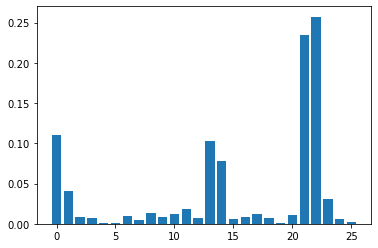

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CB63C7A400>]],
      dtype=object)

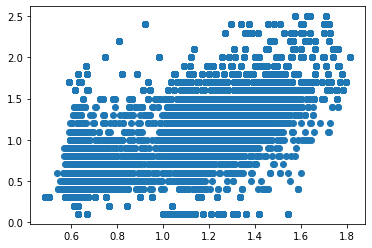

<Figure size 432x288 with 0 Axes>

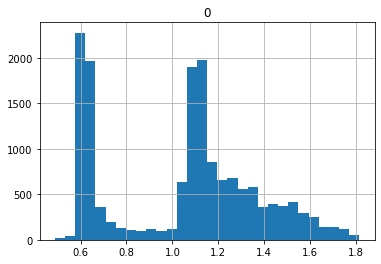

In [248]:
print("R2指数：",model.score(x_holdout_sum, y_holdout_sum))

importances = model.feature_importances_
for col,imp in zip(cols,importances):
    print("%r  with:   %r" % (col,imp))
plt.bar(range(len(cols)), importances)
plt.show()

plt.figure()
holdout_preds = model.predict(x_holdout_sum)
plt.scatter(holdout_preds,y_holdout_sum)

plt.figure()
holdout_preds = model.predict(x_holdout_sum)
temp = pandas.DataFrame(holdout_preds)
temp.hist(bins=30)

In [9]:
from keras.models import Model
from keras.layers import Input, Dense, BatchNormalization, add
from keras.optimizers import SGD,Adam
from keras.layers.advanced_activations import ReLU

import tensorflow as tf

Using TensorFlow backend.


In [10]:
from sklearn.preprocessing import StandardScaler

ss_x,ss_y = StandardScaler(),StandardScaler()

x_train_nor = ss_x.fit_transform(x_train)
x_holdout_nor = ss_x.transform(x_holdout_sum)

NameError: name 'x_holdout_sum' is not defined

In [3]:
def dens_block(input_tensor,units):

    x = Dense(units)(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Dense(units)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Dense(units)(x)
    x = BatchNormalization()(x)

    shortcut = Dense(units)(input_tensor)
    shortcut = BatchNormalization()(shortcut)

    x = add([x, shortcut])
    x = x = ReLU()(x)
    
    return x

In [4]:
def identity_block(input_tensor,units):
    
    x = Dense(units)(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Dense(units)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Dense(units)(x)
    x = BatchNormalization()(x)

    x = add([x, input_tensor])
    x = ReLU()(x)

    return x

In [5]:
def ResNetRegression():

    Res_input = Input(shape=(26,))

    width = 16

    x = dens_block(Res_input,width)
    x = identity_block(x,width)
    x = identity_block(x,width)

    x = dens_block(x,width)
    x = identity_block(x,width)
    x = identity_block(x,width)

    x = dens_block(x,width)
    x = identity_block(x,width)
    x = identity_block(x,width)

    x = BatchNormalization()(x)
    x = Dense(1, activation='linear')(x)

    model = Model(inputs=Res_input, outputs=x)

    return model

In [ ]:
model = ResNetRegression()
model.compile(loss="mse", optimizer='adam', metrics=['mae'])
model.fit(x_train_nor, y_train, validation_data = [x_holdout_nor, y_holdout_sum], batch_size=32, nb_epoch=20, verbose=1) 

In [76]:
x_holdout_nor_1 = ss_x.transform(x_holdout_1)
holdout_preds_1 = model.predict(x_holdout_nor_1)
print(r2_score(y_holdout_1,holdout_preds_1))

x_holdout_nor_2 = ss_x.transform(x_holdout_2)
holdout_preds_2 = model.predict(x_holdout_nor_2)
print(r2_score(y_holdout_2,holdout_preds_2))

x_holdout_nor_3 = ss_x.transform(x_holdout_3)
holdout_preds_3 = model.predict(x_holdout_nor_3)
print(r2_score(y_holdout_3,holdout_preds_3))

x_holdout_nor_4 = ss_x.transform(x_holdout_4)
holdout_preds_4 = model.predict(x_holdout_nor_4)
print(r2_score(y_holdout_4,holdout_preds_4))

x_holdout_nor_5 = ss_x.transform(x_holdout_5)
holdout_preds_5 = model.predict(x_holdout_nor_5)
print(r2_score(y_holdout_5,holdout_preds_5))

x_holdout_nor_6 = ss_x.transform(x_holdout_6)
holdout_preds_6 = model.predict(x_holdout_nor_6)
print(r2_score(y_holdout_6,holdout_preds_6))

x_holdout_nor_7 = ss_x.transform(x_holdout_7)
holdout_preds_7 = model.predict(x_holdout_nor_7)
print(r2_score(y_holdout_7,holdout_preds_7))

x_holdout_nor_8 = ss_x.transform(x_holdout_8)
holdout_preds_8 = model.predict(x_holdout_nor_8)
print(r2_score(y_holdout_8,holdout_preds_8))

x_holdout_nor_9 = ss_x.transform(x_holdout_9)
holdout_preds_9 = model.predict(x_holdout_nor_9)
print(r2_score(y_holdout_9,holdout_preds_9))

x_holdout_nor_10 = ss_x.transform(x_holdout_10)
holdout_preds_10 = model.predict(x_holdout_nor_10)
print(r2_score(y_holdout_10,holdout_preds_10))

0.5407494677863371
0.539848738581084
0.5261550584936487
0.5000148870197437
0.5299342300869372
0.5211705192219055
0.5156624197300061
0.5365061296574707
0.5146704883996263
0.5341899852647283


In [77]:
holdout_preds = model.predict(x_holdout_nor)

In [78]:
print(r2_score(y_holdout_sum,holdout_preds))

0.5258901924241488


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020350A10320>]],
      dtype=object)

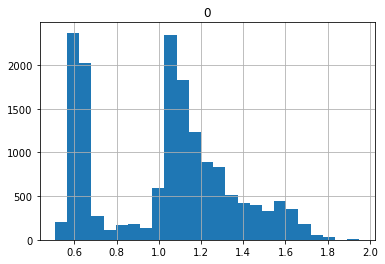

In [94]:
temp = pandas.DataFrame(holdout_preds)
temp.hist(bins=25)

# Cost-Sensitive Loss

In [543]:
x_train.shape

(34220, 26)

In [560]:
# mse - cost_sensitive

model = xgboost.XGBRegressor(max_depth=10,
                           n_estimators=500, #55
                           learning_rate=0.05,
                           min_child_weight=100,
                           nthread=4,
                           subsample=0.8, #95
                           colsample_bytree=0.8, # 95
                           reg_alpha=0,
                           reg_lambda=0,
                           gamma=0,
                           objective=mse,  
                           base_score = mean_sales,
                           seed=10)

#开始训练 x_holdout,y_holdout
model.fit(x_train, y_train, verbose=1, eval_set=[(x_train, y_train),(x_holdout_sum, y_holdout_sum)],  eval_metric=func, early_stopping_rounds=10, )

weight10:  1
weight_a:  1.0
###########
0 - 0.34 : 0.6375 (1037)
0.34 - 0.58 : 0.3935 (5000)
0.58 - 0.82 : 0.1489 (7500)
0.82 - 1.06 : 0.08813 (5000)
1.06 - 1.3 : 0.3324 (7500)
1.3 - 1.54 : 0.5746 (4724)
1.54 - 1.78 : 0.7614 (1847)
1.78 - 2.02 : 0.995 (1067)
2.02 - 2.26 : 1.27 (281)
2.26 - 2.5 : 1.514 (264)
###########
###########
0 - 0.34 : 0.6309 (840)
0.34 - 0.58 : 0.3936 (2000)
0.58 - 0.82 : 0.1491 (3000)
0.82 - 1.06 : 0.08776 (2000)
1.06 - 1.3 : 0.3327 (3000)
1.3 - 1.54 : 0.5776 (2000)
1.54 - 1.78 : 0.7654 (1710)
1.78 - 2.02 : 1.005 (870)
2.02 - 2.26 : 1.257 (220)
2.26 - 2.5 : 1.487 (280)
###########
[0]	validation_0-rmse:0.45652	validation_1-rmse:0.54024	validation_0-myFeval:0.36873	validation_1-myFeval:0.43775
Multiple eval metrics have been passed: 'validation_1-myFeval' will be used for early stopping.

Will train until validation_1-myFeval hasn't improved in 10 rounds.
weight10:  1.5141411459807195
weight_a:  0.6715145327620284
###########
0 - 0.34 : 0.6411 (1037)
0.34 - 0.58

weight10:  1.1865714327855543
weight_a:  0.5302050632781385
###########
0 - 0.34 : 0.6519 (1037)
0.34 - 0.58 : 0.3559 (5000)
0.58 - 0.82 : 0.147 (7500)
0.82 - 1.06 : 0.07737 (5000)
1.06 - 1.3 : 0.2245 (7500)
1.3 - 1.54 : 0.3988 (4724)
1.54 - 1.78 : 0.527 (1847)
1.78 - 2.02 : 0.7088 (1067)
2.02 - 2.26 : 0.9417 (281)
2.26 - 2.5 : 1.16 (264)
###########
###########
0 - 0.34 : 0.6499 (840)
0.34 - 0.58 : 0.3555 (2000)
0.58 - 0.82 : 0.1486 (3000)
0.82 - 1.06 : 0.07688 (2000)
1.06 - 1.3 : 0.2262 (3000)
1.3 - 1.54 : 0.4038 (2000)
1.54 - 1.78 : 0.5148 (1710)
1.78 - 2.02 : 0.7414 (870)
2.02 - 2.26 : 0.8999 (220)
2.26 - 2.5 : 1.128 (280)
###########
[11]	validation_0-rmse:0.35878	validation_1-rmse:0.42185	validation_0-myFeval:0.28675	validation_1-myFeval:0.33806
weight10:  1.159529940196962
weight_a:  0.5192556738330103
###########
0 - 0.34 : 0.6518 (1037)
0.34 - 0.58 : 0.3518 (5000)
0.58 - 0.82 : 0.1467 (7500)
0.82 - 1.06 : 0.08018 (5000)
1.06 - 1.3 : 0.2186 (7500)
1.3 - 1.54 : 0.3869 (4724)
1.5

weight10:  0.978076410112959
weight_a:  0.4439637997224919
###########
0 - 0.34 : 0.6439 (1037)
0.34 - 0.58 : 0.3158 (5000)
0.58 - 0.82 : 0.145 (7500)
0.82 - 1.06 : 0.107 (5000)
1.06 - 1.3 : 0.1807 (7500)
1.3 - 1.54 : 0.3094 (4724)
1.54 - 1.78 : 0.3995 (1847)
1.78 - 2.02 : 0.5533 (1067)
2.02 - 2.26 : 0.7609 (281)
2.26 - 2.5 : 0.9624 (264)
###########
###########
0 - 0.34 : 0.6443 (840)
0.34 - 0.58 : 0.3157 (2000)
0.58 - 0.82 : 0.1475 (3000)
0.82 - 1.06 : 0.1095 (2000)
1.06 - 1.3 : 0.1823 (3000)
1.3 - 1.54 : 0.3146 (2000)
1.54 - 1.78 : 0.3847 (1710)
1.78 - 2.02 : 0.6017 (870)
2.02 - 2.26 : 0.7057 (220)
2.26 - 2.5 : 0.9489 (280)
###########
[22]	validation_0-rmse:0.31789	validation_1-rmse:0.37301	validation_0-myFeval:0.24788	validation_1-myFeval:0.28972
weight10:  0.9623659749825796
weight_a:  0.4377945646627218
###########
0 - 0.34 : 0.643 (1037)
0.34 - 0.58 : 0.3122 (5000)
0.58 - 0.82 : 0.1445 (7500)
0.82 - 1.06 : 0.1096 (5000)
1.06 - 1.3 : 0.1781 (7500)
1.3 - 1.54 : 0.3046 (4724)
1.54

weight10:  0.8466373682022095
weight_a:  0.39345601481460457
###########
0 - 0.34 : 0.6273 (1037)
0.34 - 0.58 : 0.2781 (5000)
0.58 - 0.82 : 0.1457 (7500)
0.82 - 1.06 : 0.1339 (5000)
1.06 - 1.3 : 0.164 (7500)
1.3 - 1.54 : 0.2707 (4724)
1.54 - 1.78 : 0.3354 (1847)
1.78 - 2.02 : 0.4621 (1067)
2.02 - 2.26 : 0.6512 (281)
2.26 - 2.5 : 0.8406 (264)
###########
###########
0 - 0.34 : 0.6353 (840)
0.34 - 0.58 : 0.2786 (2000)
0.58 - 0.82 : 0.1495 (3000)
0.82 - 1.06 : 0.1384 (2000)
1.06 - 1.3 : 0.1664 (3000)
1.3 - 1.54 : 0.2756 (2000)
1.54 - 1.78 : 0.3224 (1710)
1.78 - 2.02 : 0.5203 (870)
2.02 - 2.26 : 0.6015 (220)
2.26 - 2.5 : 0.8411 (280)
###########
[33]	validation_0-rmse:0.29966	validation_1-rmse:0.35212	validation_0-myFeval:0.22880	validation_1-myFeval:0.26620
weight10:  0.840573432319092
weight_a:  0.39090071180878283
###########
0 - 0.34 : 0.6259 (1037)
0.34 - 0.58 : 0.2753 (5000)
0.58 - 0.82 : 0.1462 (7500)
0.82 - 1.06 : 0.1361 (5000)
1.06 - 1.3 : 0.1631 (7500)
1.3 - 1.54 : 0.2687 (4724)


weight10:  0.7673384190508814
weight_a:  0.36570077974125803
###########
0 - 0.34 : 0.6109 (1037)
0.34 - 0.58 : 0.2511 (5000)
0.58 - 0.82 : 0.1514 (7500)
0.82 - 1.06 : 0.1527 (5000)
1.06 - 1.3 : 0.1575 (7500)
1.3 - 1.54 : 0.2547 (4724)
1.54 - 1.78 : 0.3066 (1847)
1.78 - 2.02 : 0.4111 (1067)
2.02 - 2.26 : 0.5822 (281)
2.26 - 2.5 : 0.7619 (264)
###########
###########
0 - 0.34 : 0.625 (840)
0.34 - 0.58 : 0.252 (2000)
0.58 - 0.82 : 0.1561 (3000)
0.82 - 1.06 : 0.1584 (2000)
1.06 - 1.3 : 0.1599 (3000)
1.3 - 1.54 : 0.2604 (2000)
1.54 - 1.78 : 0.2993 (1710)
1.78 - 2.02 : 0.4741 (870)
2.02 - 2.26 : 0.5386 (220)
2.26 - 2.5 : 0.7793 (280)
###########
[44]	validation_0-rmse:0.29169	validation_1-rmse:0.34346	validation_0-myFeval:0.22039	validation_1-myFeval:0.25599
weight10:  0.761893239888278
weight_a:  0.3640016749871318
###########
0 - 0.34 : 0.6093 (1037)
0.34 - 0.58 : 0.249 (5000)
0.58 - 0.82 : 0.1519 (7500)
0.82 - 1.06 : 0.1541 (5000)
1.06 - 1.3 : 0.1571 (7500)
1.3 - 1.54 : 0.2536 (4724)
1.5

weight10:  0.7201905900781805
weight_a:  0.3492166944975213
###########
0 - 0.34 : 0.5947 (1037)
0.34 - 0.58 : 0.2303 (5000)
0.58 - 0.82 : 0.1566 (7500)
0.82 - 1.06 : 0.1668 (5000)
1.06 - 1.3 : 0.1538 (7500)
1.3 - 1.54 : 0.2447 (4724)
1.54 - 1.78 : 0.2908 (1847)
1.78 - 2.02 : 0.3834 (1067)
2.02 - 2.26 : 0.5422 (281)
2.26 - 2.5 : 0.7162 (264)
###########
###########
0 - 0.34 : 0.616 (840)
0.34 - 0.58 : 0.2318 (2000)
0.58 - 0.82 : 0.1623 (3000)
0.82 - 1.06 : 0.1737 (2000)
1.06 - 1.3 : 0.1568 (3000)
1.3 - 1.54 : 0.2513 (2000)
1.54 - 1.78 : 0.29 (1710)
1.78 - 2.02 : 0.4519 (870)
2.02 - 2.26 : 0.5055 (220)
2.26 - 2.5 : 0.7489 (280)
###########
[55]	validation_0-rmse:0.28742	validation_1-rmse:0.34013	validation_0-myFeval:0.21547	validation_1-myFeval:0.25114
weight10:  0.7162489660761573
weight_a:  0.34793964692528706
###########
0 - 0.34 : 0.5933 (1037)
0.34 - 0.58 : 0.2287 (5000)
0.58 - 0.82 : 0.1571 (7500)
0.82 - 1.06 : 0.1677 (5000)
1.06 - 1.3 : 0.1537 (7500)
1.3 - 1.54 : 0.244 (4724)
1.5

weight10:  0.6864326898798798
weight_a:  0.33812920174061395
###########
0 - 0.34 : 0.582 (1037)
0.34 - 0.58 : 0.2162 (5000)
0.58 - 0.82 : 0.1613 (7500)
0.82 - 1.06 : 0.1757 (5000)
1.06 - 1.3 : 0.1517 (7500)
1.3 - 1.54 : 0.2387 (4724)
1.54 - 1.78 : 0.2814 (1847)
1.78 - 2.02 : 0.3669 (1067)
2.02 - 2.26 : 0.5167 (281)
2.26 - 2.5 : 0.6846 (264)
###########
###########
0 - 0.34 : 0.6087 (840)
0.34 - 0.58 : 0.2184 (2000)
0.58 - 0.82 : 0.1679 (3000)
0.82 - 1.06 : 0.1838 (2000)
1.06 - 1.3 : 0.1552 (3000)
1.3 - 1.54 : 0.2466 (2000)
1.54 - 1.78 : 0.2855 (1710)
1.78 - 2.02 : 0.4388 (870)
2.02 - 2.26 : 0.483 (220)
2.26 - 2.5 : 0.7326 (280)
###########
[66]	validation_0-rmse:0.28485	validation_1-rmse:0.33866	validation_0-myFeval:0.21259	validation_1-myFeval:0.24871
weight10:  0.6845822569095728
weight_a:  0.3375098366208986
###########
0 - 0.34 : 0.5807 (1037)
0.34 - 0.58 : 0.215 (5000)
0.58 - 0.82 : 0.1616 (7500)
0.82 - 1.06 : 0.1763 (5000)
1.06 - 1.3 : 0.1516 (7500)
1.3 - 1.54 : 0.2384 (4724)
1.

weight10:  0.6617949230201317
weight_a:  0.33031850905061455
###########
0 - 0.34 : 0.5705 (1037)
0.34 - 0.58 : 0.2059 (5000)
0.58 - 0.82 : 0.165 (7500)
0.82 - 1.06 : 0.181 (5000)
1.06 - 1.3 : 0.1507 (7500)
1.3 - 1.54 : 0.2354 (4724)
1.54 - 1.78 : 0.2764 (1847)
1.78 - 2.02 : 0.3558 (1067)
2.02 - 2.26 : 0.4968 (281)
2.26 - 2.5 : 0.6599 (264)
###########
###########
0 - 0.34 : 0.6026 (840)
0.34 - 0.58 : 0.2086 (2000)
0.58 - 0.82 : 0.1725 (3000)
0.82 - 1.06 : 0.1896 (2000)
1.06 - 1.3 : 0.1547 (3000)
1.3 - 1.54 : 0.2446 (2000)
1.54 - 1.78 : 0.284 (1710)
1.78 - 2.02 : 0.4309 (870)
2.02 - 2.26 : 0.4718 (220)
2.26 - 2.5 : 0.7199 (280)
###########
[77]	validation_0-rmse:0.28285	validation_1-rmse:0.33798	validation_0-myFeval:0.21070	validation_1-myFeval:0.24742
weight10:  0.6599070551720533
weight_a:  0.32974763106588495
###########
0 - 0.34 : 0.5698 (1037)
0.34 - 0.58 : 0.2053 (5000)
0.58 - 0.82 : 0.1653 (7500)
0.82 - 1.06 : 0.1814 (5000)
1.06 - 1.3 : 0.1507 (7500)
1.3 - 1.54 : 0.2353 (4724)
1

weight10:  0.6440316971504327
weight_a:  0.3249307347484593
###########
0 - 0.34 : 0.5615 (1037)
0.34 - 0.58 : 0.1999 (5000)
0.58 - 0.82 : 0.1676 (7500)
0.82 - 1.06 : 0.1842 (5000)
1.06 - 1.3 : 0.15 (7500)
1.3 - 1.54 : 0.233 (4724)
1.54 - 1.78 : 0.2731 (1847)
1.78 - 2.02 : 0.3491 (1067)
2.02 - 2.26 : 0.4841 (281)
2.26 - 2.5 : 0.6428 (264)
###########
###########
0 - 0.34 : 0.5991 (840)
0.34 - 0.58 : 0.2032 (2000)
0.58 - 0.82 : 0.1756 (3000)
0.82 - 1.06 : 0.1933 (2000)
1.06 - 1.3 : 0.1544 (3000)
1.3 - 1.54 : 0.2436 (2000)
1.54 - 1.78 : 0.2837 (1710)
1.78 - 2.02 : 0.4267 (870)
2.02 - 2.26 : 0.4641 (220)
2.26 - 2.5 : 0.7138 (280)
###########
[88]	validation_0-rmse:0.28125	validation_1-rmse:0.33781	validation_0-myFeval:0.20947	validation_1-myFeval:0.24698
weight10:  0.6428464389208591
weight_a:  0.32453741142252274
###########
0 - 0.34 : 0.5603 (1037)
0.34 - 0.58 : 0.1992 (5000)
0.58 - 0.82 : 0.1678 (7500)
0.82 - 1.06 : 0.1843 (5000)
1.06 - 1.3 : 0.1499 (7500)
1.3 - 1.54 : 0.2327 (4724)
1.

weight10:  0.6311011359547124
weight_a:  0.3209678954725894
###########
0 - 0.34 : 0.5537 (1037)
0.34 - 0.58 : 0.1959 (5000)
0.58 - 0.82 : 0.1689 (7500)
0.82 - 1.06 : 0.1853 (5000)
1.06 - 1.3 : 0.1495 (7500)
1.3 - 1.54 : 0.2313 (4724)
1.54 - 1.78 : 0.2709 (1847)
1.78 - 2.02 : 0.3448 (1067)
2.02 - 2.26 : 0.476 (281)
2.26 - 2.5 : 0.6305 (264)
###########
###########
0 - 0.34 : 0.5968 (840)
0.34 - 0.58 : 0.1999 (2000)
0.58 - 0.82 : 0.1774 (3000)
0.82 - 1.06 : 0.1949 (2000)
1.06 - 1.3 : 0.1543 (3000)
1.3 - 1.54 : 0.2432 (2000)
1.54 - 1.78 : 0.2836 (1710)
1.78 - 2.02 : 0.425 (870)
2.02 - 2.26 : 0.4579 (220)
2.26 - 2.5 : 0.7129 (280)
###########
[99]	validation_0-rmse:0.27965	validation_1-rmse:0.33756	validation_0-myFeval:0.20835	validation_1-myFeval:0.24671
weight10:  0.6305204467339949
weight_a:  0.32069549789376206
###########
0 - 0.34 : 0.5533 (1037)
0.34 - 0.58 : 0.1959 (5000)
0.58 - 0.82 : 0.1689 (7500)
0.82 - 1.06 : 0.1853 (5000)
1.06 - 1.3 : 0.1495 (7500)
1.3 - 1.54 : 0.2314 (4724)
1

weight10:  0.6189009176962303
weight_a:  0.31751839253241465
###########
0 - 0.34 : 0.5466 (1037)
0.34 - 0.58 : 0.1935 (5000)
0.58 - 0.82 : 0.1693 (7500)
0.82 - 1.06 : 0.1856 (5000)
1.06 - 1.3 : 0.1494 (7500)
1.3 - 1.54 : 0.2302 (4724)
1.54 - 1.78 : 0.2694 (1847)
1.78 - 2.02 : 0.3414 (1067)
2.02 - 2.26 : 0.4684 (281)
2.26 - 2.5 : 0.6174 (264)
###########
###########
0 - 0.34 : 0.5949 (840)
0.34 - 0.58 : 0.198 (2000)
0.58 - 0.82 : 0.1783 (3000)
0.82 - 1.06 : 0.1956 (2000)
1.06 - 1.3 : 0.1548 (3000)
1.3 - 1.54 : 0.2433 (2000)
1.54 - 1.78 : 0.283 (1710)
1.78 - 2.02 : 0.4238 (870)
2.02 - 2.26 : 0.457 (220)
2.26 - 2.5 : 0.7129 (280)
###########
[110]	validation_0-rmse:0.27812	validation_1-rmse:0.33753	validation_0-myFeval:0.20740	validation_1-myFeval:0.24659
weight10:  0.617391081921982
weight_a:  0.317124588893512
###########
0 - 0.34 : 0.546 (1037)
0.34 - 0.58 : 0.1933 (5000)
0.58 - 0.82 : 0.1694 (7500)
0.82 - 1.06 : 0.1857 (5000)
1.06 - 1.3 : 0.1495 (7500)
1.3 - 1.54 : 0.2301 (4724)
1.54

weight10:  0.609638691851587
weight_a:  0.3151295475594315
###########
0 - 0.34 : 0.5421 (1037)
0.34 - 0.58 : 0.1922 (5000)
0.58 - 0.82 : 0.1698 (7500)
0.82 - 1.06 : 0.186 (5000)
1.06 - 1.3 : 0.1494 (7500)
1.3 - 1.54 : 0.229 (4724)
1.54 - 1.78 : 0.2683 (1847)
1.78 - 2.02 : 0.339 (1067)
2.02 - 2.26 : 0.4637 (281)
2.26 - 2.5 : 0.6091 (264)
###########
###########
0 - 0.34 : 0.5944 (840)
0.34 - 0.58 : 0.1971 (2000)
0.58 - 0.82 : 0.179 (3000)
0.82 - 1.06 : 0.196 (2000)
1.06 - 1.3 : 0.1549 (3000)
1.3 - 1.54 : 0.2429 (2000)
1.54 - 1.78 : 0.282 (1710)
1.78 - 2.02 : 0.4233 (870)
2.02 - 2.26 : 0.4567 (220)
2.26 - 2.5 : 0.7124 (280)
###########
[121]	validation_0-rmse:0.27715	validation_1-rmse:0.33758	validation_0-myFeval:0.20680	validation_1-myFeval:0.24643
weight10:  0.6090925308791074
weight_a:  0.31484967924979146
###########
0 - 0.34 : 0.5417 (1037)
0.34 - 0.58 : 0.1921 (5000)
0.58 - 0.82 : 0.1698 (7500)
0.82 - 1.06 : 0.186 (5000)
1.06 - 1.3 : 0.1493 (7500)
1.3 - 1.54 : 0.229 (4724)
1.54 - 

weight10:  0.6021780448429512
weight_a:  0.3128128209706317
###########
0 - 0.34 : 0.5372 (1037)
0.34 - 0.58 : 0.1914 (5000)
0.58 - 0.82 : 0.1695 (7500)
0.82 - 1.06 : 0.1858 (5000)
1.06 - 1.3 : 0.1489 (7500)
1.3 - 1.54 : 0.2281 (4724)
1.54 - 1.78 : 0.2672 (1847)
1.78 - 2.02 : 0.3374 (1067)
2.02 - 2.26 : 0.4593 (281)
2.26 - 2.5 : 0.6013 (264)
###########
###########
0 - 0.34 : 0.5937 (840)
0.34 - 0.58 : 0.197 (2000)
0.58 - 0.82 : 0.1791 (3000)
0.82 - 1.06 : 0.1962 (2000)
1.06 - 1.3 : 0.1546 (3000)
1.3 - 1.54 : 0.2428 (2000)
1.54 - 1.78 : 0.2823 (1710)
1.78 - 2.02 : 0.4233 (870)
2.02 - 2.26 : 0.4564 (220)
2.26 - 2.5 : 0.7155 (280)
###########
[132]	validation_0-rmse:0.27592	validation_1-rmse:0.33761	validation_0-myFeval:0.20602	validation_1-myFeval:0.24647
weight10:  0.6013063589731852
weight_a:  0.3126128500465288
###########
0 - 0.34 : 0.5367 (1037)
0.34 - 0.58 : 0.1912 (5000)
0.58 - 0.82 : 0.1696 (7500)
0.82 - 1.06 : 0.1858 (5000)
1.06 - 1.3 : 0.1489 (7500)
1.3 - 1.54 : 0.228 (4724)
1

XGBRegressor(base_score=0.8524442689311917, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=10, min_child_weight=100, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4, nthread=4,
             num_parallel_tree=1,
             objective=<function mse at 0x000002CB382BD9D8>, random_state=10,
             reg_alpha=0, reg_lambda=0, scale_pos_weight=1, seed=10,
             subsample=0.8, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [561]:
pickle.dump(model, open("models\model_myloss_20.pickle.dat", "wb"))

In [443]:
model = pickle.load(open("models\model_myloss_12.pickle.dat", "rb"))

In [137]:
print("R2指数：",model.score(x_holdout_1, y_holdout_1))
print("R2指数：",model.score(x_holdout_2, y_holdout_2))
print("R2指数：",model.score(x_holdout_3, y_holdout_3))
print("R2指数：",model.score(x_holdout_4, y_holdout_4))
print("R2指数：",model.score(x_holdout_5, y_holdout_5))
print("R2指数：",model.score(x_holdout_6, y_holdout_6))
print("R2指数：",model.score(x_holdout_7, y_holdout_7))
print("R2指数：",model.score(x_holdout_8, y_holdout_8))
print("R2指数：",model.score(x_holdout_9, y_holdout_9))
print("R2指数：",model.score(x_holdout_10, y_holdout_10))

R2指数： 0.5551328195915005
R2指数： 0.553640218405169
R2指数： 0.5545047480308707
R2指数： 0.5267425255045719
R2指数： 0.5638886157077533
R2指数： 0.5464171871694798
R2指数： 0.5349962030734068
R2指数： 0.5510279161455796
R2指数： 0.530412998769367
R2指数： 0.5608981111386934


R2指数： 0.5554038399586438
'age'  with:   0.028685765
'waist'  with:   0.0035089266
'vision_left'  with:   0.0035624923
'vision_right'  with:   0.0037196584
'listen_left'  with:   0.00310046
'listen_right'  with:   0.003223866
'BP_HIGH '  with:   0.0028831523
'BP_LWST '  with:   0.0024020728
'BLDS'  with:   0.003537499
'TOT_CHOLE '  with:   0.0029256258
'TRIGLYCERIDE'  with:   0.004074741
'HDL_CHOLE '  with:   0.0037981893
'LDL_CHOLE '  with:   0.0027664495
'HMG '  with:   0.025186043
'OLIG_PROTE_CD'  with:   0.05792334
'SGOT_AST '  with:   0.0029668338
'SGPT_ALT '  with:   0.0027262294
'GAMMA_GTP '  with:   0.0027408933
'DRINK_OR_NOT'  with:   0.005826529
'MOUTH_CHECK'  with:   0.002578131
'BMI'  with:   0.003181218
'sex_1'  with:   0.44923878
'sex_2'  with:   0.36734313
'SMK_STAT_TYPE_RSPS_CD_1.0'  with:   0.0072468165
'SMK_STAT_TYPE_RSPS_CD_2.0'  with:   0.0021814927
'SMK_STAT_TYPE_RSPS_CD_3.0'  with:   0.0026716648


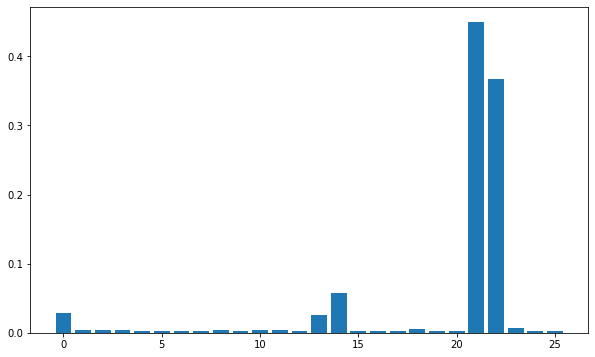

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CB3CE96FD0>]],
      dtype=object)

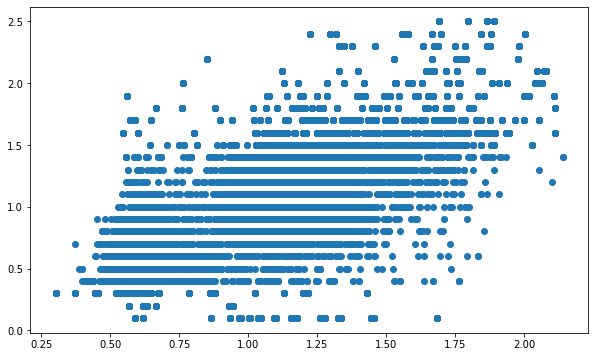

<Figure size 720x432 with 0 Axes>

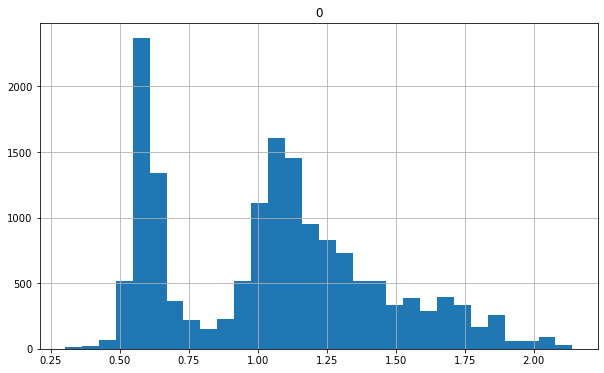

In [562]:
print("R2指数：",model.score(x_holdout_sum, y_holdout_sum))

importances = model.feature_importances_
for col,imp in zip(cols,importances):
    print("%r  with:   %r" % (col,imp))
plt.bar(range(len(cols)), importances)
plt.show()

plt.figure()
holdout_preds = model.predict(x_holdout_sum)
plt.scatter(holdout_preds,y_holdout_sum)

plt.figure()
holdout_preds = model.predict(x_holdout_sum)
temp = pandas.DataFrame(holdout_preds)
temp.hist(bins=30)

In [409]:
l = numpy.arange(0, 10, 1)
y1=[0.6125,0.2065,0.1693,0.1952,0.1336,0.2309,0.2896,0.4746,0.5332,0.8235]
y2=[0.5987,0.1993,0.1781,0.1974,0.1541,0.2404,0.2809,0.4137,0.4472,0.6967]
y3=[840,2000,3000,2000,3000,2000,1710,870,220,280]
x =["subset1","subset2","subset3","subset4","subset5","subset6","subset7","subset8","subset9","subset10"]

([<matplotlib.axis.XTick at 0x2cb5d3f9a58>,
 [Text(0, 0, 'subset1'),
  Text(0, 0, 'subset2'),
  Text(0, 0, 'subset3'),
  Text(0, 0, 'subset4'),
  Text(0, 0, 'subset5'),
  Text(0, 0, 'subset6'),
  Text(0, 0, 'subset7'),
  Text(0, 0, 'subset8'),
  Text(0, 0, 'subset9'),
  Text(0, 0, 'subset10')])

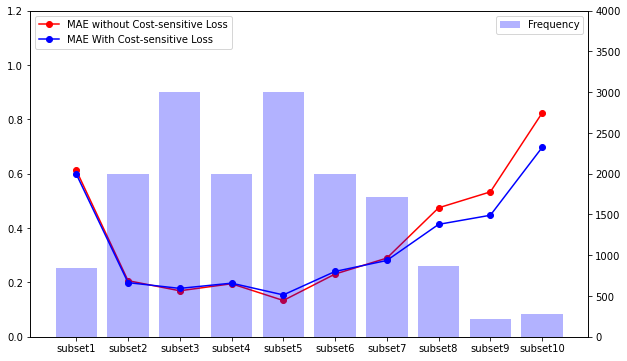

In [425]:
fig = plt.figure()  
ax1 = fig.add_subplot(111)  
ax1.plot(l, y1,'or-',label='MAE without Cost-sensitive Loss');
ax1.plot(l, y2,'ob-',label='MAE With Cost-sensitive Loss');
ax1.legend(loc=2)
ax1.set_ylim([0.0, 1.2]);

ax2 = ax1.twinx()
plt.bar(l,y3,alpha=0.3,color='blue',label='Frequency')  
ax2.legend(loc=1)
ax2.set_ylim([0, 4000])

params = {'figure.figsize': '10, 6'}
plt.rcParams.update(params)

plt.xticks(l,x)

In [15]:
model_01 = pickle.load(open("models\model_myloss_01.pickle.dat", "rb"))
model_02 = pickle.load(open("models\model_myloss_02.pickle.dat", "rb"))
model_03 = pickle.load(open("models\model_myloss_03.pickle.dat", "rb"))
model_04 = pickle.load(open("models\model_myloss_04.pickle.dat", "rb"))
model_05 = pickle.load(open("models\model_myloss_05.pickle.dat", "rb"))
model_06 = pickle.load(open("models\model_myloss_06.pickle.dat", "rb"))
model_07 = pickle.load(open("models\model_myloss_07.pickle.dat", "rb"))
model_08 = pickle.load(open("models\model_myloss_08.pickle.dat", "rb"))
model_09 = pickle.load(open("models\model_myloss_09.pickle.dat", "rb"))
model_10 = pickle.load(open("models\model_myloss_10.pickle.dat", "rb"))

In [575]:
print("R2指数：",model_01.score(x_holdout_sum, y_holdout_sum))
print("R2指数：",model_02.score(x_holdout_sum, y_holdout_sum))
print("R2指数：",model_03.score(x_holdout_sum, y_holdout_sum))
print("R2指数：",model_04.score(x_holdout_sum, y_holdout_sum))
print("R2指数：",model_05.score(x_holdout_sum, y_holdout_sum))
print("R2指数：",model_06.score(x_holdout_sum, y_holdout_sum))
print("R2指数：",model_07.score(x_holdout_sum, y_holdout_sum))
print("R2指数：",model_08.score(x_holdout_sum, y_holdout_sum))
print("R2指数：",model_09.score(x_holdout_sum, y_holdout_sum))
print("R2指数：",model_10.score(x_holdout_sum, y_holdout_sum))

R2指数： 0.5528414658752048
R2指数： 0.5521173976470352
R2指数： 0.5553457980480819
R2指数： 0.552592939814353
R2指数： 0.5477661343536393
R2指数： 0.5549745329581715
R2指数： 0.5508981865035067
R2指数： 0.5540168714841625
R2指数： 0.5585741762122977
R2指数： 0.5549075499954484


In [577]:
print("R2指数：",model_01.score(x_holdout_1, y_holdout_1))
print("R2指数：",model_01.score(x_holdout_2, y_holdout_2))
print("R2指数：",model_01.score(x_holdout_3, y_holdout_3))
print("R2指数：",model_01.score(x_holdout_4, y_holdout_4))
print("R2指数：",model_01.score(x_holdout_5, y_holdout_5))
print("R2指数：",model_01.score(x_holdout_6, y_holdout_6))
print("R2指数：",model_01.score(x_holdout_7, y_holdout_7))
print("R2指数：",model_01.score(x_holdout_8, y_holdout_8))
print("R2指数：",model_01.score(x_holdout_9, y_holdout_9))
print("R2指数：",model_01.score(x_holdout_10, y_holdout_10))
print("R2指数：",model_01.score(x_holdout_sum, y_holdout_sum))

R2指数： 0.5595120302640555
R2指数： 0.5561278966219156
R2指数： 0.5628341937454695
R2指数： 0.5350319481464074
R2指数： 0.568282852610153
R2指数： 0.549088775160645
R2指数： 0.5351115996509925
R2指数： 0.5573238509772496
R2指数： 0.5365483806466387
R2指数： 0.5685531309285199
R2指数： 0.5528414658752048


In [565]:
holdout_preds_01 = model_01.predict(x_holdout_sum)
holdout_preds_02 = model_02.predict(x_holdout_sum)
holdout_preds_03 = model_03.predict(x_holdout_sum)
holdout_preds_04 = model_04.predict(x_holdout_sum)
holdout_preds_05 = model_05.predict(x_holdout_sum)
holdout_preds_06 = model_07.predict(x_holdout_sum)
holdout_preds_07 = model_08.predict(x_holdout_sum)
holdout_preds_08 = model_09.predict(x_holdout_sum)

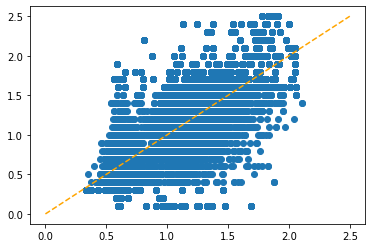

In [300]:
holdout_preds = numpy.vstack([holdout_preds_01,holdout_preds_02,holdout_preds_03,holdout_preds_04,holdout_preds_05,holdout_preds_06,holdout_preds_07,holdout_preds_08])
holdout_preds = holdout_preds.T
holdout_preds = holdout_preds.mean(axis=1)

plt.figure()
plt.scatter(holdout_preds,y_holdout_sum)
plt.plot(numpy.linspace(0,2.5,26), numpy.linspace(0,2.5,26), c = 'orange', linestyle='--')

# 模型集成

In [566]:
holdout_preds = numpy.vstack([holdout_preds_01])
holdout_preds = holdout_preds.T
holdout_preds = holdout_preds.mean(axis=1)
print(r2_score(y_holdout_sum,holdout_preds))

0.557866530087155


In [567]:
holdout_preds = numpy.vstack([holdout_preds_01,holdout_preds_02])
holdout_preds = holdout_preds.T
holdout_preds = holdout_preds.mean(axis=1)
print(r2_score(y_holdout_sum,holdout_preds))

0.5597774682377348


In [568]:
holdout_preds = numpy.vstack([holdout_preds_01,holdout_preds_02,holdout_preds_03])
holdout_preds = holdout_preds.T
holdout_preds = holdout_preds.mean(axis=1)
print(r2_score(y_holdout_sum,holdout_preds))

0.5607083902164718


In [569]:
holdout_preds = numpy.vstack([holdout_preds_01,holdout_preds_02,holdout_preds_03,holdout_preds_04])
holdout_preds = holdout_preds.T
holdout_preds = holdout_preds.mean(axis=1)
print(r2_score(y_holdout_sum,holdout_preds))

0.5607363747578362


In [570]:
holdout_preds = numpy.vstack([holdout_preds_01,holdout_preds_02,holdout_preds_03,holdout_preds_04,holdout_preds_05])
holdout_preds = holdout_preds.T
holdout_preds = holdout_preds.mean(axis=1)
print(r2_score(y_holdout_sum,holdout_preds))

0.5610779928933923


In [571]:
holdout_preds = numpy.vstack([holdout_preds_01,holdout_preds_02,holdout_preds_03,holdout_preds_04,holdout_preds_05,holdout_preds_06])
holdout_preds = holdout_preds.T
holdout_preds = holdout_preds.mean(axis=1)
print(r2_score(y_holdout_sum,holdout_preds))

0.5606472815029204


In [572]:
holdout_preds = numpy.vstack([holdout_preds_01,holdout_preds_02,holdout_preds_03,holdout_preds_04,holdout_preds_05,holdout_preds_06,holdout_preds_07])
holdout_preds = holdout_preds.T
holdout_preds = holdout_preds.mean(axis=1)
print(r2_score(y_holdout_sum,holdout_preds))

0.5606486667051243


In [573]:
holdout_preds = numpy.vstack([holdout_preds_01,holdout_preds_02,holdout_preds_03,holdout_preds_04,holdout_preds_05,holdout_preds_06,holdout_preds_07,holdout_preds_08])
holdout_preds = holdout_preds.T
holdout_preds = holdout_preds.mean(axis=1)
print(r2_score(y_holdout_sum,holdout_preds))

0.5605032713157398


# 为训练集和测试集获取预测的creatinine

In [40]:
y_train.shape

(34220, 1)

In [157]:
train_preds_01 = model_01.predict(x_train)
train_preds_02 = model_02.predict(x_train)
train_preds_03 = model_03.predict(x_train)
train_preds_04 = model_04.predict(x_train)
train_preds_05 = model_06.predict(x_train)
train_preds_06 = model_08.predict(x_train)
train_preds_07 = model_09.predict(x_train)
train_preds_08 = model_10.predict(x_train)

In [158]:
train_preds = numpy.vstack([train_preds_01,train_preds_02,train_preds_03,train_preds_04,train_preds_05,train_preds_06,train_preds_07,train_preds_08])
train_preds = train_preds.T
train_preds = train_preds.mean(axis=1)

In [159]:
train_preds.shape

(34220,)

In [179]:
holdout_preds_01 = model_01.predict(x_holdout_1)
holdout_preds_02 = model_02.predict(x_holdout_1)
holdout_preds_03 = model_03.predict(x_holdout_1)
holdout_preds_04 = model_04.predict(x_holdout_1)
holdout_preds_05 = model_06.predict(x_holdout_1)
holdout_preds_06 = model_08.predict(x_holdout_1)
holdout_preds_07 = model_09.predict(x_holdout_1)
holdout_preds_08 = model_10.predict(x_holdout_1)

In [180]:
holdout_preds = numpy.vstack([holdout_preds_01,holdout_preds_02,holdout_preds_03,holdout_preds_04,holdout_preds_05,holdout_preds_06,holdout_preds_07,holdout_preds_08])
holdout_preds = holdout_preds.T
holdout_preds = holdout_preds.mean(axis=1)

In [181]:
holdout_preds.shape

(1592,)

In [173]:
holdout_preds_01 = model_01.predict(x_holdout)
holdout_preds_02 = model_02.predict(x_holdout)
holdout_preds_03 = model_03.predict(x_holdout)
holdout_preds_04 = model_04.predict(x_holdout)
holdout_preds_05 = model_06.predict(x_holdout)
holdout_preds_06 = model_08.predict(x_holdout)
holdout_preds_07 = model_09.predict(x_holdout)
holdout_preds_08 = model_10.predict(x_holdout)

In [174]:
holdout_preds = numpy.vstack([holdout_preds_01,holdout_preds_02,holdout_preds_03,holdout_preds_04,holdout_preds_05,holdout_preds_06,holdout_preds_07,holdout_preds_08])
holdout_preds = holdout_preds.T
holdout_preds = holdout_preds.mean(axis=1)

In [62]:
holdout_preds.shape

(90112,)

#  将stage转化为CKD 将creatinine与原23feature合并 

#  针对1592 samples

In [163]:
#设置新的y
y_train_stage = y_train_stage.values
for i in range(len(y_train_stage)):
    if y_train_stage[i]<=2:
        y_train_stage[i]=0
    else:
        y_train_stage[i]=1
y_train_stage=y_train_stage.reshape(34220,1)

#设置新的x
pre_cre = numpy.array(train_preds).reshape(34220,1)
x_train = numpy.hstack((x_train, pre_cre))

print(y_train.shape)
print(x_train.shape)

#设置新的y
y_holdout_stage = y_holdout_stage_1.values
for i in range(len(y_holdout_stage)):
    if y_holdout_stage[i]<=2:
        y_holdout_stage[i]=0
    else:
        y_holdout_stage[i]=1
y_holdout_stage=y_holdout_stage.reshape(1592,1)

#设置新的x
pre_cre = numpy.array(holdout_preds).reshape(1592,1)
x_holdout = numpy.hstack((x_holdout_1, pre_cre))

print(y_holdout.shape)
print(x_holdout.shape)

(34220, 1)
(34220, 27)
(90112, 1)
(1592, 27)


#  将stage转化为CKD 将creatinine与原23feature合并 

#  针对90112 samples

In [441]:
#设置新的y
y_train_stage = y_train_stage.values
for i in range(len(y_train_stage)):
    if y_train_stage[i]<=2:
        y_train_stage[i]=0
    else:
        y_train_stage[i]=1
y_train_stage=y_train_stage.reshape(34220,1)

#设置新的x
pre_cre = numpy.array(train_preds).reshape(34220,1)
x_train = numpy.hstack((x_train, pre_cre))

print(y_train.shape)
print(x_train.shape)

#设置新的y
y_holdout_stage = y_holdout_stage.values
for i in range(len(y_holdout_stage)):
    if y_holdout_stage[i]<=2:
        y_holdout_stage[i]=0
    else:
        y_holdout_stage[i]=1
y_holdout_stage=y_holdout_stage.reshape(90112,1)

#设置新的x
pre_cre = numpy.array(holdout_preds).reshape(90112,1)
x_holdout = numpy.hstack((x_holdout, pre_cre))

print(y_holdout.shape)
print(x_holdout.shape)

(34220, 1)
(34220, 27)
(90112, 1)
(90112, 27)


# 分类模型训练

In [203]:
model_c = xgboost.XGBClassifier(max_depth=8,
                           n_estimators=100, #55
                           learning_rate=0.05,
                           min_child_weight=100,
                           nthread=8,
                           subsample=0.8, #95
                           colsample_bytree=0.8, # 95
                           objective='binary:logistic',
                           reg_alpha=0,
                           reg_lambda=0,
                           gamma=0,
                           seed=10)
#开始训练
model_c.fit(x_train, y_train_stage, verbose=1, eval_set=[(x_train, y_train_stage), (x_holdout, y_holdout_stage)], eval_metric="logloss", early_stopping_rounds=10, )

[0]	validation_0-logloss:0.66668	validation_1-logloss:0.66704
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.64295	validation_1-logloss:0.64393
[2]	validation_0-logloss:0.62136	validation_1-logloss:0.62267
[3]	validation_0-logloss:0.60158	validation_1-logloss:0.60337
[4]	validation_0-logloss:0.58351	validation_1-logloss:0.58565
[5]	validation_0-logloss:0.56908	validation_1-logloss:0.57205
[6]	validation_0-logloss:0.55374	validation_1-logloss:0.55714
[7]	validation_0-logloss:0.53954	validation_1-logloss:0.54327
[8]	validation_0-logloss:0.52657	validation_1-logloss:0.53059
[9]	validation_0-logloss:0.51621	validation_1-logloss:0.52065
[10]	validation_0-logloss:0.50505	validation_1-logloss:0.50984
[11]	validation_0-logloss:0.49469	validation_1-logloss:0.49973
[12]	validation_0-logloss:0.48515	validation_1-logloss:0.49067
[13]	validation_0-logloss:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=100, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, nthread=8, num_parallel_tree=1,
              random_state=10, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
              seed=10, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

R2指数： 0.8448492462311558
0.9004282971496087


<Figure size 432x288 with 0 Axes>

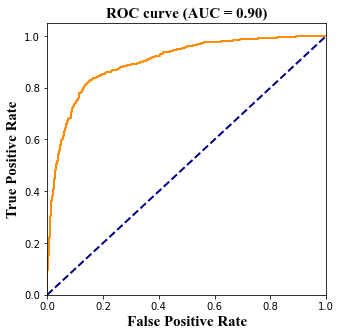

totally cost 0.6563150882720947
Test Accuracy: 83.23%
aa: 464
ab: 91
ba: 176
bb: 861


In [214]:
print("R2指数：",model_c.score(x_holdout,y_holdout_stage))

time_start=time.time()

# Actual class predictions 
holdout_preds = model_c.predict_proba(x_holdout)[:, 1]

fpr, tpr, thresholds  =  roc_curve(y_holdout_stage, holdout_preds) 

roc_auc =auc(fpr, tpr) 
print(roc_auc)

plt.figure()
plt.figure(figsize=(5,5))
font = {'family': 'Times New Roman','weight': 'normal','size': 15}
plt.plot(fpr, tpr, color='darkorange',lw=2) #假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', font)
plt.ylabel('True Positive Rate', font)
plt.title('ROC curve (AUC = %0.2f)' % roc_auc, font)
plt.show()

time_end=time.time()
print('totally cost',time_end-time_start)


for i in range(len(holdout_preds)):
    if holdout_preds[i]>=0.3:
        holdout_preds[i]=1
    else:
        holdout_preds[i]=0

#holdout_preds = [round(value) for value in holdout_preds]
accuracy_hold = accuracy_score(y_holdout_stage, holdout_preds)
print("Test Accuracy: %.2f%%" % (accuracy_hold * 100.0))

aa_temp=0
ab_temp=0
ba_temp=0
bb_temp=0
for s in range(len(holdout_preds)):
    if y_holdout_stage[s]==1 and holdout_preds[s]==1:
        aa_temp+=1
    if y_holdout_stage[s]==1 and holdout_preds[s]==0:
        ab_temp+=1
    if y_holdout_stage[s]==0 and holdout_preds[s]==1:
        ba_temp+=1
    if y_holdout_stage[s]==0 and holdout_preds[s]==0:
        bb_temp+=1
        
print("aa:",aa_temp)
print("ab:",ab_temp)
print("ba:",ba_temp)
print("bb:",bb_temp)

R2指数： 0.8967618075284091
0.7556613593544566


<Figure size 432x288 with 0 Axes>

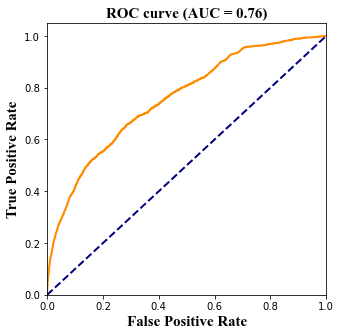

totally cost 0.8638045787811279


In [485]:
print("R2指数：",model_c.score(x_holdout,y_holdout_stage))

time_start=time.time()

# Actual class predictions 
holdout_preds = model_c.predict_proba(x_holdout)[:, 1]

fpr, tpr, thresholds  =  roc_curve(y_holdout_stage, holdout_preds) 

roc_auc =auc(fpr, tpr) 
print(roc_auc)

plt.figure()
plt.figure(figsize=(5,5))
font = {'family': 'Times New Roman','weight': 'normal','size': 15}
plt.plot(fpr, tpr, color='darkorange',lw=2) #假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', font)
plt.ylabel('True Positive Rate', font)
plt.title('ROC curve (AUC = %0.2f)' % roc_auc, font)
plt.show()

time_end=time.time()
print('totally cost',time_end-time_start)

In [486]:
cols.remove("creatinine")

'age'  with:   0.06866357
'waist'  with:   0.013659204
'vision_left'  with:   0.012246668
'vision_right'  with:   0.010782528
'listen_left'  with:   0.0
'listen_right'  with:   0.0
'BP_HIGH '  with:   0.012776063
'BP_LWST '  with:   0.014804968
'BLDS'  with:   0.014759908
'TOT_CHOLE '  with:   0.010603132
'TRIGLYCERIDE'  with:   0.015336339
'HDL_CHOLE '  with:   0.012963451
'LDL_CHOLE '  with:   0.01324946
'HMG '  with:   0.01930976
'OLIG_PROTE_CD'  with:   0.01701572
'SGOT_AST '  with:   0.011015808
'SGPT_ALT '  with:   0.013053809
'GAMMA_GTP '  with:   0.015038283
'DRINK_OR_NOT'  with:   0.024905916
'MOUTH_CHECK'  with:   0.013517439
'BMI'  with:   0.012065278
'sex_1'  with:   0.046915237
'sex_2'  with:   0.0
'SMK_STAT_TYPE_RSPS_CD_1.0'  with:   0.016210848
'SMK_STAT_TYPE_RSPS_CD_2.0'  with:   0.01211226
'SMK_STAT_TYPE_RSPS_CD_3.0'  with:   0.0069547174
'creatinine'  with:   0.5920396


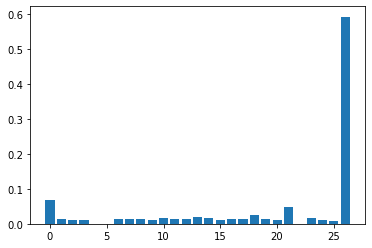

In [487]:
cols.append("creatinine")
importances = model_c.feature_importances_
for col,imp in zip(cols,importances):
    print("%r  with:   %r" % (col,imp))
plt.bar(range(len(cols)), importances)
plt.show()

In [488]:
for i in range(len(holdout_preds)):
    if holdout_preds[i]>=1.0:
        holdout_preds[i]=1
    else:
        holdout_preds[i]=0

#holdout_preds = [round(value) for value in holdout_preds]
accuracy_hold = accuracy_score(y_holdout_stage, holdout_preds)
print("Test Accuracy: %.2f%%" % (accuracy_hold * 100.0))

aa_temp=0
ab_temp=0
ba_temp=0
bb_temp=0
for s in range(len(holdout_preds)):
    if y_holdout_stage[s]==1 and holdout_preds[s]==1:
        aa_temp+=1
    if y_holdout_stage[s]==1 and holdout_preds[s]==0:
        ab_temp+=1
    if y_holdout_stage[s]==0 and holdout_preds[s]==1:
        ba_temp+=1
    if y_holdout_stage[s]==0 and holdout_preds[s]==0:
        bb_temp+=1
        
print("aa:",aa_temp)
print("ab:",ab_temp)
print("ba:",ba_temp)
print("bb:",bb_temp)

Test Accuracy: 96.40%
aa: 0
ab: 3248
ba: 0
bb: 86864


# 直接分类

In [34]:
df_1 = df_train.loc[(df["CREATININE "]<0.15)&(df["CREATININE "]>0.05)]
print(df_1.shape)
df_2 = df_train.loc[(df["CREATININE "]<0.25)&(df["CREATININE "]>0.15)]
print(df_2.shape)
df_3 = df_train.loc[(df["CREATININE "]<0.35)&(df["CREATININE "]>0.25)]
print(df_3.shape)
df_4 = df_train.loc[(df["CREATININE "]<0.45)&(df["CREATININE "]>0.35)]
df_4 = df_4.sample(2500)
print(df_4.shape)
df_5 = df_train.loc[(df["CREATININE "]<0.55)&(df["CREATININE "]>0.45)]
df_5 = df_5.sample(2500)
print(df_5.shape)
df_6 = df_train.loc[(df["CREATININE "]<0.65)&(df["CREATININE "]>0.55)]
df_6 = df_6.sample(2500)
print(df_6.shape)
df_7 = df_train.loc[(df["CREATININE "]<0.75)&(df["CREATININE "]>0.65)]
df_7 = df_7.sample(2500)
print(df_7.shape)
df_8 = df_train.loc[(df["CREATININE "]<0.85)&(df["CREATININE "]>0.75)]
df_8 = df_8.sample(2500)
print(df_8.shape)
df_9 = df_train.loc[(df["CREATININE "]<0.95)&(df["CREATININE "]>0.85)]
df_9 = df_9.sample(2500)
print(df_9.shape)
df_10 = df_train.loc[(df["CREATININE "]<1.05)&(df["CREATININE "]>0.95)]
df_10 = df_10.sample(2500)
print(df_10.shape)
df_11 = df_train.loc[(df["CREATININE "]<1.15)&(df["CREATININE "]>1.05)]
df_11 = df_11.sample(2500)
print(df_11.shape)
df_12 = df_train.loc[(df["CREATININE "]<1.25)&(df["CREATININE "]>1.15)]
df_12 = df_12.sample(2500)
print(df_12.shape)
df_13 = df_train.loc[(df["CREATININE "]<1.35)&(df["CREATININE "]>1.25)]
df_13 = df_13.sample(2500)
print(df_13.shape)
df_14 = df_train.loc[(df["CREATININE "]<1.45)&(df["CREATININE "]>1.35)]
df_14 = df_14.sample(2500)
print(df_14.shape)
df_15 = df_train.loc[(df["CREATININE "]<1.55)&(df["CREATININE "]>1.45)]
print(df_15.shape)
df_16 = df_train.loc[(df["CREATININE "]<1.65)&(df["CREATININE "]>1.55)]
print(df_16.shape)
df_17 = df_train.loc[(df["CREATININE "]<1.75)&(df["CREATININE "]>1.65)]
print(df_17.shape)
df_18 = df_train.loc[(df["CREATININE "]<1.85)&(df["CREATININE "]>1.75)]
print(df_18.shape)
df_19 = df_train.loc[(df["CREATININE "]<1.95)&(df["CREATININE "]>1.85)]
print(df_19.shape)
df_20 = df_train.loc[(df["CREATININE "]<2.05)&(df["CREATININE "]>1.95)]
print(df_20.shape)
df_21 = df_train.loc[(df["CREATININE "]<2.15)&(df["CREATININE "]>2.05)]
print(df_21.shape)
df_22 = df_train.loc[(df["CREATININE "]<2.25)&(df["CREATININE "]>2.15)]
print(df_22.shape)
df_23 = df_train.loc[(df["CREATININE "]<2.35)&(df["CREATININE "]>2.25)]
print(df_23.shape)
df_24 = df_train.loc[(df["CREATININE "]<2.45)&(df["CREATININE "]>2.35)]
print(df_24.shape)
df_25 = df_train.loc[(df["CREATININE "]<2.55)&(df["CREATININE "]>2.45)]
print(df_25.shape)

print("#####################################")

temp = pandas.concat([df_25,df_24,df_23,df_22,df_21,df_20,df_19,df_18,df_17,df_16,df_15,df_14,df_13,df_12,df_11,df_10,df_9,df_8,df_7,df_6,df_5,df_4,df_3,df_2,df_1])
temp = shuffle(temp)
print(temp.shape)

df_train = temp
print(df_train.shape)

print("#####################################")

cols = df_train.columns.values.tolist()
cols.remove("id")
cols.remove("sido")
cols.remove("CREATININE ")
cols.remove("GFR")
cols.remove("stage")
cols.remove("height")
cols.remove("weight")

x_train = df_train[cols].values

print(x_train.shape)

print("#####################################")

y_train = df_train["stage"].values
for i in range(len(y_train)):
    if y_train[i]<=2:
        y_train[i]=0
    else:
        y_train[i]=1
y_train=y_train.reshape(34220,1)
print(y_train.shape)

print("#####################################")

(395, 33)
(93, 33)
(549, 33)
(2500, 33)
(2500, 33)
(2500, 33)
(2500, 33)
(2500, 33)
(2500, 33)
(2500, 33)
(2500, 33)
(2500, 33)
(2500, 33)
(2500, 33)
(2224, 33)
(1160, 33)
(687, 33)
(523, 33)
(309, 33)
(235, 33)
(144, 33)
(137, 33)
(92, 33)
(96, 33)
(76, 33)
#####################################
(34220, 33)
(34220, 33)
#####################################
(34220, 26)
#####################################
(34220, 1)
#####################################


In [35]:
df_1 = df_holdout.loc[(df_holdout["CREATININE "]<0.15)&(df_holdout["CREATININE "]>0.05)]
print(df_1.shape)
df_2 = df_holdout.loc[(df_holdout["CREATININE "]<0.25)&(df_holdout["CREATININE "]>0.15)]
print(df_2.shape)
df_3 = df_holdout.loc[(df_holdout["CREATININE "]<0.35)&(df_holdout["CREATININE "]>0.25)]
print(df_3.shape)
df_4 = df_holdout.loc[(df_holdout["CREATININE "]<0.45)&(df_holdout["CREATININE "]>0.35)]
df_4 = df_4.sample(100)
print(df_4.shape)
df_5 = df_holdout.loc[(df_holdout["CREATININE "]<0.55)&(df_holdout["CREATININE "]>0.45)]
df_5 = df_5.sample(100)
print(df_5.shape)
df_6 = df_holdout.loc[(df_holdout["CREATININE "]<0.65)&(df_holdout["CREATININE "]>0.55)]
df_6 = df_6.sample(100)
print(df_6.shape)
df_7 = df_holdout.loc[(df_holdout["CREATININE "]<0.75)&(df_holdout["CREATININE "]>0.65)]
df_7 = df_7.sample(100)
print(df_7.shape)
df_8 = df_holdout.loc[(df_holdout["CREATININE "]<0.85)&(df_holdout["CREATININE "]>0.75)]
df_8 = df_8.sample(100)
print(df_8.shape)
df_9 = df_holdout.loc[(df_holdout["CREATININE "]<0.95)&(df_holdout["CREATININE "]>0.85)]
df_9 = df_9.sample(100)
print(df_9.shape)
df_10 = df_holdout.loc[(df_holdout["CREATININE "]<1.05)&(df_holdout["CREATININE "]>0.95)]
df_10 = df_10.sample(100)
print(df_10.shape)
df_11 = df_holdout.loc[(df_holdout["CREATININE "]<1.15)&(df_holdout["CREATININE "]>1.05)]
df_11 = df_11.sample(100)
print(df_11.shape)
df_12 = df_holdout.loc[(df_holdout["CREATININE "]<1.25)&(df_holdout["CREATININE "]>1.15)]
df_12 = df_12.sample(100)
print(df_12.shape)
df_13 = df_holdout.loc[(df_holdout["CREATININE "]<1.35)&(df_holdout["CREATININE "]>1.25)]
df_13 = df_13.sample(100)
print(df_13.shape)
df_14 = df_holdout.loc[(df_holdout["CREATININE "]<1.45)&(df_holdout["CREATININE "]>1.35)]
df_14 = df_14.sample(100)
print(df_14.shape)
df_15 = df_holdout.loc[(df_holdout["CREATININE "]<1.55)&(df_holdout["CREATININE "]>1.45)]
df_15 = df_15.sample(100)
print(df_15.shape)
df_16 = df_holdout.loc[(df_holdout["CREATININE "]<1.65)&(df_holdout["CREATININE "]>1.55)]
df_16 = df_16.sample(100)
print(df_16.shape)
df_17 = df_holdout.loc[(df_holdout["CREATININE "]<1.75)&(df_holdout["CREATININE "]>1.65)]
print(df_17.shape)
df_18 = df_holdout.loc[(df_holdout["CREATININE "]<1.85)&(df_holdout["CREATININE "]>1.75)]
print(df_18.shape)
df_19 = df_holdout.loc[(df_holdout["CREATININE "]<1.95)&(df_holdout["CREATININE "]>1.85)]
print(df_19.shape)
df_20 = df_holdout.loc[(df_holdout["CREATININE "]<2.05)&(df_holdout["CREATININE "]>1.95)]
print(df_20.shape)
df_21 = df_holdout.loc[(df_holdout["CREATININE "]<2.15)&(df_holdout["CREATININE "]>2.05)]
print(df_21.shape)
df_22 = df_holdout.loc[(df_holdout["CREATININE "]<2.25)&(df_holdout["CREATININE "]>2.15)]
print(df_22.shape)
df_23 = df_holdout.loc[(df_holdout["CREATININE "]<2.35)&(df_holdout["CREATININE "]>2.25)]
print(df_23.shape)
df_24 = df_holdout.loc[(df_holdout["CREATININE "]<2.45)&(df_holdout["CREATININE "]>2.35)]
print(df_24.shape)
df_25 = df_holdout.loc[(df_holdout["CREATININE "]<2.55)&(df_holdout["CREATININE "]>2.45)]
print(df_25.shape)

print("#####################################")

temp = pandas.concat([df_25,df_24,df_23,df_22,df_21,df_20,df_19,df_18,df_17,df_16,df_15,df_14,df_13,df_12,df_11,df_10,df_9,df_8,df_7,df_6,df_5,df_4,df_3,df_2,df_1])
temp = shuffle(temp)
print(temp.shape)

df_holdout = temp
print(df_holdout.shape)

print("#####################################")

cols = df_holdout.columns.values.tolist()
cols.remove("id")
cols.remove("sido")
cols.remove("CREATININE ")
cols.remove("GFR")
cols.remove("stage")
cols.remove("height")
cols.remove("weight")

x_holdout = df_holdout[cols].values

print(x_holdout.shape)

print("#####################################")

y_holdout = df_holdout["stage"].values
for i in range(len(y_holdout)):
    if y_holdout[i]<=2:
        y_holdout[i]=0
    else:
        y_holdout[i]=1
y_holdout=y_holdout.reshape(1592,1)
print(y_holdout.shape)

print("#####################################")

(30, 33)
(6, 33)
(48, 33)
(100, 33)
(100, 33)
(100, 33)
(100, 33)
(100, 33)
(100, 33)
(100, 33)
(100, 33)
(100, 33)
(100, 33)
(100, 33)
(100, 33)
(100, 33)
(71, 33)
(38, 33)
(28, 33)
(21, 33)
(13, 33)
(9, 33)
(13, 33)
(11, 33)
(4, 33)
#####################################
(1592, 33)
(1592, 33)
#####################################
(1592, 26)
#####################################
(1592, 1)
#####################################


In [590]:
cols = df_holdout.columns.values.tolist()
cols.remove("id")
cols.remove("sido")
cols.remove("CREATININE ")
cols.remove("GFR")
cols.remove("stage")
cols.remove("height")
cols.remove("weight")
x_holdout = df_holdout[cols].values
print(x_holdout.shape)

print("#####################################")

y_holdout = df_holdout["stage"].values
for i in range(len(y_holdout)):
    if y_holdout[i]<=2:
        y_holdout[i]=0
    else:
        y_holdout[i]=1
y_holdout=y_holdout.reshape(90112,1)

print("y_holdout: ", y_holdout.shape)
y_holdout = y_holdout.reshape(y_holdout.shape[0], 1)
print(y_holdout.shape)
print("#####################################")

(90112, 26)
#####################################
y_holdout:  (90112, 1)
(90112, 1)


In [ ]:
model_c = xgboost.XGBClassifier(max_depth=8,
                           n_estimators=100, #55
                           learning_rate=0.05,
                           min_child_weight=100,
                           nthread=8,
                           subsample=0.8, #95
                           colsample_bytree=0.8, # 95
                           objective='binary:logistic',
                           reg_alpha=0,
                           reg_lambda=0,
                           gamma=0,
                           seed=10)
#开始训练
model_c.fit(x_train, y_train_stage, verbose=1, eval_set=[(x_train, y_train_stage), (x_holdout, y_holdout_stage)], eval_metric="logloss", early_stopping_rounds=10, )

In [38]:
model_c = xgboost.XGBClassifier(max_depth=8,
                           n_estimators=100, #55
                           learning_rate=0.05,
                           min_child_weight=100,
                           nthread=8,
                           subsample=0.8, #95
                           colsample_bytree=0.8, # 95
                           objective='binary:logistic',
                           reg_alpha=0,
                           reg_lambda=0,
                           gamma=0,
                           seed=10)
#开始训练
model_c.fit(x_train, y_train, verbose=1, eval_set=[(x_train, y_train), (x_holdout, y_holdout)], eval_metric="auc", early_stopping_rounds=10, )

[0]	validation_0-auc:0.85803	validation_1-auc:0.86481
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.86478	validation_1-auc:0.87298
[2]	validation_0-auc:0.86251	validation_1-auc:0.87123
[3]	validation_0-auc:0.87116	validation_1-auc:0.87964
[4]	validation_0-auc:0.87355	validation_1-auc:0.88146
[5]	validation_0-auc:0.87457	validation_1-auc:0.88154
[6]	validation_0-auc:0.87523	validation_1-auc:0.88110
[7]	validation_0-auc:0.87629	validation_1-auc:0.88311
[8]	validation_0-auc:0.87672	validation_1-auc:0.88483
[9]	validation_0-auc:0.87707	validation_1-auc:0.88544
[10]	validation_0-auc:0.87755	validation_1-auc:0.88631
[11]	validation_0-auc:0.87772	validation_1-auc:0.88717
[12]	validation_0-auc:0.87813	validation_1-auc:0.88799
[13]	validation_0-auc:0.87816	validation_1-auc:0.88836
[14]	validation_0-auc:0.87820	validation_1-auc:0.88848
[15]	validation_0-auc:0.8788

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=100, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, nthread=8, num_parallel_tree=1,
              random_state=10, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
              seed=10, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

R2指数： 0.8385678391959799
0.8998147366244152


<Figure size 432x288 with 0 Axes>

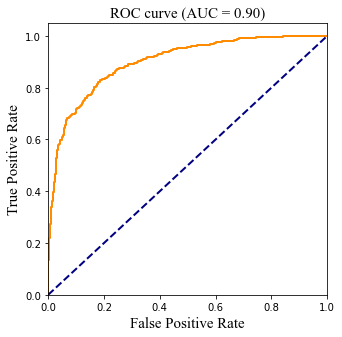

totally cost 0.46883344650268555


In [39]:
print("R2指数：",model_c.score(x_holdout,y_holdout))

time_start=time.time()

# Actual class predictions 
holdout_preds = model_c.predict_proba(x_holdout)[:, 1]

fpr, tpr, thresholds  =  roc_curve(y_holdout, holdout_preds) 

roc_auc =auc(fpr, tpr) 
print(roc_auc)

plt.figure()
plt.figure(figsize=(5,5))
font = {'family': 'Times New Roman','weight': 'normal','size': 15}
plt.plot(fpr, tpr, color='darkorange',lw=2) #假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', font)
plt.ylabel('True Positive Rate', font)
plt.title('ROC curve (AUC = %0.2f)' % roc_auc, font)
plt.show()

time_end=time.time()
print('totally cost',time_end-time_start)

In [40]:
for i in range(len(holdout_preds)):
    if holdout_preds[i]>=0.1:
        holdout_preds[i]=1
    else:
        holdout_preds[i]=0

#holdout_preds = [round(value) for value in holdout_preds]
accuracy_hold = accuracy_score(y_holdout, holdout_preds)
print("Test Accuracy: %.2f%%" % (accuracy_hold * 100.0))

aa_temp=0
ab_temp=0
ba_temp=0
bb_temp=0
for s in range(len(holdout_preds)):
    if y_holdout[s]==1 and holdout_preds[s]==1:
        aa_temp+=1
    if y_holdout[s]==1 and holdout_preds[s]==0:
        ab_temp+=1
    if y_holdout[s]==0 and holdout_preds[s]==1:
        ba_temp+=1
    if y_holdout[s]==0 and holdout_preds[s]==0:
        bb_temp+=1
        
print("aa:",aa_temp)
print("ab:",ab_temp)
print("ba:",ba_temp)
print("bb:",bb_temp)

Test Accuracy: 67.34%
aa: 538
ab: 27
ba: 493
bb: 534


'age'  with:   0.19216584
'waist'  with:   0.022922566
'vision_left'  with:   0.01798538
'vision_right'  with:   0.024015842
'listen_left'  with:   0.0
'listen_right'  with:   0.0
'BP_HIGH '  with:   0.008769219
'BP_LWST '  with:   0.007862931
'BLDS'  with:   0.016309513
'TOT_CHOLE '  with:   0.009548175
'TRIGLYCERIDE'  with:   0.011896112
'HDL_CHOLE '  with:   0.016546708
'LDL_CHOLE '  with:   0.008730966
'HMG '  with:   0.061919052
'OLIG_PROTE_CD'  with:   0.11945858
'SGOT_AST '  with:   0.00649349
'SGPT_ALT '  with:   0.010220347
'GAMMA_GTP '  with:   0.010296488
'DRINK_OR_NOT'  with:   0.0248008
'MOUTH_CHECK'  with:   0.0068932814
'BMI'  with:   0.0127088735
'sex_1'  with:   0.20912889
'sex_2'  with:   0.16801754
'SMK_STAT_TYPE_RSPS_CD_1.0'  with:   0.009042408
'SMK_STAT_TYPE_RSPS_CD_2.0'  with:   0.014455872
'SMK_STAT_TYPE_RSPS_CD_3.0'  with:   0.009811112


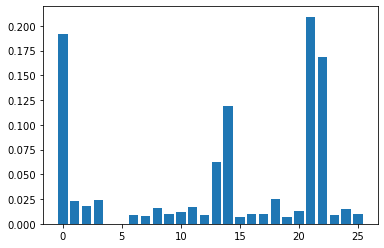

In [42]:
importances = model_c.feature_importances_
for col,imp in zip(cols,importances):
    print("%r  with:   %r" % (col,imp))
plt.bar(range(len(cols)), importances)
plt.show()